# Table of Contents
 <p><div class="lev1"><a href="#Modules,-functions,-results,-variables"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modules, functions, results, variables</a></div><div class="lev1"><a href="#Plots"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></div><div class="lev2"><a href="#Global-mean-rainfall"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Global mean rainfall</a></div><div class="lev2"><a href="#Definition-of-convective-scale-rainfall-rates-P(CRM)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Definition of convective scale rainfall rates P(CRM)</a></div><div class="lev2"><a href="#Percentiles-vs.-ranks"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Percentiles vs. ranks</a></div><div class="lev3"><a href="#Compare-SPCAM-and-CAM5"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Compare SPCAM and CAM5</a></div><div class="lev4"><a href="#Figures-for-talk"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Figures for talk</a></div><div class="lev4"><a href="#Figures-for-paper"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Figures for paper</a></div><div class="lev3"><a href="#Compare-precipitation-variables-for-SPCAM"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Compare precipitation variables for SPCAM</a></div><div class="lev3"><a href="#Precipitation-scaling-and-contributions-to-fractional-changes"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Precipitation scaling and contributions to fractional changes</a></div><div class="lev3"><a href="#Precipitation-scaling-and-contributions-for-the-average-of-CRM_PREC_I90,-I75-and-I50"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Precipitation scaling and contributions for the average of CRM_PREC_I90, I75 and I50</a></div><div class="lev3"><a href="#Relationship-P(GCM),-P(CRM)-and-convective-area?"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Relationship P(GCM), P(CRM) and convective area?</a></div><div class="lev2"><a href="#Joint-statistics-between-two-precipitation-variables"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Joint statistics between two precipitation variables</a></div><div class="lev2"><a href="#Vertical-profiles"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Vertical profiles</a></div><div class="lev3"><a href="#Compare-SPCAM-and-CAM5-for-extreme-PRECT"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Compare SPCAM and CAM5 for extreme PRECT</a></div><div class="lev3"><a href="#Compare-reference-precipitation-variables-for-SPCAM"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Compare reference precipitation variables for SPCAM</a></div><div class="lev3"><a href="#Compare-percentiles-for-SPCAM"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Compare percentiles for SPCAM</a></div><div class="lev4"><a href="#All-profiles"><span class="toc-item-num">2.5.3.1&nbsp;&nbsp;</span>All profiles</a></div><div class="lev4"><a href="#Thermodynamic-and-dynamic-contributions"><span class="toc-item-num">2.5.3.2&nbsp;&nbsp;</span>Thermodynamic and dynamic contributions</a></div><div class="lev4"><a href="#All-profiles-with-large-scale-omega-at-locations-of-convective-scale-extremes"><span class="toc-item-num">2.5.3.3&nbsp;&nbsp;</span>All profiles with large-scale omega at locations of convective-scale extremes</a></div><div class="lev4"><a href="#All-profiles-in-temperature-coordinate"><span class="toc-item-num">2.5.3.4&nbsp;&nbsp;</span>All profiles in temperature coordinate</a></div><div class="lev1"><a href="#Maps"><span class="toc-item-num">3&nbsp;&nbsp;</span>Maps</a></div><div class="lev2"><a href="#Annual-mean-precipitation"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Annual mean precipitation</a></div><div class="lev2"><a href="#Precipitation-frequency-above-quantiles-for-various-precipitation-IDs"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Precipitation frequency above quantiles for various precipitation IDs</a></div>

# Modules, functions, results, variables

Modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from netCDF4 import Dataset
from math import *
import glob
import string
import re
from datetime import date, time, datetime
from pprint import pprint
import sys,os
import csv
import pandas as pd
import pickle
import matplotlib.transforms as mtransforms


Paths

In [2]:
# Add ../functions to system path
currentpath = %pwd
currentpath = str(currentpath)
##-- In a python script do the following instead:
##-- currentpath = os.path.dirname(os.path.realpath(__file__))
sys.path.insert(0,currentpath[:currentpath.rfind('/')+1]+'functions')

## Fixed data files input directory
inputdir_fx = '/Users/bfildier/Data/preprocessed/allExperiments/fx'
## Dataframe input directory
# resultdir = os.path.join(os.path.dirname(currentpath),'results')
resultdir = os.path.join(os.path.dirname(currentpath),'results/fullResults')
## Maps (2D tropical data files) input directory
inputdir_maps = os.path.join(os.path.dirname(currentpath),'inputs/forMaps')

##-- Output directories --##
## Figures
figdir = os.path.join(os.path.dirname(currentpath),'figures/fullResults')


Graphical parameters

In [3]:
###--- Set up graphical parameters ---###

##-- Figure setup --##
plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'figure.titlesize': 'xx-large',
                     'figure.subplot.top': '0.87',
                     'figure.subplot.wspace': '0.3',
                     'figure.subplot.hspace': '0.3',
                     'legend.fontsize':'medium'})

##-- Load colors for plots --##
colorfile = os.path.join(currentpath,'colorsAndTypes.pickle')
with open(colorfile,'rb') as handle:
    col = pickle.load(handle)
    lt = pickle.load(handle)
    pal = pickle.load(handle)
    lw = pickle.load(handle)
    dashes = pickle.load(handle)
    mark = pickle.load(handle)
    cmaps = pickle.load(handle)

Own modules and functions

In [4]:
from importingData import *
from extremeScaling import *
from thermodynamics import *
from thermo_funcs import *
from thermo_constants import *

Additional functions

In [5]:
###--- Functions ---### 

## Importing the results into directories of dataframes
def getStatDataFrame(stat,compsets,experiments,subsets,resultdir):
    
    """Import data frames in the for of embedded dictionaries.
    Output can be called as such: result[compset][experiment][subset]
    """
    
    stats_ok = ("pr_quantile_IL","pr_density_IL","pr_jointDensity_IL",
                "var2D_mean","var2D_meanAtQ",
                "var3D_meanProfile","var3D_meanProfileAtQ")
    df = {}
    if stat in stats_ok:
        for compset in compsets:
            df[compset] = {}
            for experiment in experiments:
                df[compset][experiment] = {}
                for subset in subsets_for_comp[compset]:
#                     if compset == "FAMIPC5" and subset == "mfzero":
#                         continue
                    csvfile = "%s_%s_%s_%s.csv"%(stat,compset,experiment,subset)
                    if stat in ("var2D_meanAtQ","var3D_meanProfileAtQ","pr_jointDensity_IL"):
                        df[compset][experiment][subset] = pd.read_csv(os.path.join(resultdir,csvfile),
                                                                      header=[0,1,2], skipinitialspace=True)
#                     elif stat == "pr_jointDensity_IL":
#                         df_jd = pd.read_csv(os.path.join(resultdir,csvfile))
#                         df_jd = df_jd.set_index(df_jd.columns[0])
#                         df[compset][experiment][subset] = df_jd
                    else:
                        df[compset][experiment][subset] = pd.read_csv(os.path.join(resultdir,csvfile))
    else:
        print "Warning: file handle not known."
        print "Should be one of the following:",stats_ok
    return df


## Get vertical profiles for plotting
def getAllProfiles(varids,pr_id,Q_id,df_mean,df_prof,computeP):
    
    ps_id, t_id, q_id, relhum_id, omega_id, w_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    if omega_id == 'OMEGA':

        ## Get existing profiles
        temp = df_prof[t_id][pr_id][Q_id]
        omega = df_prof[omega_id][pr_id][Q_id]
        relhum = df_prof[relhum_id][pr_id][Q_id]
        spechum = df_prof[q_id][pr_id][Q_id]
        
        ## Compute missing profiles
        pres = computeP(pres_s)
        rho = airDensity(temp,pres,spechum)
        wspeed = np.divide(omega,-g*rho)
    
    else:    # CRM_PREC_IXX
        
        ## Get existing profiles
        temp = np.flipud(df_prof[t_id][pr_id][Q_id])
        wspeed = np.flipud(df_prof[w_id][pr_id][Q_id])
        
        ## Compute missing profiles
        pres = computeP(pres_s)
        
        #         spechum = np.flipud(df_prof[q_id][pr_id][Q_id])
        spechum = df_prof[q_id][pr_id][Q_id]
        
        rho = airDensity(temp,pres,spechum)
        omega = np.multiply(wspeed,-g*rho)
        relhum = np.array([np.nan]*pres.size)
        
    ## Store all profiles and return
    profiles = (pres,temp,spechum,relhum,rho,omega,wspeed)
    
    return profiles


## Get vertical profiles for scaling
def getProfilesForScaling(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, t_id, omega_id, w_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    if pr_id == "PRECT":

        ## Get existing profiles
        temp = df_prof[t_id][pr_id][Q_id]
        omega = df_prof[omega_id][pr_id][Q_id]
        spechum = df_prof[q_id][pr_id][Q_id]
        
        ## Compute missing profiles
        pres = computeP(pres_s)
        rho = airDensity(temp,pres,spechum)
        wspeed = np.divide(omega,-g*rho)
        
    else:    # CRM_PREC_IXX
        
        ## Get existing profiles
        temp = np.flipud(df_prof[t_id][pr_id][Q_id])
        wspeed = np.flipud(df_prof[w_id][pr_id][Q_id])
        spechum = df_prof[q_id][pr_id][Q_id]
        
        ## Compute missing profiles
        pres = computeP(pres_s)
        rho = airDensity(temp,pres,spechum)
        omega = np.multiply(wspeed,-g*rho)

    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = profilesForScalingFromMeanProfilesAtQ(pres,temp,omega,rho,wspeed)
    
    return profiles

## Read the 2D arrays from string format in dataframe
def readJointDensityDataFrame(df,id1,id2):
    H = df[id1][id2]
    H = re.sub('[ \s\t\n]+', ' ',H)
    H = re.sub('\[[ ]*','',H)
    H = H.replace(' ',',')
    H = H.replace('],',' ')
    H = H.replace(']]','')
    H = H.split(' ')
    H = np.array([map(float,h.split(',')) for h in H])
    return H

def filter2D(m):
    def add2D(m):        
        mout = 4*m.copy()
        mout[:-1,:] = mout[:-1,:] + m[1:,:]
        mout[:,:-1] = mout[:,:-1] + m[:,1:]
        mout[1:,:] = mout[1:,:] + m[:-1,:]
        mout[:,1:] = mout[:,1:] + m[:,:-1]
        return mout
    return np.divide(add2D(m),add2D(np.ones(m.shape)))

def normalizeJointDensity(H,weights):
    n = weights.size
    H_norm = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            h = H[i,j]/np.interp((i+j)/2.,range(n),weights)
            if h is not None:
                H_norm[i,j] = h
    return H_norm

def normalizeJointDensity2(H):
    ## Define weights by summing along cross diagonals
    n = np.min(H.shape)
    weights = {}
    n_w = {}
    for i in range(n):
        for j in range(n):
            w_id = str((i+j)/2.)
            if w_id in weights.keys():
                weights[w_id] += H[i,j]
                n_w[w_id] += 1
            else:
                weights[w_id] = H[i,j]
                n_w[w_id] = 1
#     ## Define weights by summing along axis 0
#     weights = H.sum(axis=1)
#     n = weights.size
    ## Compute normalized 2D densities
    H_norm = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            w_id = str((i+j)/2.)
            h = H[i,j]/weights[w_id]
#             h = H[i,j]/weights[w_id]/n_w[w_id]
#             h = H[i,j]/weights[i]
            if h is not None:
                H_norm[i,j] = h
    return H_norm


def getSubset(subsetName,landmask,ndays=1):

    if subsetName == "ocean":
        # Define subset of points over ocean
        subset_pts = np.logical_not(landmask)
    elif subsetName == "land":
        # Define subset of points over land
        subset_pts = np.array(landmask[:],dtype=bool)
    elif subsetName == "tropics":
        subset_pts = np.ones(landmask.shape,dtype=bool)

    subset_pts = np.vstack([[subset_pts]]*ndays)    
    return subset_pts

## Filter before plotting
def filter121(var1D):
    var1D = np.array(var1D,dtype=float)
    var_filt = 0.25*var1D[:-2] + 0.5*var1D[1:-1] + 0.25*var1D[2:]
    return np.hstack([np.array(np.nan),var_filt,np.array(np.nan)])

Global variables and datasets

In [6]:
###--- Datasets ---###

## Dataset parameter sets and variable sets
compsets = ("FSPCAMm_AMIP","FAMIPC5")
experiments = ("piControl","abrupt4xCO2")
subsets = ("tropics","ocean","land","mfzero")
subsets_for_comp = dict(zip(compsets,(subsets,subsets[:-1])))

## Individual names
compset_SPCAM, compset_CAM5 = compsets
experiment_PI, experiment_4xCO2 = experiments
subset_all, subset_ocean, subset_land, subset_mf = subsets


##--- Related to scaling ---##

## Simulation vs. pr scaling
pr_types = ["simulated","scaling"]
## Contributions to fractional changes
# contributions = ["mass","thermo","dyn_mean","dyn_profile","pressure","non_linear","all"]
# contributions_labs = ["Mass","Thermodynamic",r"Mass flux",r"Profile shift","Pressure","Non linear","Sum"]
contributions = ["thermo","dyn_mean","dyn_mean_th","dyn_mean_dyn","dyn_profile","non_linear","all"]
contributions_labs = ["Thermodynamic",r"Mass flux",r"Mass flux ($\Delta \rho$)",r"Mass flux ($\Delta w$)",
                      r"Profile shift","Non linear","Sum"]
contributions_labels = dict(zip(contributions,contributions_labs))

###--- Variables ids ---###

## All pr ids
pr_ids = ["PRECT","CRM_PREC_I90","CRM_PREC_I75","CRM_PREC_I50","CRM_PREC_I25","CRM_PREC_I10"]
gcm_pr_id = pr_ids[0]
crm_pr_ids = pr_ids[1:]
pr_ids_for_compset = {compsets[0]:pr_ids, compsets[1]:[gcm_pr_id]}

area_id_root = "PRECAREA_"
area_ids = [area_id_root+crm_pr_id.split('_')[-1] for crm_pr_id in crm_pr_ids]

frac_id_root = "PRECFRAC_"
frac_ids = [frac_id_root+crm_pr_id.split('_')[-1] for crm_pr_id in crm_pr_ids]

## Define IDs of variables required for plotting profiles
varids_for_profiles = {"PRECT":('PS','T','Q','RELHUM','OMEGA','W')}
for f in [90,75,50,25,10]:
#     varids_for_profiles["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_QC_I%s'%str(f),'CRM_H_I%s'%str(f),
#                                            'CRM_OMEGA_I%s'%str(f),'CRM_W_I%s'%str(f))
    varids_for_profiles["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'Q','CRM_H_I%s'%str(f),
                                           'CRM_OMEGA_I%s'%str(f),'CRM_W_I%s'%str(f))

## Define IDs of variables required for computing scaling
varids_for_scaling = {"PRECT":('PS','T','OMEGA','W')}
varids_for_scaling_updrafts = {"PRECT":('PS','T','OMEGA','W')}
for f in [90,75,50,25,10]:
    varids_for_scaling["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_OMEGA_I%s'%str(f),'CRM_W_I%s'%str(f))
    varids_for_scaling_updrafts["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_OMEGA_I%s'%str(f),'CRM_WUP_I%s'%str(f))

## Define percentile values
Q_IL_ext = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987,99.999])
Qs = [90.,96.8377,99.,99.6838,99.9,99.9684,99.99,99.9968]
Q_ids = ['90.0','96.8377','99.0','99.6838','99.9','99.9684','99.99','99.9968']

###--- Legends, titles and labels ---###
    
## Corresponding legend labels
compset_labs = ["SPCAM","CAM5"]
compset_labels = dict(zip(compsets,compset_labs))

exp_labs = ["Pre-industrial","4xCO2"]
exp_labels = dict(zip(experiments,exp_labs))

subset_labs = ["Tropics","Tropical oceans","Tropical land","Zero mass flux"]
subset_labels = dict(zip(subsets,subset_labs))

pr_labs = [r"$P(GCM)$",r"$P(CRM)$ largest $90\%$",r"$P(CRM)$ largest $75\%$",r"$P(CRM)$ largest $50\%$",
             r"$P(CRM)$ largest $25\%$",r"$P(CRM)$ largest $10\%$"]
pr_labels = dict(zip(pr_ids,pr_labs))
pr_labs_short = [r"$P(GCM)$",r"${\left[P(CRM)\right]}^{90\%}$",r"${\left[P(CRM)\right]}^{75\%}$",
                 r"${\left[P(CRM)\right]}^{50\%}$",
             r"${\left[P(CRM)\right]}^{25\%}$",r"${\left[P(CRM)\right]}^{10\%}$"]
pr_labels_short = dict(zip(pr_ids,pr_labs_short))
pr_labs_veryshort = [r"$P_{GCM}$",r"$P_{CRM}^{90\%}$",r"$P_{CRM}^{75\%}$",
                 r"$P_{CRM}^{50\%}$",r"$P_{CRM}^{25\%}$",r"$P_{CRM}^{10\%}$"]
pr_labels_veryshort = dict(zip(pr_ids,pr_labs_veryshort))
pr_labs_vvshort = [r"$P_{GCM}$",r"$P_{CRM}$",r"$P_{CRM}$",r"$P_{CRM}$",r"$P_{CRM}$",r"$P_{CRM}$"]
pr_labels_vvshort = dict(zip(pr_ids,pr_labs_vvshort))


###--- Results and others ---###

## Vertical pressure coordinate function
lev_file = 'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'
computeP = getPressureCoordinateFunction(os.path.join(inputdir_fx,lev_file))

## Import all dataframes
df_quantile = getStatDataFrame("pr_quantile_IL",compsets,experiments,subsets,resultdir)
df_density2D = getStatDataFrame("pr_jointDensity_IL",compsets,experiments,subsets,resultdir)
df_mean = getStatDataFrame("var2D_mean",compsets,experiments,subsets,resultdir)
df_meanProfile = getStatDataFrame("var3D_meanProfile",compsets,experiments,subsets,resultdir)
df_meanAtQ = getStatDataFrame("var2D_meanAtQ",compsets,experiments,subsets,resultdir)
df_meanProfileAtQ = getStatDataFrame("var3D_meanProfileAtQ",compsets,experiments,subsets,resultdir)

Compute scaling profiles and pr estimates for all quantiles larger than 90%

In [7]:
###--- Compute scaling profiles and pr estimates for all accessible pr_ids and quantiles above 90% ---###

## Compute P estimates from scaling for PI and 4xCO2
scaling_profiles = {}
scaling_profiles_updrafts = {}
pr_sc = {}
pr_sc_updrafts = {}
    
for compset in compsets:
    
    scaling_profiles[compset] = {}
    scaling_profiles_updrafts[compset] = {}
    pr_sc[compset] = {}
    pr_sc_updrafts[compset] = {}
    
    for experiment in experiments:
        
        scaling_profiles[compset][experiment] = {}
        scaling_profiles_updrafts[compset][experiment] = {}
        pr_sc[compset][experiment] = {}
        pr_sc_updrafts[compset][experiment] = {}
        
        for subset in subsets_for_comp[compset]:

            scaling_profiles[compset][experiment][subset] = {}
            pr_sc[compset][experiment][subset] = {}
            Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]

            if subset == "tropics":
                scaling_profiles_updrafts[compset][experiment][subset] = {}
                pr_sc_updrafts[compset][experiment][subset] = {}
            
            for pr_id in pr_ids_for_compset[compset]:
                
                scaling_profiles[compset][experiment][subset][pr_id] = {}
#                 pr_sc[compset][experiment][subset][pr_id] = np.zeros((len(Q_IL_ext),))
                pr_sc[compset][experiment][subset][pr_id] = np.array([np.nan]*len(Q_IL))

                ## Get dataframes
                df_q = df_quantile[compset][experiment][subset]
                df_mq = df_meanAtQ[compset][experiment][subset]
                df_pq = df_meanProfileAtQ[compset][experiment][subset]
                
                ## Get varids for scaling
                varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]

                ## Same thing for updrafts only
                if subset == "tropics":
                    scaling_profiles_updrafts[compset][experiment][subset][pr_id] = {}
                    pr_sc_updrafts[compset][experiment][subset][pr_id] = np.array([np.nan]*len(Q_IL))
                    varids_updrafts = ps_updrafts_id, t_updrafts_id, omega_updrafts_id, w_updrafts_id = \
                        varids_for_scaling_updrafts[pr_id]
        
                for Q in Q_IL_ext:

                    if Q >= df_q['Q_IL'].max().round(4):
                        continue

                    i = np.argmax(Q_IL == Q)
                
                    Q_id = str(Q)

                    ## Get vertical profiles (compute missing ones)
                    pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = \
                        getProfilesForScaling(varids,pr_id,Q_id,df_mq,df_pq,computeP)
                    scaling_profiles[compset][experiment][subset][pr_id][Q_id] = \
                        pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc

                    ## Compute scaling
                    pr_sc[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)

                    ## Same thing for updrafts
                    if subset == "tropics":
                        pres_updrafts_sc,temp_updrafts_sc,qvs_updrafts_sc,omega_updrafts_sc,rho_updrafts_sc,wspeed_updrafts_sc = \
                            getProfilesForScaling(varids_updrafts,pr_id,Q_id,df_mq,df_pq,computeP)
                        scaling_profiles_updrafts[compset][experiment][subset][pr_id][Q_id] = \
                            pres_updrafts_sc,temp_updrafts_sc,qvs_updrafts_sc,omega_updrafts_sc,rho_updrafts_sc,wspeed_updrafts_sc
                        pr_sc_updrafts[compset][experiment][subset][pr_id][i] = computeScaling(omega_updrafts_sc,qvs_updrafts_sc)

Compute fractional changes in extremes for all precitation variables

In [8]:
fracChange_pr = {}

for compset in compsets:
    
    fracChange_pr[compset] = {}

    for subset in subsets_for_comp[compset]:
        
        fracChange_pr[compset][subset] = {}
        Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
        
        for pr_id in pr_ids_for_compset[compset]:
            
            fracChange_pr[compset][subset][pr_id] = {}
            
            for pr_type in pr_types:
                
                ## Choose correct dataframe
                if pr_type == 'scaling':        
                    df = pr_sc
                elif pr_type == 'simulated':
                    df = df_quantile

                ## Get precipitation values
                pr1 = df[compset][experiments[0]][subset][pr_id]
                pr2 = df[compset][experiments[1]][subset][pr_id]
                
                ## Compute fractional change
                fracChange_pr[compset][subset][pr_id][pr_type] = (np.divide(pr2,pr1)-np.ones(pr1.size))*100
            

Compute contributions to fractional changes in extremes

In [9]:
from scipy.interpolate import interp1d
fracChange_contributions = {}

for compset in compsets:
    
    fracChange_contributions[compset] = {}

    for subset in subsets_for_comp[compset]:
        
        fracChange_contributions[compset][subset] = {}
        Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
        
        for pr_id in pr_ids_for_compset[compset]:
            
            fracChange_contributions[compset][subset][pr_id] = {}
            varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
            
            ## Initialize arrays
            for contribution in contributions:
                fracChange_contributions[compset][subset][pr_id][contribution] = np.array([np.nan]*len(Q_IL))

            ## Fill arrays percentile per percentile
            for Q in Q_IL_ext:
                
#                 print compset, subset, pr_id, Q,
                
                if Q >= Q_IL.max().round(4):
                    continue

                i = np.argmax(Q_IL == Q)
                Q_id = str(Q)
            
                pres_sc_1,temp_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = scaling_profiles[compset][experiments[0]][subset][pr_id][Q_id]
                pres_sc_2,temp_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = scaling_profiles[compset][experiments[1]][subset][pr_id][Q_id]
                
                ## Remove top and bottom points
                pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = \
                    pres_sc_1[1:-1],qvs_sc_1[1:-1],omega_sc_1[1:-1],rho_sc_1[1:-1],wspeed_sc_1[1:-1]
                pres_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = \
                    pres_sc_2[1:-1],qvs_sc_2[1:-1],omega_sc_2[1:-1],rho_sc_2[1:-1],wspeed_sc_2[1:-1]               

                ## Interpolate 4xCO2 profiles onto PI pressure coordinate
                inside = np.logical_and(pres_sc_1 <= pres_sc_2.max(),pres_sc_1 > pres_sc_2.min())
                omega_sc_2 = interp1d(pres_sc_2,omega_sc_2)(pres_sc_1[inside])
                qvs_sc_2 = interp1d(pres_sc_2,qvs_sc_2)(pres_sc_1[inside])
                rho_sc_2 = interp1d(pres_sc_2,rho_sc_2)(pres_sc_1[inside])
                wspeed_sc_2 = interp1d(pres_sc_2,wspeed_sc_2)(pres_sc_1[inside])
                
                pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = \
                    pres_sc_1[inside],qvs_sc_1[inside],omega_sc_1[inside],rho_sc_1[inside],wspeed_sc_1[inside]
                
                ## Remove lower troposphere where the air is descending
                
                cropLowerTroposphere = False
                zeroDowndraft = True
                
                if cropLowerTroposphere:
                    
#                     p_max = 90000
                    p_max = 100000
                    j = max(np.min(np.where(omega_sc_2 <= 0)), np.min(np.where(omega_sc_1 <= 0)))
                    k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))
                    k = np.argmax(pres_sc_1 >= p_max)
                    if k == 0:
                        k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))                
                    pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = \
                        pres_sc_1[j:(k+1)],qvs_sc_1[j:(k+1)],omega_sc_1[j:(k+1)],rho_sc_1[j:(k+1)],wspeed_sc_1[j:(k+1)],\
                        qvs_sc_2[j:(k+1)],omega_sc_2[j:(k+1)],rho_sc_2[j:(k+1)],wspeed_sc_2[j:(k+1)]

                elif zeroDowndraft:
                
                    omega_sc_1[omega_sc_1 > 0] = 0
                    omega_sc_2[omega_sc_2 > 0] = 0
                    wspeed_sc_1[wspeed_sc_1 < 0] = 0
                    wspeed_sc_2[wspeed_sc_2 < 0] = 0

#                ## CONTINUE EDITING TO INCLUDE rho AND wspeed and the corresponding subdecompositions

                ## Mean vertical mass flux
                mass_flux_1 = verticalPressureIntegral(pres_sc_1,omega_sc_1)
                mass_flux_2 = verticalPressureIntegral(pres_sc_1,omega_sc_2)
                ## Mean mass flux with cross terms for vertical velocity and density
                rho_1_w_2 = verticalPressureIntegral(pres_sc_1,np.multiply(-g*rho_sc_1,wspeed_sc_2))
                rho_2_w_1 = verticalPressureIntegral(pres_sc_1,np.multiply(-g*rho_sc_2,wspeed_sc_1)) ## STOPPED HERE
                ## Vertical profile of vertical mass flux normalized with mean mass flux
                mu_1 = omega_sc_1/mass_flux_1
                mu_2 = omega_sc_2/mass_flux_2
                ## Vertical derivative of saturation specific humidity
                gamma_1 = np.divide(np.diff(qvs_sc_1),np.diff(pres_sc_1))
#                 gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_2))
                gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_1))
                
                ## Integrals of gamma*mu
                gamma_1_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_1)
                gamma_1_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_1)
                gamma_2_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_2)
                gamma_2_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_2)
                dgamma_dmu = verticalPressureIntegralProduct(pres_sc_1,values1=np.subtract(mu_2,mu_1),
                                                             valmids2=np.subtract(gamma_2,gamma_1))
#                 gamma_1_mu_1_pres_2 = verticalPressureIntegralProduct(pres_sc_2,values1=mu_1,valmids2=gamma_1)
                
                ## Compute all contributions and their sum
#                 c_mass = (mass_2/mass_1 - 1.)*100.
                c_thermo = (gamma_2_mu_1/gamma_1_mu_1 - 1.)*100.
                c_dyn_mean = (mass_flux_2/mass_flux_1 - 1.)*100.
                c_dyn_mean_th = (rho_2_w_1/mass_flux_1 - 1.)*100.
                c_dyn_mean_dyn = (rho_1_w_2/mass_flux_1 - 1.)*100.
                c_dyn_profile = (gamma_1_mu_2/gamma_1_mu_1 - 1.)*100.
                c_nonlin = (gamma_2_mu_2/gamma_1_mu_1 - 1.)*(mass_flux_2/mass_flux_1 - 1.)*100. + \
                            (dgamma_dmu/gamma_1_mu_1)*100.
#                 c_pressure = (gamma_1_mu_1_pres_2/gamma_1_mu_1 - 1.)*100.
#                 c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin + c_mass + c_pressure
                c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin
                
                ## Save them
#                 fracChange_contributions[compset][subset][pr_id]['mass'][i] = c_mass
                fracChange_contributions[compset][subset][pr_id]['thermo'][i] = c_thermo
                fracChange_contributions[compset][subset][pr_id]['dyn_mean'][i] = c_dyn_mean
                fracChange_contributions[compset][subset][pr_id]['dyn_mean_th'][i] = c_dyn_mean_th
                fracChange_contributions[compset][subset][pr_id]['dyn_mean_dyn'][i] = c_dyn_mean_dyn
                fracChange_contributions[compset][subset][pr_id]['dyn_profile'][i] = c_dyn_profile
#                 fracChange_contributions[compset][subset][pr_id]['pressure'][i] = c_pressure
                fracChange_contributions[compset][subset][pr_id]['non_linear'][i] = c_nonlin
                fracChange_contributions[compset][subset][pr_id]['all'][i] = c_all
        
#                 print c_thermo
                

In [10]:
from scipy.interpolate import interp1d
fracChange_contributions_updrafts_only = {}

for compset in compsets:
    
    fracChange_contributions_updrafts_only[compset] = {}

    for subset in subsets_for_comp[compset]:
        
        fracChange_contributions_updrafts_only[compset][subset] = {}
        Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
        
        for pr_id in pr_ids_for_compset[compset]:
            
            fracChange_contributions_updrafts_only[compset][subset][pr_id] = {}
            varids = ps_id, t_id, omega_id, w_id = varids_for_scaling_updrafts[pr_id]
            
            ## Initialize arrays
            for contribution in contributions:
                fracChange_contributions_updrafts_only[compset][subset][pr_id][contribution] = np.array([np.nan]*len(Q_IL))

            ## Fill arrays percentile per percentile
            for Q in Q_IL_ext:
                
#                 print compset, subset, pr_id, Q,
                
                if Q >= Q_IL.max().round(4):
                    continue

                i = np.argmax(Q_IL == Q)
                Q_id = str(Q)
            
                pres_sc_1,temp_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = scaling_profiles[compset][experiments[0]][subset][pr_id][Q_id]
                pres_sc_2,temp_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = scaling_profiles[compset][experiments[1]][subset][pr_id][Q_id]
                
                ## Remove top and bottom points
                pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = \
                    pres_sc_1[1:-1],qvs_sc_1[1:-1],omega_sc_1[1:-1],rho_sc_1[1:-1],wspeed_sc_1[1:-1]
                pres_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = \
                    pres_sc_2[1:-1],qvs_sc_2[1:-1],omega_sc_2[1:-1],rho_sc_2[1:-1],wspeed_sc_2[1:-1]               

                ## Interpolate 4xCO2 profiles onto PI pressure coordinate
                inside = np.logical_and(pres_sc_1 <= pres_sc_2.max(),pres_sc_1 > pres_sc_2.min())
                omega_sc_2 = interp1d(pres_sc_2,omega_sc_2)(pres_sc_1[inside])
                qvs_sc_2 = interp1d(pres_sc_2,qvs_sc_2)(pres_sc_1[inside])
                rho_sc_2 = interp1d(pres_sc_2,rho_sc_2)(pres_sc_1[inside])
                wspeed_sc_2 = interp1d(pres_sc_2,wspeed_sc_2)(pres_sc_1[inside])
                
                pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = \
                    pres_sc_1[inside],qvs_sc_1[inside],omega_sc_1[inside],rho_sc_1[inside],wspeed_sc_1[inside]

#                ## CONTINUE EDITING TO INCLUDE rho AND wspeed and the corresponding subdecompositions

                ## Mean vertical mass flux
                mass_flux_1 = verticalPressureIntegral(pres_sc_1,omega_sc_1)
                mass_flux_2 = verticalPressureIntegral(pres_sc_1,omega_sc_2)
                ## Mean mass flux with cross terms for vertical velocity and density
                rho_1_w_2 = verticalPressureIntegral(pres_sc_1,np.multiply(-g*rho_sc_1,wspeed_sc_2))
                rho_2_w_1 = verticalPressureIntegral(pres_sc_1,np.multiply(-g*rho_sc_2,wspeed_sc_1)) ## STOPPED HERE
                ## Vertical profile of vertical mass flux normalized with mean mass flux
                mu_1 = omega_sc_1/mass_flux_1
                mu_2 = omega_sc_2/mass_flux_2
                ## Vertical derivative of saturation specific humidity
                gamma_1 = np.divide(np.diff(qvs_sc_1),np.diff(pres_sc_1))
#                 gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_2))
                gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_1))
                
                ## Integrals of gamma*mu
                gamma_1_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_1)
                gamma_1_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_1)
                gamma_2_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_2)
                gamma_2_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_2)
                dgamma_dmu = verticalPressureIntegralProduct(pres_sc_1,values1=np.subtract(mu_2,mu_1),
                                                             valmids2=np.subtract(gamma_2,gamma_1))
#                 gamma_1_mu_1_pres_2 = verticalPressureIntegralProduct(pres_sc_2,values1=mu_1,valmids2=gamma_1)
                
                ## Compute all contributions and their sum
#                 c_mass = (mass_2/mass_1 - 1.)*100.
                c_thermo = (gamma_2_mu_1/gamma_1_mu_1 - 1.)*100.
                c_dyn_mean = (mass_flux_2/mass_flux_1 - 1.)*100.
                c_dyn_mean_th = (rho_2_w_1/mass_flux_1 - 1.)*100.
                c_dyn_mean_dyn = (rho_1_w_2/mass_flux_1 - 1.)*100.
                c_dyn_profile = (gamma_1_mu_2/gamma_1_mu_1 - 1.)*100.
                c_nonlin = (gamma_2_mu_2/gamma_1_mu_1 - 1.)*(mass_flux_2/mass_flux_1 - 1.)*100. + \
                            (dgamma_dmu/gamma_1_mu_1)*100.
#                 c_pressure = (gamma_1_mu_1_pres_2/gamma_1_mu_1 - 1.)*100.
#                 c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin + c_mass + c_pressure
                c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin
                
                ## Save them
#                 fracChange_contributions[compset][subset][pr_id]['mass'][i] = c_mass
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['thermo'][i] = c_thermo
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['dyn_mean'][i] = c_dyn_mean
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['dyn_mean_th'][i] = c_dyn_mean_th
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['dyn_mean_dyn'][i] = c_dyn_mean_dyn
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['dyn_profile'][i] = c_dyn_profile
#                 fracChange_contributions_updrafts_only[compset][subset][pr_id]['pressure'][i] = c_pressure
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['non_linear'][i] = c_nonlin
                fracChange_contributions_updrafts_only[compset][subset][pr_id]['all'][i] = c_all
        
#                 print c_thermo
                

Again in temperature coordinates

In [11]:
from scipy.interpolate import interp1d
fracChange_contributions_Tcoord = {}

for compset in compsets:
    
    fracChange_contributions_Tcoord[compset] = {}

    for subset in subsets_for_comp[compset]:
        
        fracChange_contributions_Tcoord[compset][subset] = {}
        Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
        
        for pr_id in pr_ids_for_compset[compset]:
            
            fracChange_contributions_Tcoord[compset][subset][pr_id] = {}
            varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
            
            ## Initialize arrays
            for contribution in contributions:
                fracChange_contributions_Tcoord[compset][subset][pr_id][contribution] = \
                    np.array([np.nan]*len(Q_IL))

            ## Fill arrays percentile per percentile
            for Q in Q_IL_ext:
                
#                 print compset, subset, pr_id, Q,
                
                if Q >= Q_IL.max().round(4):
                    continue

                i = np.argmax(Q_IL == Q)
                Q_id = str(Q)
            
                pres_sc_1,temp_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = scaling_profiles[compset][experiments[0]][subset][pr_id][Q_id]
                pres_sc_2,temp_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = scaling_profiles[compset][experiments[1]][subset][pr_id][Q_id]
                
#                 ## Remove top and bottom points
#                 pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = \
#                     pres_sc_1[1:-1],qvs_sc_1[1:-1],omega_sc_1[1:-1],rho_sc_1[1:-1],wspeed_sc_1[1:-1]
#                 pres_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = \
#                     pres_sc_2[1:-1],qvs_sc_2[1:-1],omega_sc_2[1:-1],rho_sc_2[1:-1],wspeed_sc_2[1:-1]               

#                 ## Interpolate 4xCO2 profiles onto PI pressure coordinate
#                 inside = np.logical_and(pres_sc_1 <= pres_sc_2.max(),pres_sc_1 > pres_sc_2.min())
#                 omega_sc_2 = interp1d(pres_sc_2,omega_sc_2)(pres_sc_1[inside])
#                 qvs_sc_2 = interp1d(pres_sc_2,qvs_sc_2)(pres_sc_1[inside])
#                 rho_sc_2 = interp1d(pres_sc_2,rho_sc_2)(pres_sc_1[inside])
#                 wspeed_sc_2 = interp1d(pres_sc_2,wspeed_sc_2)(pres_sc_1[inside])
                
#                 pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = \
#                     pres_sc_1[inside],qvs_sc_1[inside],omega_sc_1[inside],rho_sc_1[inside],wspeed_sc_1[inside]
                
                ## Interpolate PI profiles onto 4xCO2 temperature coordinate - keep NaNs outside 
                omega_sc_1 = interp1d(temp_sc_1,omega_sc_1,bounds_error=False)(temp_sc_2)
                qvs_sc_1 = interp1d(temp_sc_1,qvs_sc_1,bounds_error=False)(temp_sc_2)
                rho_sc_1 = interp1d(temp_sc_1,rho_sc_1,bounds_error=False)(temp_sc_2)
                wspeed_sc_1 = interp1d(temp_sc_1,wspeed_sc_1,bounds_error=False)(temp_sc_2)
    
#                 ## Remove lower troposphere where the air is descending
                
                cropLowerTroposphere = False
                zeroDowndraft = False
                
                if cropLowerTroposphere:

                    p_max = 90000
#                 j = max(np.min(np.where(omega_sc_2 <= 0)), np.min(np.where(omega_sc_1 <= 0)))
#                 k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))
#                 k = np.argmax(pres_sc_1 >= p_max)
#                 if k == 0:
#                     k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))                
#                 pres_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = \
#                     pres_sc_1[j:(k+1)],qvs_sc_1[j:(k+1)],omega_sc_1[j:(k+1)],rho_sc_1[j:(k+1)],wspeed_sc_1[j:(k+1)],\
#                     qvs_sc_2[j:(k+1)],omega_sc_2[j:(k+1)],rho_sc_2[j:(k+1)],wspeed_sc_2[j:(k+1)]

                elif zeroDowndraft:

                    omega_sc_1[omega_sc_1 > 0] = 0
                    omega_sc_2[omega_sc_2 > 0] = 0
                    wspeed_sc_1[wspeed_sc_1 < 0] = 0
                    wspeed_sc_2[wspeed_sc_2 < 0] = 0

#                ## CONTINUE EDITING TO INCLUDE rho AND wspeed and the corresponding subdecompositions


                ## Mean vertical mass flux
                mass_flux_1 = verticalPressureIntegral(temp_sc_2,omega_sc_1)
                mass_flux_2 = verticalPressureIntegral(temp_sc_2,omega_sc_2)
                ## Mean mass flux with cross terms for vertical velocity and density
                rho_1_w_2 = verticalPressureIntegral(temp_sc_2,np.multiply(-g*rho_sc_1,wspeed_sc_2))
                rho_2_w_1 = verticalPressureIntegral(temp_sc_2,np.multiply(-g*rho_sc_2,wspeed_sc_1)) ## STOPPED HERE
                ## Vertical profile of vertical mass flux normalized with mean mass flux
                mu_1 = omega_sc_1/mass_flux_1
                mu_2 = omega_sc_2/mass_flux_2
                ## Vertical derivative of saturation specific humidity
                gamma_1 = np.divide(np.diff(qvs_sc_1),np.diff(temp_sc_2))
#                 gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_2))
                gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(temp_sc_2))
                
                ## Integrals of gamma*mu
                gamma_1_mu_1 = verticalPressureIntegralProduct(temp_sc_2,values1=mu_1,valmids2=gamma_1)
                gamma_1_mu_2 = verticalPressureIntegralProduct(temp_sc_2,values1=mu_2,valmids2=gamma_1)
                gamma_2_mu_1 = verticalPressureIntegralProduct(temp_sc_2,values1=mu_1,valmids2=gamma_2)
                gamma_2_mu_2 = verticalPressureIntegralProduct(temp_sc_2,values1=mu_2,valmids2=gamma_2)
                dgamma_dmu = verticalPressureIntegralProduct(temp_sc_2,values1=np.subtract(mu_2,mu_1),
                                                             valmids2=np.subtract(gamma_2,gamma_1))
#                 gamma_1_mu_1_pres_2 = verticalPressureIntegralProduct(pres_sc_2,values1=mu_1,valmids2=gamma_1)
                
                ## Compute all contributions and their sum
#                 c_mass = (mass_2/mass_1 - 1.)*100.
                c_thermo = (gamma_2_mu_1/gamma_1_mu_1 - 1.)*100.
                c_dyn_mean = (mass_flux_2/mass_flux_1 - 1.)*100.
                c_dyn_mean_th = (rho_2_w_1/mass_flux_1 - 1.)*100.
                c_dyn_mean_dyn = (rho_1_w_2/mass_flux_1 - 1.)*100.
                c_dyn_profile = (gamma_1_mu_2/gamma_1_mu_1 - 1.)*100.
                c_nonlin = (gamma_2_mu_2/gamma_1_mu_1 - 1.)*(mass_flux_2/mass_flux_1 - 1.)*100. + \
                            (dgamma_dmu/gamma_1_mu_1)*100.
#                 c_pressure = (gamma_1_mu_1_pres_2/gamma_1_mu_1 - 1.)*100.
#                 c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin + c_mass + c_pressure
                c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin
                
                ## Save them
#                 fracChange_contributions[compset][subset][pr_id]['mass'][i] = c_mass
                fracChange_contributions_Tcoord[compset][subset][pr_id]['thermo'][i] = c_thermo
                fracChange_contributions_Tcoord[compset][subset][pr_id]['dyn_mean'][i] = c_dyn_mean
                fracChange_contributions_Tcoord[compset][subset][pr_id]['dyn_mean_th'][i] = c_dyn_mean_th
                fracChange_contributions_Tcoord[compset][subset][pr_id]['dyn_mean_dyn'][i] = c_dyn_mean_dyn
                fracChange_contributions_Tcoord[compset][subset][pr_id]['dyn_profile'][i] = c_dyn_profile
#                 fracChange_contributions_Tcoord[compset][subset][pr_id]['pressure'][i] = c_pressure
                fracChange_contributions_Tcoord[compset][subset][pr_id]['non_linear'][i] = c_nonlin
                fracChange_contributions_Tcoord[compset][subset][pr_id]['all'][i] = c_all
        
#                 print c_thermo
                

In [12]:
print "Testing boundary layer cropping"

#### TESTING ###

Q_id = '98.4151'

# for Q in Q_IL_ext:
for Q in (98.0047,98.4151):

    if Q >= Q_IL.max().round(4):
        continue
    
    Q_id = str(Q)

    pres_sc_1,temp_sc_1,qvs_sc_1,omega_sc_1,rho_sc_1,wspeed_sc_1 = scaling_profiles['FSPCAMm_AMIP'][experiments[0]][subset_all]['CRM_PREC_I25'][Q_id]
    pres_sc_2,temp_sc_2,qvs_sc_2,omega_sc_2,rho_sc_2,wspeed_sc_2 = scaling_profiles['FSPCAMm_AMIP'][experiments[1]][subset_all]['CRM_PREC_I25'][Q_id]
    
    pres_sc_1,qvs_sc_1,omega_sc_1,pres_sc_2,qvs_sc_2,omega_sc_2 = \
        pres_sc_1[1:-1],qvs_sc_1[1:-1],omega_sc_1[1:-1],pres_sc_2[1:-1],qvs_sc_2[1:-1],omega_sc_2[1:-1]                

#     print omega_sc_2
    
    ## Interpolate 4xCO2 profiles onto PI pressure coordinate
    inside = np.logical_and(pres_sc_1 <= pres_sc_2.max(),pres_sc_1 >= pres_sc_2.min())
#     if np.logical_not(inside).sum() > 0:
#     print "inside not zero"
    omega_sc_2 = interp1d(pres_sc_2,omega_sc_2)(pres_sc_1[inside])
    qvs_sc_2 = interp1d(pres_sc_2,qvs_sc_2)(pres_sc_1[inside])
    
    
    fig, ax = plt.subplots()
    ax.plot(omega_sc_1,pres_sc_1,'k--')
    ax.plot(omega_sc_2,pres_sc_1[inside],'k-')
    ax.invert_yaxis()
#     plt.show()
    plt.close()
    
    cropLowerTroposphere = True
    zeroDowndraft = False

    if cropLowerTroposphere:

        j = max(np.min(np.where(omega_sc_2 <= 0)), np.min(np.where(omega_sc_1 <= 0)))
        k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))

        pres_sc_1,qvs_sc_1,omega_sc_1,qvs_sc_2,omega_sc_2 = \
                            pres_sc_1[j:(k+1)],qvs_sc_1[j:(k+1)],omega_sc_1[j:(k+1)],qvs_sc_2[j:(k+1)],omega_sc_2[j:(k+1)]
        
    elif zeroDowndraft:
        
        omega_sc_1[omega_sc_1 > 0] = 0
        omega_sc_2[omega_sc_2 > 0] = 0
        
    # print pres_sc_1,qvs_sc_1,omega_sc_1,qvs_sc_2,omega_sc_2

    mass_flux_1 = verticalPressureIntegral(pres_sc_1,omega_sc_1)
    mass_flux_2 = verticalPressureIntegral(pres_sc_1,omega_sc_2)
    ## Vertical profile of vertical mass flux normalized with mean mass flux
    mu_1 = omega_sc_1/mass_flux_1
    mu_2 = omega_sc_2/mass_flux_2
    ## Vertical derivative of saturation specific humidity
    gamma_1 = np.divide(np.diff(qvs_sc_1),np.diff(pres_sc_1))
    gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_1))

    ## Integrals of gamma*mu
    gamma_1_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_1)
    gamma_1_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_1)
    gamma_2_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_2)
    gamma_2_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_2)
    dgamma_dmu = verticalPressureIntegralProduct(pres_sc_1,values1=np.subtract(mu_2,mu_1),
                                                 valmids2=np.subtract(gamma_2,gamma_1))

    c_thermo = (gamma_2_mu_1/gamma_1_mu_1 - 1.)*100.
    c_dyn_mean = (mass_flux_2/mass_flux_1 - 1.)*100.
    c_dyn_profile = (gamma_1_mu_2/gamma_1_mu_1 - 1.)*100.
    c_nonlin = (gamma_2_mu_2/gamma_1_mu_1 - 1.)*(mass_flux_2/mass_flux_1 - 1.)*100. + \
                (dgamma_dmu/gamma_1_mu_1)*100.
    c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin

    
#     print 
#     print "contributions:"
#     print c_thermo, c_dyn_mean, c_dyn_profile

    fig, ax = plt.subplots()
    ax.plot(omega_sc_1,pres_sc_1,'k--')
    ax.plot(omega_sc_2,pres_sc_1,'k-')
    ax.invert_yaxis()
#     plt.show()
    plt.close()

Testing boundary layer cropping


Compute fractional changes in convective area

In [13]:
compset = compset_SPCAM

fracChange_area = {}

for subset in subsets:

    fracChange_area[subset] = {}
    Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]

    for pr_id in crm_pr_ids:

        area_id = area_id_root+pr_id.split('_')[-1]
        fracChange_area[subset][area_id] = np.array([np.nan]*len(Q_IL))
            
        ## Fill arrays percentile per percentile
        for Q in Q_IL_ext:

            if Q >= Q_IL.max().round(4):
                continue

            i = np.argmax(Q_IL == Q)
            Q_id = str(Q)
            
            area_1 = df_meanAtQ[compset][experiments[0]][subset][area_id][pr_id][Q_id][0]
            area_2 = df_meanAtQ[compset][experiments[1]][subset][area_id][pr_id][Q_id][0]
            
            fracChange_area[subset][area_id][i] = (area_2/area_1 - 1.)* 100.



# Plots

## Global mean rainfall

In [70]:

compset = compset_SPCAM
pr_id = pr_ids[3]

print "Fractional change in precipitation for:"

for subset in subsets:
    ## Absolute change in temperature
    ts1 = df_mean[compset][experiments[0]][subset_all][ts_id][0]
    ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
    dts = ts2-ts1

    ## Change in precipitation
    pr1 = df_mean[compset][experiments[0]][subset][pr_id][0]
    pr2 = df_mean[compset][experiments[1]][subset][pr_id][0]

    frac_pr = (pr2-pr1)/pr1/dts*100

    print "- %s : %1.2f %%/K"%(subset_labels[subset],frac_pr)

Fractional change in precipitation for:
- Tropics : 3.27 %/K
- Tropical oceans : 3.53 %/K
- Tropical land : 2.97 %/K
- Zero mass flux : 1.75 %/K


## Definition of convective scale rainfall rates P(CRM)

Plot Hovmuller diagram of precipitation in a GCM grid cell and the most intense 75% of that

## Percentiles vs. ranks

### Compare SPCAM and CAM5

Intensities and fractional changes

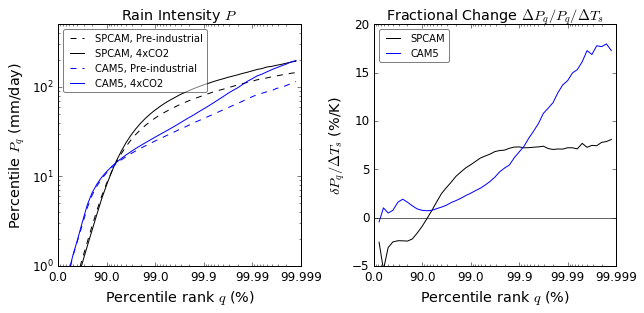

In [105]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,5e2)
ax2.set_xscale('log')
ax2.set_ylim(-5,20)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot percentiles vs. ranks for PI and 4xCO2
for compset in compsets:
    for experiment in experiments:
        
        pr_c_IL = df_quantile[compset][experiment][subset][pr_id]
        ax1.plot(x,pr_c_IL,c=col[compset],linestyle=lt[experiment],
                 label="%s, %s"%(compset_labels[compset],exp_labels[experiment]))

## Plot fractional change per unit temperature
for compset in compsets:
    
    ## Compute delta T
    ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
    ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
    dts = ts2-ts1
    
    ## Fractional change in pr
    pr_frac_change = fracChange_pr[compset][subset][pr_id]['simulated']
    pr_unit_frac_change = pr_frac_change/dts
    ax2.plot(x,pr_unit_frac_change,c=col[compset],label=compset_labels[compset])

## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.legend(loc="upper left",fancybox=True, framealpha=0.5)
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
ax2.legend(loc='upper left',fancybox=True, framealpha=0.5)

plt.savefig(os.path.join(figdir,"fig_percentilesAndFracChange_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets),'_'),subset)),
            bbox_inches='tight')
plt.show()

Fractional change with scaling

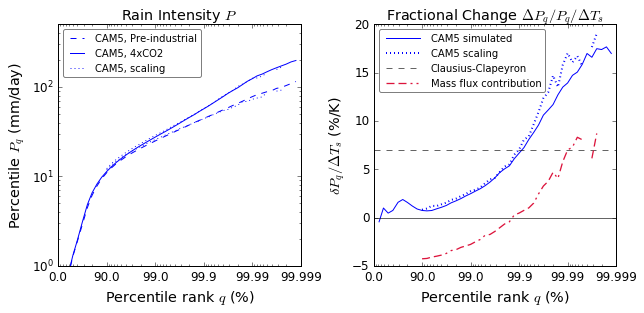

In [21]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"
q_id = 'Q'

subset = subset_all
# compsets_to_plot = compsets
compsets_to_plot = [compsets[1]]

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,5e2)
ax2.set_xscale('log')
ax2.set_ylim(-5,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compsets[0]][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compsets[0]][experiments[1]][subset][ts_id][0]
dts = ts2-ts1
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot percentiles vs. ranks for PI and 4xCO2
for compset in compsets_to_plot:
    for experiment in experiments:
        
        pr_c_IL = df_quantile[compset][experiment][subset][pr_id]
        pr_scaled = pr_sc[compset][experiment][subset][pr_id]
        ax1.plot(x,pr_c_IL,c=col[compset],linestyle=lt[experiment],
                 label="%s, %s"%(compset_labels[compset],exp_labels[experiment]))
        if compset == compsets_to_plot[0] and experiment == experiments[1]:
            lab = "%s, scaling"%(compset_labels[compset])
        else:
            lab = None
        ax1.plot(x,pr_scaled,c=col[compset],linestyle=':',lw=0.9,label=lab)
        
## Plot fractional change per unit temperature
for compset in compsets_to_plot:
    
    for pr_type in pr_types:
        
        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = "%s %s"%(compset_labels[compset],pr_type)
        ax2.plot(x,pr_unit_frac_change,c=col[compset],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])

## Plot fractional change in global mean BL specific humidity
# ax2.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6)
ax2.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6,label="Clausius-Clapeyron")
        
    
## Plot dynamic contribution 
pr_frac_change = fracChange_contributions[compset][subset][pr_id]['dyn_mean']
pr_unit_frac_change = pr_frac_change/dts
lab = r"Mass flux contribution"
ax2.plot(x,pr_unit_frac_change,c='crimson',dashes=dashes['dyn_mean'],
        label=lab,lw=1.3)
# pr_frac_change = fracChange_contributions[compset][subset][pr_id]['thermo']
# pr_unit_frac_change = pr_frac_change/dts
# lab = r"Thermo. contribution"
# ax2.plot(x,pr_unit_frac_change,c='crimson',dashes=dashes['thermo'],
#         label=lab,lw=1.3)
    
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.legend(loc="upper left",fancybox=True, framealpha=0.5)
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
ax2.legend(loc='upper left',fancybox=True, framealpha=0.5,handlelength=4)

plt.savefig(os.path.join(figdir,"fig_percentilesAndFracChange_withScaling_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

#### Figures for talk

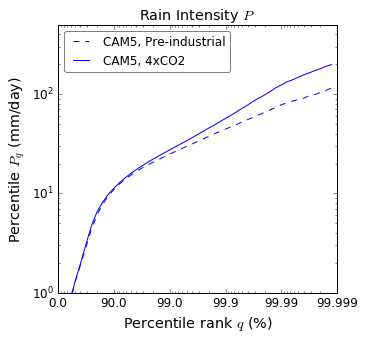

In [257]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"
q_id = 'Q'

subset = subset_all
# compsets_to_plot = compsets
compsets_to_plot = [compsets[1]]

## Plot
fig, ((ax1)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,5e2)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot percentiles vs. ranks for PI and 4xCO2
for compset in compsets_to_plot:
    for experiment in experiments:
        
        pr_c_IL = df_quantile[compset][experiment][subset][pr_id]
        pr_scaled = pr_sc[compset][experiment][subset][pr_id]
        ax1.plot(x,pr_c_IL,c=col[compset],linestyle=lt[experiment],
                 label="%s, %s"%(compset_labels[compset],exp_labels[experiment]))
        if compset == compsets_to_plot[0] and experiment == experiments[1]:
            lab = "%s, scaling"%(compset_labels[compset])
        else:
            lab = None
#         ax1.plot(x,pr_scaled,c=col[compset],linestyle=':',lw=0.9,label=lab)
    
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,):
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.legend(loc="upper left",fancybox=True, framealpha=0.5,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_talk_percentilesWithScaling_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

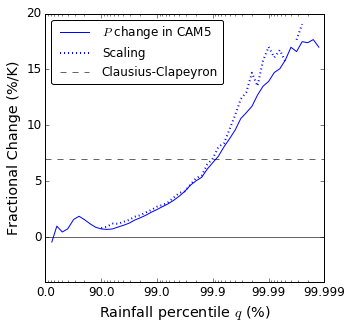

In [100]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"
q_id = 'Q'

subset = subset_all
# compsets_to_plot = compsets
compsets_to_plot = [compsets[1]]

withscaling = True
if withscaling:
    pr_types_to_plot = pr_types
else:
    pr_types_to_plot = (pr_types[0],)

## Plot
fig, (ax) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')
ax.set_ylim(-4,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compsets[0]][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compsets[0]][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## Compute Clausius-Clapeyron value
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
        
## Plot fractional change per unit temperature
for compset in compsets_to_plot:
    
    for pr_type in pr_types_to_plot:
        
        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_type == "scaling":
            lab = "Scaling"
        else:
            lab = "$P$ change in %s"%(compset_labels[compset])
        ax.plot(x,pr_unit_frac_change,c=col[compset],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])

## Plot fractional change in global mean BL specific humidity
ax.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6,label="Clausius-Clapeyron")
    
# ## Plot dynamic contribution 
# pr_frac_change = fracChange_contributions[compset][subset][pr_id]['dyn_mean']
# pr_unit_frac_change = pr_frac_change/dts
# lab = r"Mass flux contribution"
# ax.plot(x,pr_unit_frac_change,c='crimson',dashes=dashes['dyn_mean'],
#         label=lab,lw=1.3)
    
    
## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
# ax.set_title(r"Fractional Change (%/K)")
ax.set_xlabel(r"Rainfall percentile $q$ (%)")
ax.set_ylabel(r"Fractional Change (%/K)")
ax.legend(loc='upper left',fancybox=True, framealpha=1,handlelength=3,fontsize=12)

if withscaling:
    plt.savefig(os.path.join(figdir,"fig_talk_fracChangeWithScaling_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight')
else:
    plt.savefig(os.path.join(figdir,"fig_talk_fracChange_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

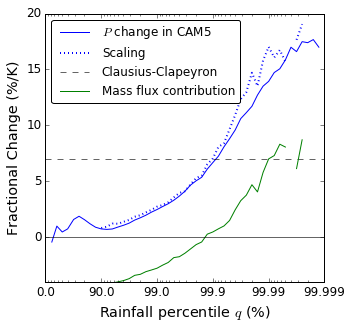

In [101]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"
q_id = 'Q'

subset = subset_all
# compsets_to_plot = compsets
compsets_to_plot = [compsets[1]]

withscaling = True
if withscaling:
    pr_types_to_plot = pr_types
else:
    pr_types_to_plot = (pr_types[0],)

## Plot
fig, (ax) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')
ax.set_ylim(-4,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compsets[0]][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compsets[0]][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## Compute Clausius-Clapeyron value
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
        
## Plot fractional change per unit temperature
for compset in compsets_to_plot:
    
    for pr_type in pr_types_to_plot:
        
        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_type == "scaling":
            lab = "Scaling"
        else:
            lab = "$P$ change in %s"%(compset_labels[compset])
        ax.plot(x,pr_unit_frac_change,c=col[compset],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])

## Plot fractional change in global mean BL specific humidity
ax.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6,label="Clausius-Clapeyron")
    
## Plot dynamic contribution 
pr_frac_change = fracChange_contributions[compset][subset][pr_id]['dyn_mean']
pr_unit_frac_change = pr_frac_change/dts
lab = r"Mass flux contribution"
ax.plot(x,pr_unit_frac_change,c='g',label=lab,lw=1)
    
    
## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Title and labels
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_xlabel(r"Rainfall percentile $q$ (%)")
ax.set_ylabel(r"Fractional Change (%/K)")

ax.legend(loc='upper left',fancybox=True, framealpha=1,handlelength=3,fontsize=12)

## Set background transparent
# ax.patch.set_visible(False)
# fig.patch.set_visible(False)

if withscaling:
    plt.savefig(os.path.join(figdir,"fig_talk_fracChangeAndScaling_withMassFluxContribution_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight',transparent=True)
else:
    plt.savefig(os.path.join(figdir,"fig_talk_fracChange_withMassFluxContribution_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight',transparent=True)
plt.show()

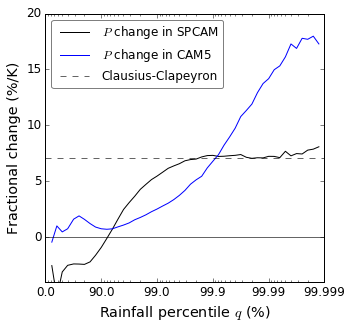

In [195]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all

## Plot
fig, (ax) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')
ax.set_ylim(-4,20)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot fractional change per unit temperature
for compset in compsets:
    
    ## Compute delta T
    ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
    ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
    dts = ts2-ts1
    
    ## Fractional change in pr
    pr_frac_change = fracChange_pr[compset][subset][pr_id]['simulated']
    pr_unit_frac_change = pr_frac_change/dts
    lab = r"$P$ change in %s"%compset_labels[compset]
    ax.plot(x,pr_unit_frac_change,c=col[compset],label=lab)

## Compute and plot Clausius-Clapeyron value
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.
ax.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6,label="Clausius-Clapeyron")
    
    
## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_xlabel(r"Rainfall percentile $q$ (%)")
ax.set_ylabel(r"Fractional change (%/K)")
ax.legend(loc='upper left',fancybox=True, framealpha=0.5,handlelength=3,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_talk_percentilesAndFracChange_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets),'_'),subset)),
            bbox_inches='tight',transparent=True)
plt.show()

#### Figures for paper

In [ ]:
print compsets

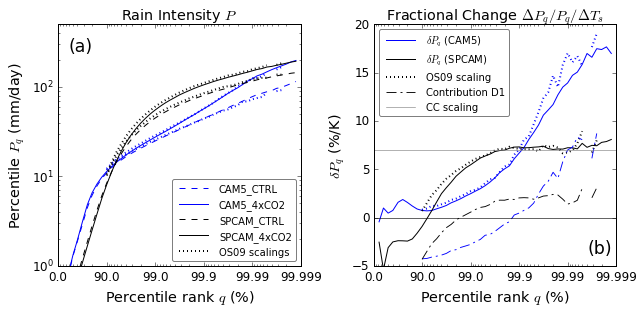

In [16]:
## Define variables
pr_id = "PRECT"
Q_id = "Q_IL"
ts_id = "TS"
q_id = 'Q'

subset = subset_all
compsets_to_plot = compsets
# compsets_to_plot = [compsets[1]]

labels_ax1 = dict()
labels_ax1 = {compset_CAM5:{experiment_PI:"CAM5_CTRL",experiment_4xCO2:"CAM5_4xCO2"},
              compset_SPCAM:{experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}}

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,5e2)
ax2.set_xscale('log')
ax2.set_ylim(-5,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compsets[0]][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compsets[0]][experiments[1]][subset][ts_id][0]
dts = ts2-ts1
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot percentiles vs. ranks for PI and 4xCO2
for compset in compsets_to_plot[::-1]:
    for experiment in experiments:
        
        pr_c_IL = df_quantile[compset][experiment][subset][pr_id]
        pr_scaled = pr_sc[compset][experiment][subset][pr_id]
        ax1.plot(x,pr_c_IL,c=col[compset],linestyle=lt[experiment],
                 label=labels_ax1[compset][experiment])
        if compset == compsets_to_plot[0] and experiment == experiments[1]:
            lab = "OS09 scalings"
        else:
            lab = None
        ax1.plot(x,pr_scaled,c=col[compset],linestyle=':',lw=lw['scaling'],label=lab)
        
## Plot fractional change per unit temperature
for compset in compsets_to_plot[::-1]:
    
    for pr_type in pr_types:
        
        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_type == 'scaling':
            if compset == compsets_to_plot[0]: 
                lab = "OS09 scaling"
            else:
                lab = None
        else:
            lab = r"$\delta P_q$ (%s)"%compset_labels[compset]
        ax2.plot(x,pr_unit_frac_change,c=col[compset],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])
    
## Plot dynamic contribution 
for compset in compsets_to_plot[::-1]:
    pr_frac_change = fracChange_contributions[compset][subset][pr_id]['dyn_mean']
    pr_unit_frac_change = pr_frac_change/dts
    if compset == compsets_to_plot[0]: 
        lab = r"Contribution D1"
    else:
        lab = None
    ax2.plot(x,pr_unit_frac_change,c=col[compset],
        label=lab,lw=0.9,dashes=[10,4,2,4])
# pr_frac_change = fracChange_contributions[compset][subset][pr_id]['thermo']
# pr_unit_frac_change = pr_frac_change/dts
# lab = r"Thermo. contribution"
# ax2.plot(x,pr_unit_frac_change,c='crimson',dashes=dashes['thermo'],
#         label=lab,lw=1.3)
    
## Plot fractional change in global mean BL specific humidity
# ax2.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6)
ax2.axhline(y=qBL_frac_change,linestyle='-',c='grey',lw=0.6,label="CC scaling")
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.legend(loc="lower right",fancybox=True, framealpha=0.5,handlelength=3.5)
ax1.text(x[1],250,"(a)",fontsize='xx-large')
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$\delta P_q$ (%/K)")
ax2.legend(loc='upper left',fancybox=True, framealpha=0.5,handlelength=3.5)
ax2.text(x[-6],-3.7,"(b)",fontsize='xx-large')

plt.savefig(os.path.join(figdir,"fig_paper_percentilesAndFracChange_withScaling_andMassFluxContribution_%s_%s_%s.pdf"%(pr_id,string.join(list(compsets_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

### Compare precipitation variables for SPCAM

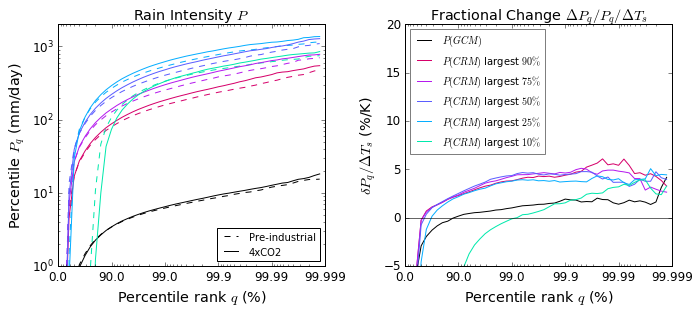

In [54]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_mf

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,20)

## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        df = df_quantile[compset_SPCAM][experiment][subset]
        Q_IL = df[Q_id]
        x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
        for pr_id in pr_ids:
            pr_c_IL = df[pr_id]
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1
for pr_id in pr_ids:
        pr1 = df_quantile[compset_SPCAM][experiments[0]][subset][pr_id]
        pr2 = df_quantile[compset_SPCAM][experiments[1]][subset][pr_id]
        pr_frac_change = (np.divide(pr2,pr1)-np.ones(pr1.size))*100
        pr_unit_frac_change = pr_frac_change/dts
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],label=pr_labels[pr_id])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.plot(x,0*x,label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c='k',linestyle=lt[experiments[1]])
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-2:],labels[-2:],loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
leg2 = ax2.legend(loc='upper left')
leg2.get_frame().set_alpha(0.5)

plt.show()

PE for PRECT piControl is 0.965563499451
PE for CRM_PREC_I50 piControl is 0.956362754822
PE for PRECT abrupt4xCO2 is 0.966078720093
PE for CRM_PREC_I50 abrupt4xCO2 is 0.998399879456
Fractional change in PE for PRECT is 0.0126351268965
Fractional change in PE for CRM_PREC_I50 is 1.0408245838


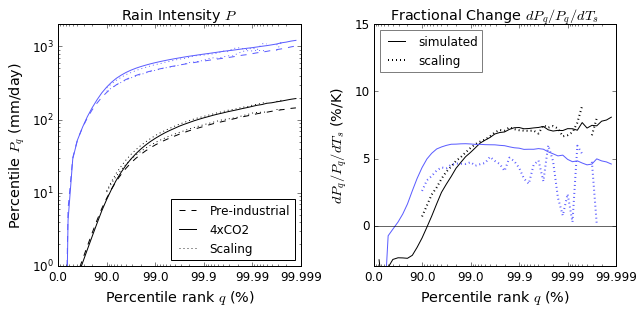

In [76]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
# subset = subset_mf
pr_ids_to_plot = ['PRECT','CRM_PREC_I50']
# pr_ids_to_plot = [pr_ids[0]]

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-3,15)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
    for pr_type in pr_types:
        
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.plot(x,0*x,label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c='k',linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c='k',linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

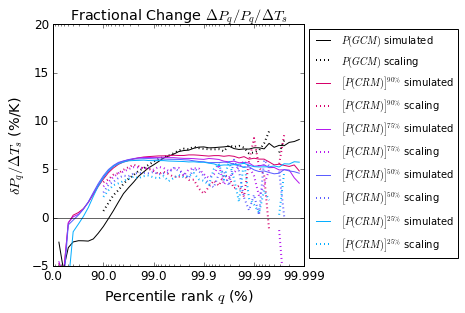

In [27]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all

## Fixed variables
compset = compset_SPCAM

## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4.5))

ax.set_xscale('log')
ax.set_ylim(-5,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compsets[0]][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compsets[0]][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids[:5]:
    
    for pr_type in pr_types:
        
        ## x-axis
        Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
        x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s %s"%(pr_labels_short[pr_id],pr_type)
        ax.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])

## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax.set_xlabel(r"Percentile rank $q$ (%)")
ax.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')

plt.show()

For talk

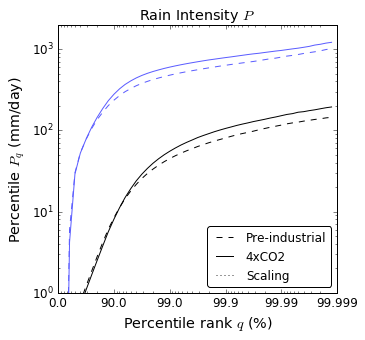

In [28]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
# subset = subset_mf
pr_ids_to_plot = [pr_ids[0],pr_ids[3]]
# pr_ids_to_plot = [pr_ids[0]]

withscaling = False

## Plot
fig, ((ax1)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,2e3)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        df = df_quantile[compset_SPCAM][experiment][subset]
        for pr_id in pr_ids_to_plot:
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
            if withscaling:
                ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
ax1.plot(x,0*x,label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c='k',linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c='k',linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12,fancybox=True)
# ax1.legend(loc="lower right")

if withscaling:
    plt.savefig(os.path.join(figdir,"fig_percentilesWithScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
else:
    plt.savefig(os.path.join(figdir,"fig_percentiles_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
    
plt.show()

['PRECT', 'CRM_PREC_I50']


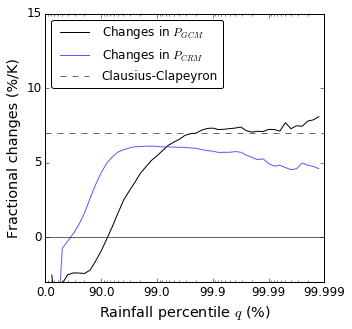

In [90]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = [pr_ids[0],pr_ids[3]]
print pr_ids_to_plot
# pr_ids_to_plot = [pr_ids[0]]

## Plot
fig, (ax) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')
ax.set_ylim(-3,15)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

labs = [r"$P_{GCM}$",r"$P_{CRM}$"]

for i in range(2):
    
    pr_id = pr_ids_to_plot[i]
    
    pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id]['simulated']
    pr_unit_frac_change = pr_frac_change/dts
    ax.plot(x,pr_unit_frac_change,c=col[pr_id],label="Changes in %s"%labs[i])
    
## Compute and plot Clausius-Clapeyron value
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.
ax.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6,label="Clausius-Clapeyron")    
    

## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)
    
## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_xlabel(r"Rainfall percentile $q$ (%)")
ax.set_ylabel(r"Fractional changes (%/K)")

ax.legend(loc='upper left',fancybox=True, framealpha=1,handlelength=3,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_talk_percentilesAndFracChange_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

Plot fractional change in 2D variable X at locations of extremes

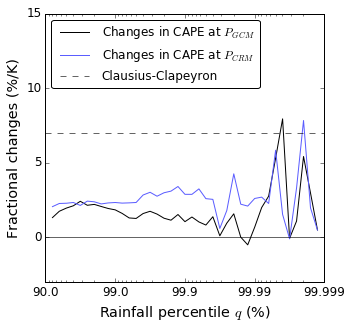

In [202]:
## Define variables
q_id = "Q"
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ["PRECT","CRM_PREC_I50"]
varid = "CAPE"

## Plot
fig, (ax) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')
ax.set_ylim(-3,15)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

labs = [r"%s at $P_{GCM}$"%varid, r"%s at $P_{CRM}$"%varid]

for i in range(2):

    pr_id = pr_ids_to_plot[i]
    
    var = {}
    for experiment in experiments:
        
        varvals = np.zeros((Q_IL_ext.size-2,))
        for j in range(len(Q_IL_ext)-2):
            Q_id = str(Q_IL_ext[j])
            varvals[j] = df_meanAtQ[compset][experiment][subset][varid][pr_id][Q_id]
        var[experiment] = varvals
        
    var_frac_change = np.subtract(np.divide(var[experiment_4xCO2],var[experiment_PI]),np.ones(Q_IL_ext.size-2))*100.
    var_frac_change = np.hstack([[np.nan]*10,var_frac_change])
    var_unit_frac_change = var_frac_change/dts
    ax.plot(x,var_unit_frac_change,c=col[pr_id],label="Changes in %s"%(labs[i]))
    
## Compute and plot Clausius-Clapeyron value
qBL_1 = np.array(df_meanProfile[compsets[0]][experiments[0]][subset][q_id])[-2]
qBL_2 = np.array(df_meanProfile[compsets[0]][experiments[1]][subset][q_id])[-2]
dqBL = qBL_2 - qBL_1
qBL_frac_change = (dqBL/qBL_1)/dts*100.
ax.axhline(y=qBL_frac_change,linestyle='--',c='k',lw=0.6,label="Clausius-Clapeyron")    
    

## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)
    
## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_xlabel(r"Rainfall percentile $q$ (%)")
ax.set_ylabel(r"Fractional changes (%/K)")

ax.legend(loc='upper left',fancybox=True, framealpha=1,handlelength=3,fontsize=12)

# plt.savefig(os.path.join(figdir,"fig_percentilesAndFracChange_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
#             bbox_inches='tight')
plt.show()

Changes in CAPE:
    
- At locations of convective-scale extremes, $\delta CAPE$ is quite uniform across percentiles. This makes sense since rainfall events span such a tiny fraction of the total area, and since thermodynamic quantities are so homogeneous in the horizontal.
    
- At locations of mesoscale extremes, $\delta CAPE$ seems to decrease (before it becomes noisy above the 99.99th percentile). Does it have something to do with the fact that rainfall events span a larger area at large mesoscale rainfall percentiles?

In [215]:
print "Mean changes in CAPE"

subset = subset_all
# subset = subset_ocean
# subset = subset_land

## Change in temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1
# Change in CAPE
cape1 = df_mean[compset_SPCAM][experiments[0]][subset]["CAPE"][0]
cape2 = df_mean[compset_SPCAM][experiments[1]][subset]["CAPE"][0]
dcape = cape2-cape1
deltacape = dcape/cape1/dts*100

print deltacape,"%/K"

Mean changes in CAPE
-0.0187220923723 %/K


### Precipitation scaling and contributions to fractional changes

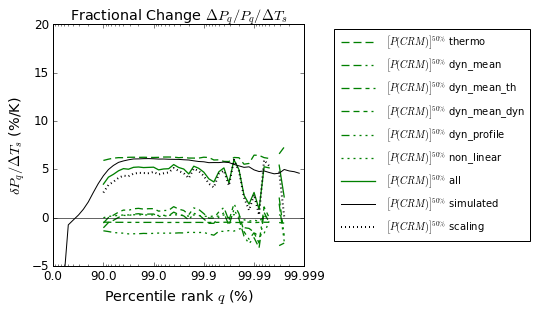

In [32]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
compset = compset_SPCAM
# compset = compset_CAM5
# pr_id = "PRECT"
pr_id = "CRM_PREC_I50"
subset = subset_all
# subset = subset_ocean

filtered = False

## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4.5))

ax.set_xscale('log')
ax.set_ylim(-5,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for contribution in contributions:
    
    ## y-axis
    pr_frac_change = fracChange_contributions[compset][subset][pr_id][contribution]
    if filtered:
        pr_frac_change = filter121(pr_frac_change)
    pr_unit_frac_change = pr_frac_change/dts
    ## plot
    lab = r"%s %s"%(pr_labels_short[pr_id],contribution)
    ax.plot(x,pr_unit_frac_change,c='g',dashes=dashes[contribution],
            label=lab,lw=1.3)
    
for pr_type in pr_types:
        
    ## y-axis
    pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
    if filtered:
        pr_frac_change = filter121(pr_frac_change)
    pr_unit_frac_change = pr_frac_change/dts
    ## plot
    lab = r"%s %s"%(pr_labels_short[pr_id],pr_type)
    ax.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
            label=lab,lw=lw[pr_type])    

## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax.set_xlabel(r"Percentile rank $q$ (%)")
ax.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1.1, 1),loc='upper left',handlelength=4)    

plt.show()

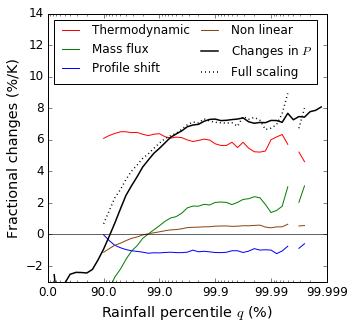

In [14]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
compset = compset_SPCAM
# compset = compset_CAM5
pr_id = "PRECT"
# pr_id = "CRM_PREC_I50"
subset = subset_all
# subset = subset_ocean
# subset = subset_mf
fraction = pr_id[-2:]

filtered = False
decomposeMassFlux = False

if decomposeMassFlux:
    contributions_to_plot = ['thermo','dyn_mean','dyn_mean_th','dyn_mean_dyn','dyn_profile','non_linear']
    colors_to_plot = ['r','g','olive','lightseagreen','b','saddlebrown']
else:
    contributions_to_plot = ['thermo','dyn_mean','dyn_profile','non_linear']
    colors_to_plot = ['r','g','b','saddlebrown']

colors = dict(zip(contributions_to_plot,colors_to_plot))


## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')
ax.set_ylim(-3,14)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

pr_type_labs = [r"Changes in $P$",r"Full scaling"]
pr_type_labels = dict(zip(pr_types,pr_type_labs))

for contribution in contributions_to_plot:
    
    ## y-axis
    pr_frac_change = fracChange_contributions[compset][subset][pr_id][contribution]
    if filtered:
        pr_frac_change = filter121(pr_frac_change)
    pr_unit_frac_change = pr_frac_change/dts
    ## plot
    lab = r"%s"%(contributions_labels[contribution])
    ax.plot(x,pr_unit_frac_change,c=colors[contribution],
            label=lab,lw=1)
    
for pr_type in pr_types:
        
    ## y-axis
    pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
    if filtered:
        pr_frac_change = filter121(pr_frac_change)
    pr_unit_frac_change = pr_frac_change/dts
    if pr_type == 'scaling':
        if pr_id == 'CRM_PREC_I50':
            offset = 1.6
        else:
            offset = 0
        pr_unit_frac_change = pr_unit_frac_change + offset*np.ones(pr_unit_frac_change.size)
    ## plot
    lab = r"%s"%(pr_type_labels[pr_type])
    ax.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
            label=lab,lw=1.5)    

## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
# ax.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
# ax.set_title(r"Contributions to fractional changes in $P$")
ax.set_xlabel(r"Rainfall percentile $q$ (%)")
ax.set_ylabel(r"Fractional changes (%/K)")
# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1.1, 1),loc='upper left',handlelength=4)    
ax.legend(loc='upper left',handlelength=2,ncol=2,columnspacing=0.6,fontsize=12)

# ax.text(0.9, 0.65, "Fraction: %s%%"%fraction,
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='k', fontsize=14)

if decomposeMassFlux:
    plt.savefig(os.path.join(figdir,"fig_fracChange_withScalingAndContributions_decompMassFlux_%s_%s_%s.pdf"%(pr_id,compset,subset)),
                bbox_inches='tight')
else:
    # plt.savefig(os.path.join(figdir,"fig_talk_fracChange_withScalingAndContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
    #             bbox_inches='tight',transparent=True)
    plt.savefig(os.path.join(figdir,"fig_fracChange_withScalingAndContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
                bbox_inches='tight')

plt.show()

Figure for paper - fractional change for PRECT and CRM_PREC_I50 and contributions

thermo 5.82767579679
dyn_mean 1.93942084017
dyn_profile -1.09157272305
non_linear 0.502252255107
thermo 6.08263158836
dyn_mean -0.0647258262062
dyn_profile -1.55530483153
non_linear 0.171994119165


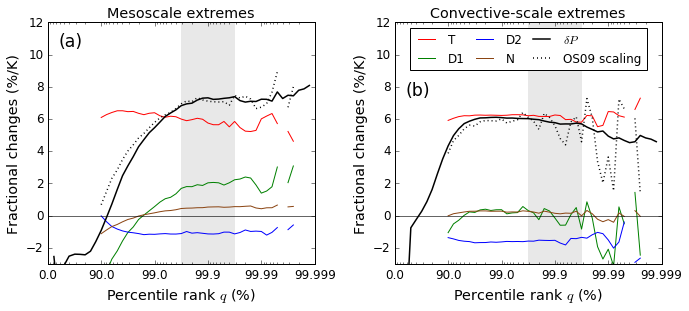

In [17]:
from scipy.optimize import minimize

## Define variables
Q_id = "Q_IL"
ts_id = "TS"
compset = compset_SPCAM
pr_ids_to_plot = ("PRECT","CRM_PREC_I50")
subset = subset_all
fraction = pr_id[-2:]

contributions_to_plot = ['thermo','dyn_mean','dyn_profile','non_linear']
colors_to_plot = ['r','g','b','saddlebrown']
colors = dict(zip(contributions_to_plot,colors_to_plot))
contrib_labs_to_plot = ['T','D1','D2','N']
contrib_labels_to_plot = dict(zip(contributions_to_plot,contrib_labs_to_plot))

## Plot
fig, ((axs)) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))


## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
Q_slice = slice(24,35)

pr_type_labs = [r"$\delta P$",r"OS09 scaling"]
pr_type_labels = dict(zip(pr_types,pr_type_labs))


for ax,pr_id in zip(axs,pr_ids_to_plot):
    ax.set_xscale('log')
    ax.set_ylim(-3,12)
    
    ## Plot fractional change per unit temperature
    ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
    ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
    dts = ts2-ts1

    # Grey shading 
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between(x[Q_slice],0,1,lw=0,facecolor='0.75',alpha=0.35,transform=trans)

    for contribution in contributions_to_plot:

        ## y-axis
        pr_frac_change = fracChange_contributions[compset][subset][pr_id][contribution]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s"%(contrib_labels_to_plot[contribution])
        ax.plot(x,pr_unit_frac_change,c=colors[contribution],
                label=lab,lw=1)
        
        print contribution, np.nanmean(pr_unit_frac_change[Q_slice])
    
    ## Compute delta_eps, the fractional change in precipitation efficiency, as the offset that minimizes 
    ## the difference between the solid and dotted curves
    def f(epsilon):
        return sqrt(np.nansum(np.square(fracChange_pr[compset][subset][pr_id]['simulated'][20:]/dts - 
                                        fracChange_pr[compset][subset][pr_id]['scaling'][20:]/dts - epsilon)))
    offset_all = minimize(f, 0, method='nelder-mead',
                   options={'xtol': 1e-8, 'disp': False})
#     print offset_all
    offset = offset_all['x']
    
    for pr_type in pr_types:

        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        if pr_type == 'scaling':
#             if pr_id == 'CRM_PREC_I50':
#                 offset = 1.6
#             else:
#                 offset = 0
            pr_unit_frac_change = pr_unit_frac_change + offset*np.ones(pr_unit_frac_change.size)
        ## plot
        lab = r"%s"%(pr_type_labels[pr_type])
        ax.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
                label=lab,lw=1.5)    

    ## Format x axis on inverse-logarithmic scale
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

    ## Labels and titles
    ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
    ax.set_xlabel(r"Percentile rank $q$ (%)")
    ax.set_ylabel(r"Fractional changes (%/K)")
    if pr_id == "PRECT":
        ax.set_title('Mesoscale extremes')
        ax.text(x[1],10.5,"(a)",fontsize='xx-large')
    else:
        ax.set_title('Convective-scale extremes')
        ax.text(x[1],7.5,"(b)",fontsize='xx-large')
        ax.legend(bbox_to_anchor=(1.2, 1),loc='upper left',handlelength=3.5)    
        ax.legend(loc='upper center',handlelength=2,ncol=3,columnspacing=0.6,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_fracChangeWithScalingAndContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

Same for updrafts alone (GCM-scale still has all updrats+downdrafts)

thermo 5.82767088718
dyn_mean 1.93971514481
dyn_profile -1.09183179798
non_linear 0.502224293242
thermo 6.22269103203
dyn_mean -0.389563651223
dyn_profile -1.76293872443
non_linear 0.193241823905


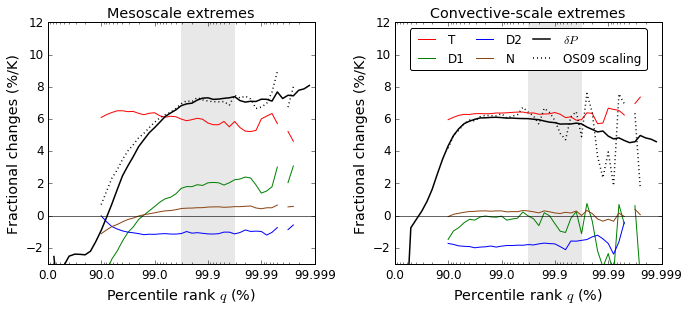

In [30]:
import matplotlib.transforms as mtransforms

## Define variables
Q_id = "Q_IL"
ts_id = "TS"
compset = compset_SPCAM
pr_ids_to_plot = ("PRECT","CRM_PREC_I50")
subset = subset_all
fraction = pr_id[-2:]

contributions_to_plot = ['thermo','dyn_mean','dyn_profile','non_linear']
colors_to_plot = ['r','g','b','saddlebrown']
colors = dict(zip(contributions_to_plot,colors_to_plot))
contrib_labs_to_plot = ['T','D1','D2','N']
contrib_labels_to_plot = dict(zip(contributions_to_plot,contrib_labs_to_plot))

## Plot
fig, ((axs)) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))


## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
Q_slice = slice(24,35)

pr_type_labs = [r"$\delta P$",r"OS09 scaling"]
pr_type_labels = dict(zip(pr_types,pr_type_labs))


for ax,pr_id in zip(axs,pr_ids_to_plot):
    ax.set_xscale('log')
    ax.set_ylim(-3,12)
    
    # Grey shading 
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between(x[Q_slice],0,1,lw=0,facecolor='0.75',alpha=0.35,transform=trans)
    
    ## Plot fractional change per unit temperature
    ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
    ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
    dts = ts2-ts1

    for contribution in contributions_to_plot:

        ## y-axis
        pr_frac_change = fracChange_contributions_updrafts_only[compset][subset][pr_id][contribution]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s"%(contrib_labels_to_plot[contribution])
        ax.plot(x,pr_unit_frac_change,c=colors[contribution],
                label=lab,lw=1)
        
        print contribution, np.nanmean(pr_unit_frac_change[Q_slice])

            
    for pr_type in pr_types:

        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        if pr_type == 'scaling':
            if pr_id == 'CRM_PREC_I50':
                offset = 1.6
            else:
                offset = 0
            pr_unit_frac_change = pr_unit_frac_change + offset*np.ones(pr_unit_frac_change.size)
        ## plot
        lab = r"%s"%(pr_type_labels[pr_type])
        ax.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
                label=lab,lw=1.5)    

    ## Format x axis on inverse-logarithmic scale
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

    ## Labels and titles
    ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
    ax.set_xlabel(r"Percentile rank $q$ (%)")
    ax.set_ylabel(r"Fractional changes (%/K)")
    if pr_id == "PRECT":
        ax.set_title('Mesoscale extremes')
    else:
        ax.set_title('Convective-scale extremes')
        ax.legend(bbox_to_anchor=(1.2, 1),loc='upper left',handlelength=3.5)    
        ax.legend(loc='upper center',fancybox=True,handlelength=2,ncol=3,columnspacing=0.6,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_fracChangeWithScalingAndContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()


Show how the magnitude of the contributions vary with fraction in CRM_PREC

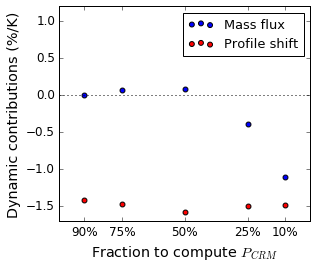

In [44]:
compset = compset_SPCAM
subset = subset_all
# subset = subset_mf

contributions_to_plot = ['dyn_mean','dyn_profile']

## Compute fractional changes per unit temperature
ts_id = 'TS'
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

curves = dict(zip(contributions_to_plot,[np.zeros((len(crm_pr_ids),)),np.zeros((len(crm_pr_ids),))]))

for contribution in contributions_to_plot:

    for i in range(len(crm_pr_ids)):
        pr_id = crm_pr_ids[i]

        ## y-axis
        pr_frac_change = fracChange_contributions[compset_SPCAM][subset][pr_id][contribution]
        pr_fc = np.nanmean(pr_frac_change[:35])
        pr_unit_fc = pr_fc/dts

        curves[contribution][i] = pr_unit_fc
        
## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4))

# x-axis
x = np.array([int(pr_id[-2:]) for pr_id in crm_pr_ids])
# colors
colors = dict(zip(contributions_to_plot,['b','r']))
leg = []

for contribution in contributions_to_plot:
    leg.append(ax.scatter(x,curves[contribution],c=colors[contribution],s=24))
    
ax.invert_xaxis()
ax.set_ylim(-1.7,1.2)
ax.axhline(y=0,c='k',linestyle=':')
ax.set_ylabel(r"Dynamic contributions (%/K)")
ax.set_xlabel(r"Fraction to compute $P_{CRM}$")
plt.xticks(x,["%s%%"%str(i) for i in x])
plt.legend(leg,[contributions_labels[contribution] for contribution in contributions_to_plot],
           loc='upper right',fontsize=13)

plt.savefig(os.path.join(figdir,"fig_dynamic_contributions_vs_fraction_%s_%s_%s.pdf"%(string.join(list(contributions_to_plot),'_'),
                                                                                      compset,subset)),
            bbox_inches='tight')
plt.show()

### Precipitation scaling and contributions for the average of CRM_PREC_I90, I75 and I50 

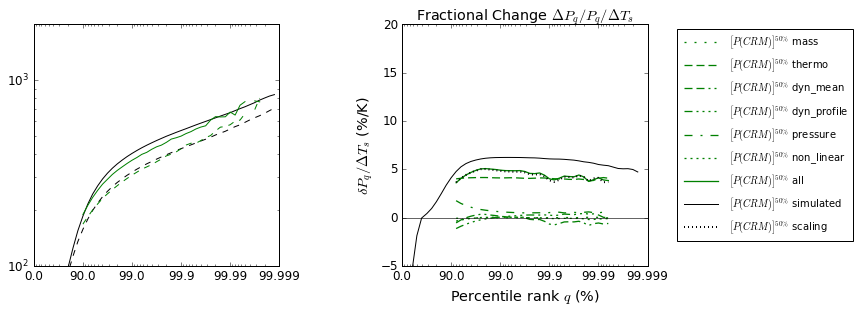

In [65]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
compset = compset_SPCAM
# compset = compset_CAM5
subset = subset_all
# subset = subset_ocean

filtered = True

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e2,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

## Plot 1
for experiment in experiments:
    # simulated pr
    prs = []
    for pr_id in crm_pr_ids[:3]:
        prs.append(df_quantile[compset][experiment][subset][pr_id])
    pr = np.vstack(prs).mean(axis=0)
    ax1.plot(x,pr,c='k',linestyle=lt[experiment])
    # scaling pr
    prs = []
    for pr_id in crm_pr_ids[:3]:
        prs.append(pr_sc[compset][experiment][subset][pr_id])
    pr = np.vstack(prs).mean(axis=0)
    # Plot
    ax1.plot(x,pr,c='g',linestyle=lt[experiment])

## Plot 2
for contribution in contributions:
    
    ## y-axis
    pr_frac_changes = []
    for pr_id in crm_pr_ids[:3]:
        pr_frac_changes.append(fracChange_contributions[compset][subset][pr_id][contribution])
    pr_frac_change = np.vstack(pr_frac_changes).mean(axis=0)
    if filtered:
        pr_frac_change = filter121(pr_frac_change)
            
    pr_unit_frac_change = pr_frac_change/dts
    ## plot
    lab = r"%s %s"%(pr_labels_short[pr_id],contribution)
    ax2.plot(x,pr_unit_frac_change,c='g',dashes=dashes[contribution],
            label=lab,lw=1.3)
    
for pr_type in pr_types:
        
    ## y-axis
    pr_frac_changes = []
    for pr_id in crm_pr_ids[:3]:
        pr_frac_changes.append(fracChange_pr[compset][subset][pr_id][pr_type])
    pr_frac_change = np.vstack(pr_frac_changes).mean(axis=0)
    if filtered:
        pr_frac_change = filter121(pr_frac_change)
    pr_unit_frac_change = pr_frac_change/dts
    ## plot
    lab = r"%s %s"%(pr_labels_short[pr_id],pr_type)
    ax2.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
            label=lab,lw=lw[pr_type])

## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

## Labels and titles
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
# ax2.legend(loc='upper left')
ax2.legend(bbox_to_anchor=(1.1, 1),loc='upper left',handlelength=4)    

plt.show()

### Relationship P(GCM), P(CRM) and convective area?

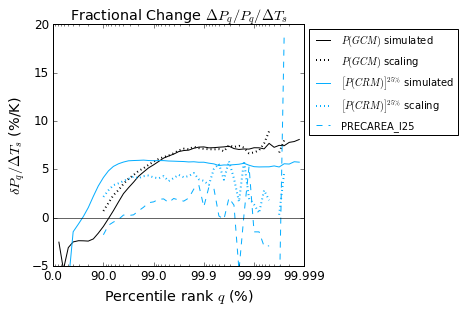

In [353]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I25"
subset = subset_all
# subset = subset_ocean

filtered = False

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4.5))

ax.set_xscale('log')
ax.set_ylim(-5,20)
    
## Plot fractional change per unit temperature
ts1 = df_mean[compsets[0]][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compsets[0]][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for pr_id in (gcm_pr_id,crm_pr_id):
    
    for pr_type in pr_types:
        
        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        if filtered:
            pr_frac_change = filter121(pr_frac_change)
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s %s"%(pr_labels_short[pr_id],pr_type)
        ax.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[pr_type],
                label=lab,lw=lw[pr_type])

### Convective area
## y-axis
area_frac_change = fracChange_area[subset][area_id]
if filtered:
    area_frac_change = filter121(area_frac_change)
area_unit_frac_change = area_frac_change/dts
## plot
lab = r"%s"%(area_id)
ax.plot(x,area_unit_frac_change,c=col[pr_id],linestyle='--',
        label=lab)

        
## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)

## Labels and titles
ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax.set_title(r"Fractional Change $\Delta P_q/P_q/\Delta T_s$")
ax.set_xlabel(r"Percentile rank $q$ (%)")
ax.set_ylabel(r"$\delta P_q/\Delta T_s$ (%/K)")
# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')

plt.show()

Plot P_GCM_q vs. P_GCM(P_CRM_75%_q)

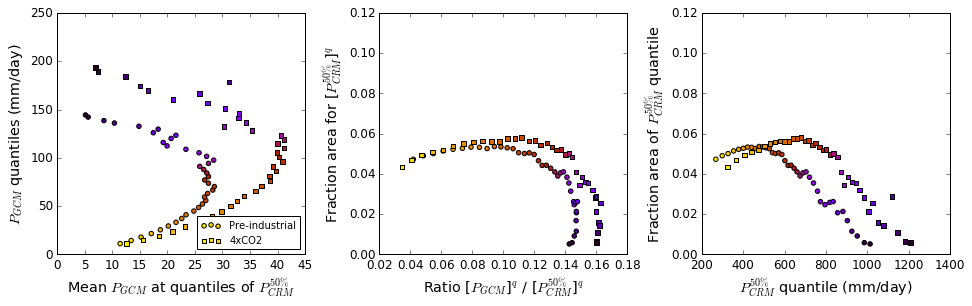

In [121]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1,figsize=(16,4.5))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

for experiment in experiments:
    
    gcm_pr = df_quantile[compset][experiment][subset][gcm_pr_id][10:]
    gcm_pr_at_crm_pr_q = df_meanAtQ[compset][experiment][subset][gcm_pr_id][crm_pr_id]*86400*1000
    
    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    ax1.scatter(gcm_pr_at_crm_pr_q,gcm_pr,c=cols,marker=mark[experiment],label=lab)
    
    crm_pr = df_quantile[compset][experiment][subset][crm_pr_id][10:]
    frac_at_crm_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][crm_pr_id])[0,:]
    
    ## PRECFRAC at CRM_PREC quantiles vs. (PRECT quantile) / (CRM_PREC quantiles)
    ax2.scatter(np.divide(gcm_pr,crm_pr),frac_at_crm_pr_q,c=cols,marker=mark[experiment])
    
    ## PRECFRAC at CRM_PREC quantiles vs. CRM_PREC quantiles
    ax3.scatter(crm_pr,frac_at_crm_pr_q,c=cols,marker=mark[experiment])

ax1.set_xlabel(r"Mean %s at quantiles of %s"%(pr_labels_veryshort[gcm_pr_id],pr_labels_veryshort[crm_pr_id]))
ax1.set_ylabel(r"$P_{GCM}$ quantiles (mm/day)")
ax1.legend(loc="lower right")
ax2.set_xlabel(r"Ratio [%s]${}^q$ / [%s]${}^q$"%(pr_labels_veryshort[gcm_pr_id],pr_labels_veryshort[crm_pr_id]))
ax2.set_ylabel(r"Fraction area for [%s]${}^q$"%(pr_labels_veryshort[crm_pr_id]))
ax2.set_ylim(0,0.12)
ax3.set_xlabel(r"%s quantile (mm/day)"%(pr_labels_veryshort[crm_pr_id]))
ax3.set_ylabel(r"Fraction area of %s quantile"%(pr_labels_veryshort[crm_pr_id]))
ax3.set_ylim(0,0.12)

plt.savefig(os.path.join(figdir,"fig_relationship_PGCM_PCRM_FRACAREA_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')
plt.show()

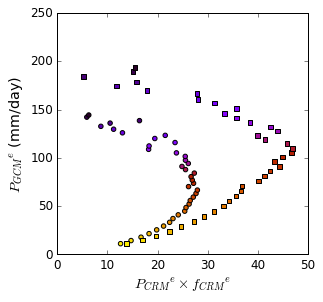

In [122]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I75"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax1)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4.5))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

for experiment in experiments:
    
    gcm_pr = df_quantile[compset][experiment][subset][gcm_pr_id][10:]
    crm_pr = df_quantile[compset][experiment][subset][crm_pr_id][10:]
    frac_at_crm_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][crm_pr_id])[0,:]
    gcm_pr_est = np.multiply(crm_pr,frac_at_crm_pr_q)
    
    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    ax1.scatter(gcm_pr_est,gcm_pr,c=cols,marker=mark[experiment],label=lab)


ax1.set_xlabel(r"${P_{CRM}}^e\times {f_{CRM}}^e$")
ax1.set_ylabel(r"${P_{GCM}}^e$ (mm/day)")
# ax1.legend(loc="lower right")
# ax2.set_xlabel(r"Ratio [%s]${}^q$ / [%s]${}^q$"%(pr_labels_veryshort[gcm_pr_id],pr_labels_veryshort[crm_pr_id]))
# ax2.set_ylabel(r"Fraction area for [%s]${}^q$"%(pr_labels_veryshort[crm_pr_id]))
# ax3.set_xlabel(r"%s quantile (mm/day)"%(pr_labels_veryshort[crm_pr_id]))
# ax3.set_ylabel(r"Fraction area of %s quantile"%(pr_labels_veryshort[crm_pr_id]))

plt.savefig(os.path.join(figdir,"fig_relationship_PGCM_PGCMest_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

Comparing convective mass flux and GCM-scale mass flux at locations of convective-scale extremes

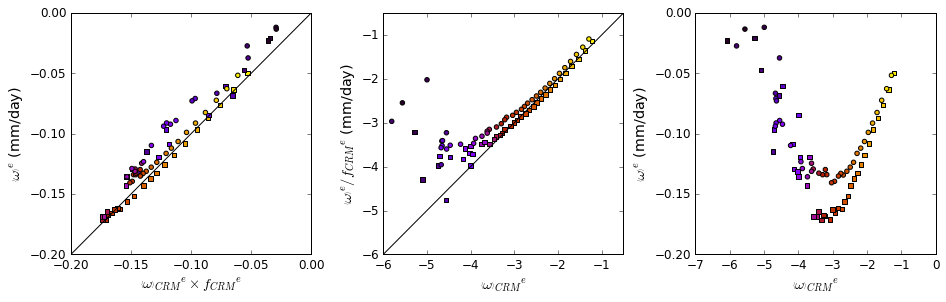

In [35]:
## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
# pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = "OMEGA"
crm_w_id = "CRM_W_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1,figsize=(15.5,4.5))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

for experiment in experiments[::-1]:
    
    gcm_mf = np.zeros((Q_IL_ext.size-2,))
    crm_mf = np.zeros((Q_IL_ext.size-2,))
    for i in range(len(Q_IL_ext)-2):
        Q_id = str(Q_IL_ext[i])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        gcm_mf[i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        pres_sc,qvs_sc,crm_omega_sc,rho_sc,wspeed_sc = scaling_profiles[compset][experiment][subset][pr_id][Q_id]
        crm_mf[i] = verticalPressureIntegral(pres_sc,crm_omega_sc)/verticalPressureIntegral(pres_sc)
        
    ## Get fraction area
    frac_at_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est = np.multiply(crm_mf,frac_at_pr_q)
    crm_mf_est = np.divide(gcm_mf,frac_at_pr_q)
    
    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    ax1.scatter(gcm_mf_est,gcm_mf,c=cols,marker=mark[experiment],label=lab)
    ax2.scatter(crm_mf,crm_mf_est,c=cols,marker=mark[experiment],label=lab)
    ax3.scatter(crm_mf,gcm_mf,c=cols,marker=mark[experiment],label=lab)


addOneToOneLine = pr_id == 'CRM_PREC_I50'
if addOneToOneLine:
    xmin1 = -0.2
    xmax1 = 0
    xmin2 = -6
    xmax2 = -0.5
    ax1.plot((xmin1,xmax1),(xmin1,xmax1),'k')
    ax2.plot((xmin2,xmax2),(xmin2,xmax2),'k')
    ax1.set_xlim((xmin1,xmax1))
    ax1.set_ylim((xmin1,xmax1))
    ax2.set_xlim((xmin2,xmax2))
    ax2.set_ylim((xmin2,xmax2))
ax1.set_xlabel(r"${\left<\omega\right>_{CRM}}^e\times {f_{CRM}}^e$")
ax1.set_ylabel(r"${\left<\omega\right>}^e$ (mm/day)")
ax2.set_xlabel(r"${\left<\omega\right>_{CRM}}^e$")
ax2.set_ylabel(r"${\left<\omega\right>}^e / {f_{CRM}}^e$ (mm/day)")
ax3.set_xlabel(r"${\left<\omega\right>_{CRM}}^e$")
ax3.set_ylabel(r"${\left<\omega\right>}^e$ (mm/day)")

# ax1.legend(loc="lower right")
# ax2.set_xlabel(r"Ratio [%s]${}^q$ / [%s]${}^q$"%(pr_labels_veryshort[gcm_pr_id],pr_labels_veryshort[crm_pr_id]))
# ax2.set_ylabel(r"Fraction area for [%s]${}^q$"%(pr_labels_veryshort[crm_pr_id]))
# ax3.set_xlabel(r"%s quantile (mm/day)"%(pr_labels_veryshort[crm_pr_id]))
# ax3.set_ylabel(r"Fraction area of %s quantile"%(pr_labels_veryshort[crm_pr_id]))

plt.savefig(os.path.join(figdir,"fig_relationships_omegaGCM_omegaCRM_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

Plot what the descending speed is, based on a mass balance

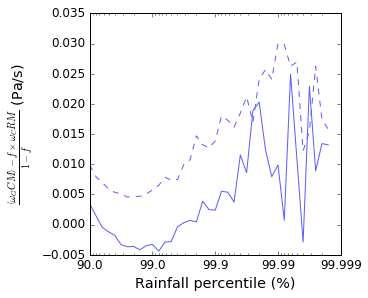

In [232]:
## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
# pr_id = "PRECT"
gcm_omega_id = "OMEGA"
crm_w_id = "CRM_W_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax1)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4.5))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments[::-1]:
    
    gcm_mf = np.zeros((Q_IL_ext.size-2,))
    crm_mf = np.zeros((Q_IL_ext.size-2,))
    for i in range(len(Q_IL_ext)-2):
        Q_id = str(Q_IL_ext[i])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        gcm_mf[i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        pres_sc,qvs_sc,crm_omega_sc,rho_sc,wspeed_sc = scaling_profiles[compset][experiment][subset][pr_id][Q_id]
        crm_omega_sc[crm_omega_sc > 0] = 0
        crm_mf[i] = verticalPressureIntegral(pres_sc,crm_omega_sc)/verticalPressureIntegral(pres_sc)
        
    ## Get fraction area
    frac_at_crm_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est = np.multiply(crm_mf,frac_at_crm_pr_q)
    crm_mf_est = np.divide(gcm_mf,frac_at_crm_pr_q)

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    y1 = np.divide(np.subtract(gcm_mf,gcm_mf_est),
                   np.subtract(np.ones(frac_at_crm_pr_q.size),frac_at_crm_pr_q))
#     y1 = np.subtract(gcm_mf,gcm_mf_est)
    y1 = np.hstack([[np.nan]*9,y1,[np.nan]])
    ax1.plot(x,y1,c=col[pr_id],linestyle=lt[experiment])

## Format x axis on inverse-logarithmic scale
ax1.set_xscale('log')
ax1.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax1.set_xticklabels(labels)

xmin1 = -0.2
xmax1 = 0
ax1.set_xlabel(r"Rainfall percentile (%)")
ax1.set_ylabel(r"$\frac{\left<\omega_GCM\right>-f\times \omega_CRM}{1-f}$ (Pa/s)")

plt.savefig(os.path.join(figdir,"fig_advanced_relationships_omegaGCM_omegaCRM_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

Plot fraction area of IYY vs. percentile rank for PRECT and CRM_PREC_IYY

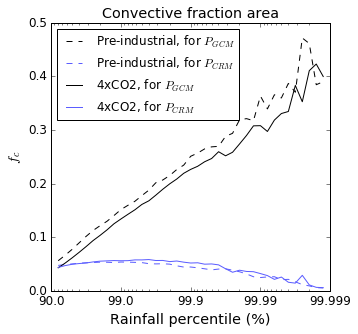

In [54]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments:
    
    for pr_id in (gcm_pr_id,crm_pr_id):
        
        lab = "%s, for %s"%(exp_labels[experiment],pr_labels_vvshort[pr_id])
        frac_at_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
        frac_at_pr_q = np.hstack([[np.nan]*10,frac_at_pr_q])
        ax.plot(x,frac_at_pr_q,c=col[pr_id],linestyle=lt[experiment],
            label=lab)
        
## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)


ax.set_xlabel(r"Rainfall percentile (%)")
ax.set_ylabel(r"$f_c$")
ax.set_title(r"Convective fraction area")
ax.legend(loc='upper left',handlelength=2,ncol=1,columnspacing=0.6,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_fracareaVsPercentileRank_%s_%s_%s_%s.pdf"%(string.join([gcm_pr_id,crm_pr_id],'_'),
                                                                             compset,
                                                                             string.join(list(experiments),'_'),
                                                                             subset)),
            bbox_inches='tight')
plt.show()

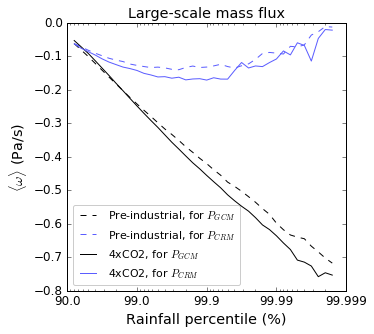

In [49]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM

## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments:
    
    for pr_id in (gcm_pr_id,crm_pr_id):
        
        lab = "%s, for %s"%(exp_labels[experiment],pr_labels_vvshort[pr_id])
        
        mf = np.array([np.nan]*(len(Q_IL)-10))
        
        for i in range(len(Q_IL)-11):
            
            Q_id = str(Q_IL[i+10])
#             print Q_id,
            omega_at_pr_q = df_meanProfileAtQ[compset][experiment][subset]['OMEGA'][pr_id][Q_id]
#             print len(omega_at_pr_q),
            pres_s = df_meanAtQ[compset][experiment][subset][ps_id][pr_id][Q_id][0]
            pres = computeP(pres_s)
#             print len(pres)
            mf[i] = verticalPressureIntegral(pres,omega_at_pr_q)/verticalPressureIntegral(pres)
        
#         omega_at_pr_q = np.array(df_meanAtQ[compset][experiment][subset]['MF'][pr_id])[0,:]
#         frac_at_pr_q = np.hstack([[np.nan]*10,frac_at_pr_q])
        mf = np.hstack([[np.nan]*10,mf])
        ax.plot(x,mf,c=col[pr_id],linestyle=lt[experiment],
            label=lab)
        
        

## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)


ax.set_xlabel(r"Rainfall percentile (%)")
ax.set_ylabel(r"$\langle \omega \rangle$ (Pa/s)")
ax.set_title(r"Large-scale mass flux")
ax.legend(loc='lower left',handlelength=2,ncol=1,columnspacing=0.6,framealpha=0.2,fancybox=True,fontsize=11)

plt.savefig(os.path.join(figdir,"fig_largeScaleMassFluxVsPercentileRank_%s_%s_%s_%s.pdf"%(string.join([gcm_pr_id,crm_pr_id],'_'),
                                                                             compset,
                                                                             string.join(list(experiments),'_'),
                                                                             subset)),
            bbox_inches='tight')
plt.show()

Mean fractional changes in omega_GCM, fracarea_CRM, omega_CRM

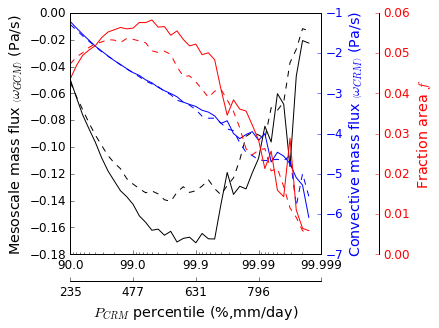

In [31]:
## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
# pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = "OMEGA"
crm_w_id = "CRM_W_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
area_id = area_id_root+crm_pr_id.split('_')[-1]
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax1)) = plt.subplots(ncols=1,nrows=1,figsize=(4.5,4.5))
ax1.set_xscale('log')
ax2 = ax1.twinx()
ax3 = ax1.twinx()
c1 = 'k'
c2 = 'b'
c3 = 'r'
ax2.tick_params('y', colors=c2)
ax3.tick_params('y', colors=c3)
ax3.spines['right'].set_position(('axes',1.23))  # shifts position of ax3

# Secondary x axis
ax_newx = ax1.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments[::-1]:
    
    gcm_mf = np.zeros((Q_IL_ext.size-2,))
    crm_mf = np.zeros((Q_IL_ext.size-2,))
    for i in range(len(Q_IL_ext)-2):
        Q_id = str(Q_IL_ext[i])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        gcm_mf[i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        pres_sc,temp_sc,qvs_sc,crm_omega_sc,rho_sc,wspeed_sc = scaling_profiles[compset][experiment][subset][pr_id][Q_id]
        crm_omega_sc[crm_omega_sc > 0] = 0
        crm_mf[i] = verticalPressureIntegral(pres_sc,crm_omega_sc)/verticalPressureIntegral(pres_sc)
        
    ## Get fraction area
    frac_at_crm_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est = np.multiply(crm_mf,frac_at_crm_pr_q)
    crm_mf_est = np.divide(gcm_mf,frac_at_crm_pr_q)

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    gcm_mf = np.hstack([[np.nan]*9,gcm_mf,[np.nan]])
    crm_mf = np.hstack([[np.nan]*9,crm_mf,[np.nan]])
    frac_at_crm_pr_q = np.hstack([[np.nan]*9,frac_at_crm_pr_q,[np.nan]])
    ax1.plot(x,gcm_mf,c=c1,linestyle=lt[experiment])
    ax2.plot(x,crm_mf,c=c2,linestyle=lt[experiment])
    ax3.plot(x,frac_at_crm_pr_q,c=c3,linestyle=lt[experiment])


## Format x axis on inverse-logarithmic scale
# ax1.set_xscale('log')
ax1.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax1.set_xticklabels(labels)


## Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax1.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')

ax1.set_ylabel(r"Mesoscale mass flux $\left<\omega_{GCM}\right>$ (Pa/s)",color=c1)
ax2.set_ylabel(r"Convective mass flux $\left<\omega_{CRM}\right>$ (Pa/s)",color=c2)
ax3.set_ylabel(r"Fraction area $f$",color=c3)

plt.savefig(os.path.join(figdir,"fig_omegaGCM_omegaCRM_fracarea_vs_Q_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

Figure for paper - correlation and previous figure side by side, with color scale

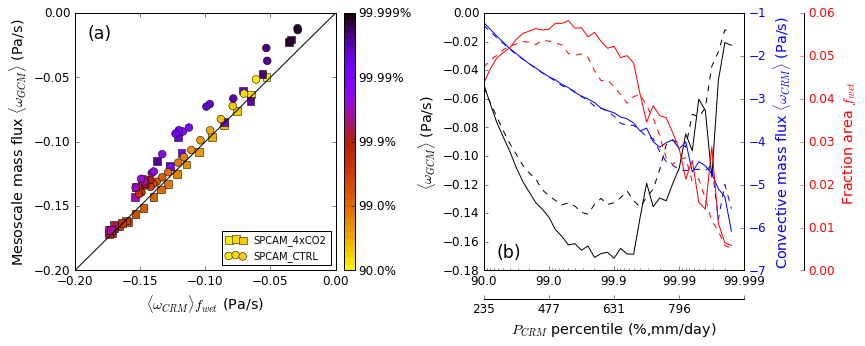

In [23]:
###---- Scatter plot ----###

## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
# pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = "OMEGA"
crm_w_id = "CRM_W_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot scatter
fig = plt.figure(figsize=(12,4.8))
gs = gridspec.GridSpec(1,3,width_ratios=[5,0.7,5])
ax0 = plt.subplot(gs[0])

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

labels_ax0 = {experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}

for experiment in experiments[::-1]:
    
    gcm_mf = np.zeros((Q_IL_ext.size-2,))
    crm_mf = np.zeros((Q_IL_ext.size-2,))
    for i in range(len(Q_IL_ext)-2):
        Q_id = str(Q_IL_ext[i])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        gcm_mf[i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        pres_sc,temp_sc,qvs_sc,crm_omega_sc,rho_sc,wspeed_sc = scaling_profiles[compset][experiment][subset][pr_id][Q_id]
        crm_mf[i] = verticalPressureIntegral(pres_sc,crm_omega_sc)/verticalPressureIntegral(pres_sc)
        
    ## Get fraction area
    frac_at_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est = np.multiply(crm_mf,frac_at_pr_q)
#     crm_mf_est = np.divide(gcm_mf,frac_at_pr_q)
    
    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = labels_ax0[experiment]
    ax0.scatter(gcm_mf_est,gcm_mf,c=cols,marker=mark[experiment],label=lab,linewidth=0.5,s=60)


addOneToOneLine = pr_id == 'CRM_PREC_I50'
if addOneToOneLine:
    xmin1 = -0.2
    xmax1 = 0
    ax0.plot((xmin1,xmax1),(xmin1,xmax1),'k')
    ax0.set_xlim((xmin1,xmax1))
    ax0.set_ylim((xmin1,xmax1))
ax0.set_xlabel(r"${\langle\omega_{CRM}\rangle}f_{wet}$ (Pa/s)")
ax0.set_ylabel(r"Mesoscale mass flux $\langle\omega_{GCM}\rangle$ (Pa/s)")
ax0.legend(loc="lower right")


###---- Plot colorbar ----###

ax1 = plt.subplot(gs[1])

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax1.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext)),cmap=cmap)
box = ax1.get_position()
ax1.set_position([box.x0*1.05, box.y0, box.width, box.height])
# axColor = plt.axes([box.x0*1.05 - box.width * 0.37, box.y0, 0.012, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 1.87, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext[i] for i in Q_ind])
ax1.axes.clear()
ax1.axis('off')

###---- Second plot ----###


## Plot
ax2 = plt.subplot(gs[2])
ax2.set_xscale('log')
ax3 = ax2.twinx()
ax4 = ax2.twinx()
c1 = 'k'
c2 = 'b'
c3 = 'r'
ax3.tick_params('y', colors=c2)
ax4.tick_params('y', colors=c3)
ax4.spines['right'].set_position(('axes',1.23))  # shifts position of ax3

# Secondary x axis
ax_newx = ax2.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments[::-1]:
    
    gcm_mf = np.zeros((Q_IL_ext.size-2,))
    crm_mf = np.zeros((Q_IL_ext.size-2,))
    for i in range(len(Q_IL_ext)-2):
        Q_id = str(Q_IL_ext[i])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        gcm_mf[i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        pres_sc,temp_sc,qvs_sc,crm_omega_sc,rho_sc,wspeed_sc = scaling_profiles[compset][experiment][subset][pr_id][Q_id]
        crm_omega_sc[crm_omega_sc > 0] = 0
        crm_mf[i] = verticalPressureIntegral(pres_sc,crm_omega_sc)/verticalPressureIntegral(pres_sc)
        
    ## Get fraction area
    frac_at_crm_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est = np.multiply(crm_mf,frac_at_crm_pr_q)
    crm_mf_est = np.divide(gcm_mf,frac_at_crm_pr_q)

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    gcm_mf = np.hstack([[np.nan]*9,gcm_mf,[np.nan]])
    crm_mf = np.hstack([[np.nan]*9,crm_mf,[np.nan]])
    frac_at_crm_pr_q = np.hstack([[np.nan]*9,frac_at_crm_pr_q,[np.nan]])
    ax2.plot(x,gcm_mf,c=c1,linestyle=lt[experiment])
    ax3.plot(x,crm_mf,c=c2,linestyle=lt[experiment])
    ax4.plot(x,frac_at_crm_pr_q,c=c3,linestyle=lt[experiment])


## Format x axis on inverse-logarithmic scale
ax2.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax2.set_xticklabels(labels)


## Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax1.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')

ax2.set_ylabel(r"$\langle\omega_{GCM}\rangle$ (Pa/s)",color=c1)
ax3.set_ylabel(r"Convective mass flux $\langle\omega_{CRM}\rangle$ (Pa/s)",color=c2)
ax4.set_ylabel(r"Fraction area $f_{wet}$",color=c3)

# subplot labels
trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.05,0.9,"(a)",fontsize='xx-large',transform=trans0)
trans2 = mtransforms.blended_transform_factory(ax2.transAxes, ax2.transAxes)
ax2.text(0.05,0.05,"(b)",fontsize='xx-large',transform=trans2)


plt.savefig(os.path.join(figdir,"fig_paper_omegaGCM_omegaCRM_fracarea_vs_Q_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

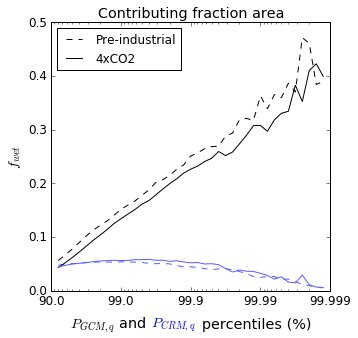

In [17]:
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

## Define variables
Q_id = "Q_IL"
ts_id = "TS"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
subset = subset_all

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

ax.set_xscale('log')

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments:
    
    for pr_id in (gcm_pr_id,crm_pr_id):
        
        frac_at_pr_q = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
        frac_at_pr_q = np.hstack([[np.nan]*10,frac_at_pr_q])
        lab = ''
        if pr_id == gcm_pr_id:
            lab = exp_labels[experiment]
        ax.plot(x,frac_at_pr_q,c=col[pr_id],linestyle=lt[experiment],
            label=lab)
        
## Format x axis on inverse-logarithmic scale
ax.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels)


### x-axis legend with colors
xbox1 = TextArea(r"$P_{GCM,q}$ and", textprops=dict(color="k",size="x-large",ha='left',va='center'))
xbox2 = TextArea(r"$P_{CRM,q}$ ", textprops=dict(color="b",size="x-large",ha='left',va='center'))
xbox3 = TextArea(r"percentiles (%)", textprops=dict(color="k",size="x-large",ha='left',va='center'))

xbox = HPacker(children=[xbox1, xbox2, xbox3], align='baseline', pad=0, sep=5)

anchored_xbox = AnchoredOffsetbox(loc=8, child=xbox, pad=0., frameon=False, bbox_to_anchor=(0.5,-0.15), 
                                  bbox_transform=ax.transAxes, borderpad=0.)

ax.add_artist(anchored_xbox)
# ax.set_xlabel(r"\textcolor{blue}{%s} percentile (%%)"%(r"$P_{CRM}$"))
ax.set_ylabel(r"$f_{wet}$")
ax.set_title(r"Contributing fraction area")
ax.legend(loc='upper left',handlelength=2,ncol=1,columnspacing=0.6,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_fracareaVsPercentileRank_%s_%s_%s_%s.pdf"%(string.join([gcm_pr_id,crm_pr_id],'_'),
                                                                             compset,
                                                                             string.join(list(experiments),'_'),
                                                                             subset)),
            bbox_inches='tight')
plt.show()

## Joint statistics between two precipitation variables

Plot a 2D heatmap on inverse-logarithmic scale for the x and y axes defined as the percentiles two different precipitation variables. Colors defined on a logarithmic scale.

Mass lower left corner: 0.761427890505


/Users/bfildier/anaconda/lib/python2.7/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


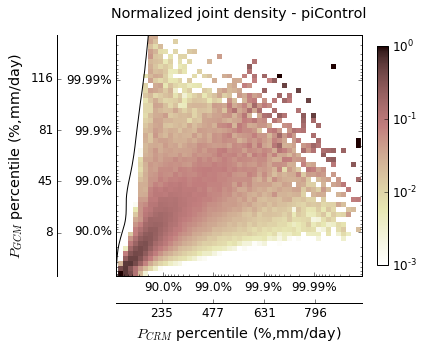

In [40]:
from scipy.interpolate import interp1d

## Free parameters
pr_id_1 = "CRM_PREC_I50"
pr_id_2 = "PRECT"

compset = compset_SPCAM
experiment = experiment_PI
subset = subset_all

## Fixed parameters
df_q = df_quantile[compset][experiment][subset]
Q_IL = df_q['Q_IL']
df_dens = df_density2D[compset][experiment][subset]

##-- Compute 2D density
H = np.array(df_dens[pr_id_1][pr_id_2].T)

print "Mass lower left corner:", (H[:10,:10]).sum()

##-- Normalize 2D density
# weights = np.diag(np.array(df_dens[pr_id_1][pr_id_1].T))
# H_norm = normalizeJointDensity(H,weights)
H_norm = normalizeJointDensity2(H)

##-- Start plot --##
fig = plt.figure(figsize=(5.5,4.5))
ax = fig.add_subplot(111)

##-- ticks on linear scale
# im = ax.matshow(np.flipud(H), cmap=plt.cm.pink_r, norm=LogNorm(vmin=1e-5, vmax=1))
# ticks = np.arange(9,len(weights),10)
# ticklabs = [str(Q_IL[i].round(4)) for i in ticks]
# plt.xticks(ticks,ticklabs)
# plt.yticks(ticks,ticklabs)

##-- ticks on logarithmic scale
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
im = ax.matshow(H_norm, cmap=plt.cm.pink_r,extent=[x[0], x[-1], x[0], x[-1]],origin='lower',
                norm=LogNorm(vmin=1e-3, vmax=1))
# im = ax.matshow(H_norm, cmap=plt.cm.pink_r,extent=[x[0], x[-1], x[0], x[-1]],origin='lower')

## Compute 1 by 1 intensity line
pr_q_gcm = df_quantile[compset][experiment][subset][pr_id_2]
pr_q_crm = df_quantile[compset][experiment][subset][pr_id_1]
pr_q_gcm_range = pr_q_gcm[1:].min(),pr_q_gcm.max()
# define linear pr scale
pr_coord = np.arange(pr_q_gcm_range[0],pr_q_gcm_range[1])
# find equivalent q's on pr_gcm and pr_crm
Q_IL_gcm = interp1d(pr_q_gcm,Q_IL,kind='cubic')(pr_coord)
Q_IL_crm = interp1d(pr_q_crm,Q_IL,kind='cubic')(pr_coord)
Q_IL_crm_2 = interp1d(pr_q_crm,Q_IL,kind='cubic')(2*pr_coord)
Q_IL_crm_3 = interp1d(pr_q_crm,Q_IL,kind='cubic')(3*pr_coord)
Q_IL_crm_7 = interp1d(pr_q_crm,Q_IL,kind='cubic')(7*pr_coord)
# convert to x coordinate
# x_gcm = 1./np.subtract(np.ones(Q_IL_gcm.size),Q_IL_gcm/100.)
x_gcm = 1./np.subtract(np.ones(Q_IL_gcm.size),Q_IL_gcm/100.)
# x_crm = 1./np.subtract(np.ones(Q_IL_crm.size),Q_IL_crm/100.)
x_crm = 1./np.subtract(np.ones(Q_IL_crm.size),Q_IL_crm/100.)
x_crm_2 = 1./np.subtract(np.ones(Q_IL_crm_2.size),Q_IL_crm_2/100.)
x_crm_3 = 1./np.subtract(np.ones(Q_IL_crm_3.size),Q_IL_crm_3/100.)
x_crm_7 = 1./np.subtract(np.ones(Q_IL_crm_3.size),Q_IL_crm_7/100.)

plt.colorbar(im,shrink=0.91)
plt.xscale('log')
plt.yscale('log')

## Define secondary axes
ax_newx = ax.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))
ax_newx.set_xlim(0.02,0.98)
ax_newy = ax_newx.twinx()
ax_newy.yaxis.set_ticks_position('left')
ax_newy.spines['left'].set_position(('axes', -0.24))
ax_newy.set_ylim(0.03,0.97)
## Tertiary axes
ax1 = ax.twiny()
ax1.set_axis_off()
ax2 = ax1.twinx()
ax2.set_axis_off()

## Plot 1 by 1 intensity line
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(x_crm,x_gcm,c='k')
# ax2.plot(x_crm_2,x_gcm,c='k')
# ax2.plot(x_crm_3,x_gcm,c='k')
# ax2.plot(x_crm_7,x_gcm,c='k')
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xlim(reversed(ax.get_xlim()))
ax2.set_ylim(reversed(ax.get_ylim()))

## Replace labels on primary axes
labels_x_q = [item.get_text() for item in ax.get_xticklabels()]
labels_y_q = [item.get_text() for item in ax.get_yticklabels()]
n = ceil(log10(x.max()))
N = len(labels_x_q)
for i in range(1,N):
    labels_x_q[i] = "%s%%"%str(100*(1-10**(-n+i-1)))
    labels_y_q[i] = "%s%%"%str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels_x_q)
ax.set_yticklabels(labels_y_q)


## Replace labels on secondary axes
labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
pr_q_x = df_quantile[compset][experiment][subset][pr_id_1]
pr_q_y = df_quantile[compset][experiment][subset][pr_id_2]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j < len(Q_IL) and j >= 0:
        labels_x[i-1] = "%.f"%pr_q_x[j].round(0)
        labels_y[i-1] = "%.f"%pr_q_y[j].round(0)
#     else:
#         labels_x[i-1] = ''
#         labels_y[i-1] = ''
ax_newx.set_xticklabels(labels_x)
ax_newy.set_yticklabels(labels_y)

ax.xaxis.tick_bottom()
ax_newx.xaxis.tick_bottom()
# ax.set_xlabel(r"%s"%pr_labels_veryshort[pr_id_1],fontsize='xx-large')
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')
# ax.set_ylabel(r"%s "%pr_labels_veryshort[pr_id_2],fontsize='xx-large')
ax_newy.yaxis.set_label_position('left')
ax_newy.set_ylabel(r"$P_{GCM}$ percentile (%,mm/day)",fontsize='x-large')
ax.set_title(r"Normalized joint density - %s"%experiment)

plt.savefig(os.path.join(figdir,"fig_jointDensity_%s_%s_%s_%s_%s.pdf"%(pr_id_1,pr_id_2,compset,experiment,subset)),
            bbox_inches='tight')
plt.show()

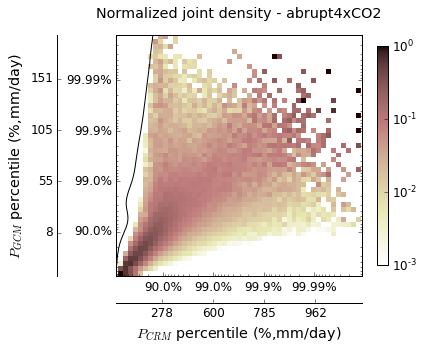

In [98]:
from scipy.interpolate import interp1d

## Free parameters
pr_id_1 = "CRM_PREC_I50"
pr_id_2 = "PRECT"

compset = compset_SPCAM
experiment = experiment_4xCO2
subset = subset_all

## Fixed parameters
df_q = df_quantile[compset][experiment][subset]
Q_IL = df_q['Q_IL']
df_dens = df_density2D[compset][experiment][subset]

##-- Compute 2D density
H = np.array(df_dens[pr_id_1][pr_id_2].T)

##-- Normalize 2D density
# weights = np.diag(np.array(df_dens[pr_id_1][pr_id_1].T))
# H_norm = normalizeJointDensity(H,weights)
H_norm = normalizeJointDensity2(H)

##-- Start plot --##
fig = plt.figure(figsize=(5.5,4.5))
ax = fig.add_subplot(111)

##-- ticks on logarithmic scale
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
im = ax.matshow(H_norm, cmap=plt.cm.pink_r,extent=[x[0], x[-1], x[0], x[-1]],origin='lower',
                norm=LogNorm(vmin=1e-3, vmax=1))

## Compute 1 by 1 intensity line
pr_q_gcm = df_quantile[compset][experiment][subset][pr_id_2]
pr_q_crm = df_quantile[compset][experiment][subset][pr_id_1]
pr_q_gcm_range = pr_q_gcm[1:].min(),pr_q_gcm.max()
# define linear pr scale
pr_coord = np.arange(pr_q_gcm_range[0],pr_q_gcm_range[1])
# find equivalent q's on pr_gcm and pr_crm
Q_IL_gcm = interp1d(pr_q_gcm,Q_IL,kind='cubic')(pr_coord)
Q_IL_crm = interp1d(pr_q_crm,Q_IL,kind='cubic')(pr_coord)
# Q_IL_crm_2 = interp1d(pr_q_crm,Q_IL,kind='cubic')(2*pr_coord)
# Q_IL_crm_3 = interp1d(pr_q_crm,Q_IL,kind='cubic')(3*pr_coord)
# Q_IL_crm_7 = interp1d(pr_q_crm,Q_IL,kind='cubic')(7*pr_coord)
# convert to x coordinate
# x_gcm = 1./np.subtract(np.ones(Q_IL_gcm.size),Q_IL_gcm/100.)
x_gcm = 1./np.subtract(np.ones(Q_IL_gcm.size),Q_IL_gcm/100.)
# x_crm = 1./np.subtract(np.ones(Q_IL_crm.size),Q_IL_crm/100.)
x_crm = 1./np.subtract(np.ones(Q_IL_crm.size),Q_IL_crm/100.)
# x_crm_2 = 1./np.subtract(np.ones(Q_IL_crm_2.size),Q_IL_crm_2/100.)
# x_crm_3 = 1./np.subtract(np.ones(Q_IL_crm_3.size),Q_IL_crm_3/100.)
# x_crm_7 = 1./np.subtract(np.ones(Q_IL_crm_3.size),Q_IL_crm_7/100.)

plt.colorbar(im,shrink=0.91)
plt.xscale('log')
plt.yscale('log')

## Define secondary axes
ax_newx = ax.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))
ax_newx.set_xlim(0.02,0.98)
ax_newy = ax_newx.twinx()
ax_newy.yaxis.set_ticks_position('left')
ax_newy.spines['left'].set_position(('axes', -0.24))
ax_newy.set_ylim(0.03,0.97)
## Tertiary axes
ax1 = ax.twiny()
ax1.set_axis_off()
ax2 = ax1.twinx()
ax2.set_axis_off()

## Plot 1 by 1 intensity line
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(x_crm,x_gcm,c='k')
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xlim(reversed(ax.get_xlim()))
ax2.set_ylim(reversed(ax.get_ylim()))

## Replace labels on primary axes
labels_x_q = [item.get_text() for item in ax.get_xticklabels()]
labels_y_q = [item.get_text() for item in ax.get_yticklabels()]
n = ceil(log10(x.max()))
N = len(labels_x_q)
for i in range(1,N):
    labels_x_q[i] = "%s%%"%str(100*(1-10**(-n+i-1)))
    labels_y_q[i] = "%s%%"%str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels_x_q)
ax.set_yticklabels(labels_y_q)


## Replace labels on secondary axes
labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
pr_q_x = df_quantile[compset][experiment][subset][pr_id_1]
pr_q_y = df_quantile[compset][experiment][subset][pr_id_2]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j < len(Q_IL) and j >= 0:
        labels_x[i-1] = "%.f"%pr_q_x[j].round(0)
        labels_y[i-1] = "%.f"%pr_q_y[j].round(0)
#     else:
#         labels_x[i-1] = ''
#         labels_y[i-1] = ''
ax_newx.set_xticklabels(labels_x)
ax_newy.set_yticklabels(labels_y)

ax.xaxis.tick_bottom()
ax_newx.xaxis.tick_bottom()
# ax.set_xlabel(r"%s"%pr_labels_veryshort[pr_id_1],fontsize='xx-large')
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')
# ax.set_ylabel(r"%s "%pr_labels_veryshort[pr_id_2],fontsize='xx-large')
ax_newy.yaxis.set_label_position('left')
ax_newy.set_ylabel(r"$P_{GCM}$ percentile (%,mm/day)",fontsize='x-large')
ax.set_title(r"Normalized joint density - %s"%experiment)

plt.savefig(os.path.join(figdir,"fig_jointDensity_%s_%s_%s_%s_%s.pdf"%(pr_id_1,pr_id_2,compset,experiment,subset)),
            bbox_inches='tight')
plt.show()

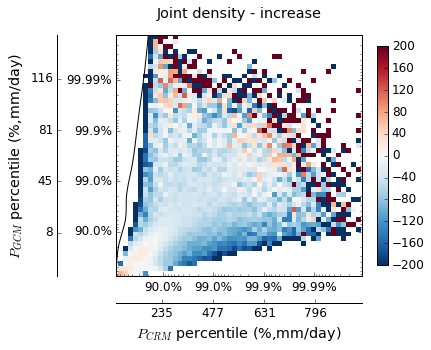

In [48]:
from scipy.interpolate import interp1d

## Free parameters
pr_id_1 = "CRM_PREC_I50"
pr_id_2 = "PRECT"

compset = compset_SPCAM
subset = subset_all

## Fixed parameters
df_q = df_quantile[compset][experiment_PI][subset]
Q_IL = df_q['Q_IL']
df_dens_PI = df_density2D[compset][experiment_PI][subset]
df_dens_4xCO2 = df_density2D[compset][experiment_4xCO2][subset]

##-- Compute 2D density
H_PI = np.array(df_dens_PI[pr_id_1][pr_id_2].T)
H_4xCO2 = np.array(df_dens_4xCO2[pr_id_1][pr_id_2].T)
H=np.divide(H_4xCO2-H_PI,0.5*(H_PI+H_4xCO2))*100
# H=H_4xCO2-H_PI
H_pos = H.copy(); H_pos[H<0] = np.nan
H_neg = H.copy(); H_neg[H>0] = np.nan
# H=np.divide(H_4xCO2-H_PI,H_4xCO2)*100

##-- Normalize 2D density
# weights = np.diag(H_PI+H_4xCO2)
# H_norm = normalizeJointDensity(H,weights)
# H_norm = normalizeJointDensity2(H)

##-- Start plot --##
fig = plt.figure(figsize=(5.5,4.5))
ax = fig.add_subplot(111)

##-- ticks on logarithmic scale
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
# im = ax.matshow(H_norm, cmap=plt.cm.pink_r,extent=[x[0], x[-1], x[0], x[-1]],origin='lower',
#                 norm=LogNorm(vmin=1e-3, vmax=1))
# im = ax.matshow(-H_norm, cmap=plt.cm.Blues,extent=[x[0], x[-1], x[0], x[-1]],origin='lower',
#                 norm=LogNorm(vmin=1e-3, vmax=1))
# im = ax.matshow(H, cmap=plt.cm.pink_r,extent=[x[0], x[-1], x[0], x[-1]],origin='lower',
#                norm=LogNorm(vmin=1e-3, vmax=1))
im = ax.matshow(H, cmap=plt.cm.RdBu_r,extent=[x[0], x[-1], x[0], x[-1]],origin='lower')



## Compute 1 by 1 intensity line
pr_q_gcm = df_quantile[compset][experiment][subset][pr_id_2]
pr_q_crm = df_quantile[compset][experiment][subset][pr_id_1]
pr_q_gcm_range = pr_q_gcm[1:].min(),pr_q_gcm.max()
# define linear pr scale
pr_coord = np.arange(pr_q_gcm_range[0],pr_q_gcm_range[1])
# find equivalent q's on pr_gcm and pr_crm
Q_IL_gcm = interp1d(pr_q_gcm,Q_IL,kind='cubic')(pr_coord)
Q_IL_crm = interp1d(pr_q_crm,Q_IL,kind='cubic')(pr_coord)
# Q_IL_crm_2 = interp1d(pr_q_crm,Q_IL,kind='cubic')(2*pr_coord)
# Q_IL_crm_3 = interp1d(pr_q_crm,Q_IL,kind='cubic')(3*pr_coord)
# Q_IL_crm_7 = interp1d(pr_q_crm,Q_IL,kind='cubic')(7*pr_coord)
# convert to x coordinate
# x_gcm = 1./np.subtract(np.ones(Q_IL_gcm.size),Q_IL_gcm/100.)
x_gcm = 1./np.subtract(np.ones(Q_IL_gcm.size),Q_IL_gcm/100.)
# x_crm = 1./np.subtract(np.ones(Q_IL_crm.size),Q_IL_crm/100.)
x_crm = 1./np.subtract(np.ones(Q_IL_crm.size),Q_IL_crm/100.)
# x_crm_2 = 1./np.subtract(np.ones(Q_IL_crm_2.size),Q_IL_crm_2/100.)
# x_crm_3 = 1./np.subtract(np.ones(Q_IL_crm_3.size),Q_IL_crm_3/100.)
# x_crm_7 = 1./np.subtract(np.ones(Q_IL_crm_3.size),Q_IL_crm_7/100.)

plt.colorbar(im,shrink=0.91)
plt.xscale('log')
plt.yscale('log')

## Define secondary axes
ax_newx = ax.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))
ax_newx.set_xlim(0.02,0.98)
ax_newy = ax_newx.twinx()
ax_newy.yaxis.set_ticks_position('left')
ax_newy.spines['left'].set_position(('axes', -0.24))
ax_newy.set_ylim(0.03,0.97)
## Tertiary axes
ax1 = ax.twiny()
ax1.set_axis_off()
ax2 = ax1.twinx()
ax2.set_axis_off()

## Plot 1 by 1 intensity line
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(x_crm,x_gcm,c='k')
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xlim(reversed(ax.get_xlim()))
ax2.set_ylim(reversed(ax.get_ylim()))

## Replace labels on primary axes
labels_x_q = [item.get_text() for item in ax.get_xticklabels()]
labels_y_q = [item.get_text() for item in ax.get_yticklabels()]
n = ceil(log10(x.max()))
N = len(labels_x_q)
for i in range(1,N):
    labels_x_q[i] = "%s%%"%str(100*(1-10**(-n+i-1)))
    labels_y_q[i] = "%s%%"%str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax.set_xticklabels(labels_x_q)
ax.set_yticklabels(labels_y_q)


## Replace labels on secondary axes
labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
pr_q_x = df_quantile[compset][experiment][subset][pr_id_1]
pr_q_y = df_quantile[compset][experiment][subset][pr_id_2]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j < len(Q_IL) and j >= 0:
        labels_x[i-1] = "%.f"%pr_q_x[j].round(0)
        labels_y[i-1] = "%.f"%pr_q_y[j].round(0)
#     else:
#         labels_x[i-1] = ''
#         labels_y[i-1] = ''
ax_newx.set_xticklabels(labels_x)
ax_newy.set_yticklabels(labels_y)

ax.xaxis.tick_bottom()
ax_newx.xaxis.tick_bottom()
# ax.set_xlabel(r"%s"%pr_labels_veryshort[pr_id_1],fontsize='xx-large')
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')
# ax.set_ylabel(r"%s "%pr_labels_veryshort[pr_id_2],fontsize='xx-large')
ax_newy.yaxis.set_label_position('left')
ax_newy.set_ylabel(r"$P_{GCM}$ percentile (%,mm/day)",fontsize='x-large')
ax.set_title(r"Joint density - increase")

plt.savefig(os.path.join(figdir,"fig_jointDensity_%s_%s_%s_%s_%s.pdf"%(pr_id_1,pr_id_2,compset,experiment,subset)),
            bbox_inches='tight')
plt.show()

## Vertical profiles

### Compare SPCAM and CAM5 for extreme PRECT

Plot abrupt4xCO2 and piControl profiles with two linestyles, SPCAM and CAM5 with two colors.
Can then vary the subset (tropics, ocean) and the percentile (96.84,99.0,...,99.99) --> 2x6 separate figures.

Two plots: measured profiles (6 subpots) and scaling (3 subplots: thermo, dyn, total)

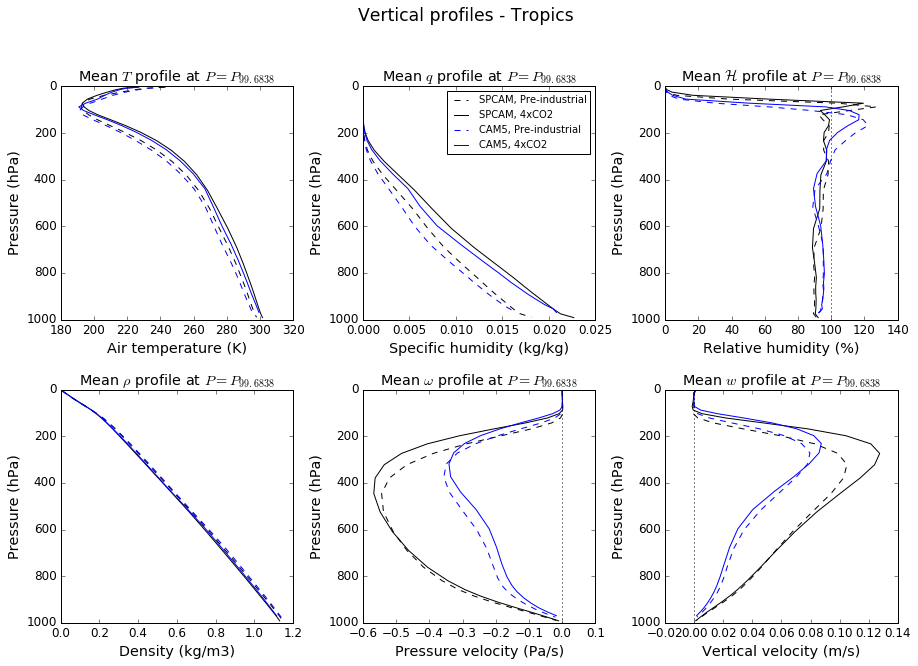

In [34]:
###--- Plot T, Q, RELHUM, rho, omega, w ---###

## Free parameters
Q = 99.6838
Q_id = str(Q)
subset = subset_all

## Fixed parameters
pr_id = "PRECT"
varids = ps_id, t_id, q_id, relhum_id, omega_id, w_id = varids_for_profiles[pr_id]


## Figure labels and titles
xlabs = (r"Air temperature (K)",r"Specific humidity (kg/kg)",r"Relative humidity (%)",
    r"Density (kg/m3)",r"Pressure velocity (Pa/s)",r"Vertical velocity (m/s)")
tlabs = (r"Mean $T$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $q$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $\mathcal{H}$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $\rho$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $\omega$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $w$ profile at $P=P_{%s}$"%(Q_id))

## Start plotting
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
fig.suptitle('Vertical profiles - %s'%subset_labels[subset],fontsize='xx-large')


for compset in compsets:
    for experiment in experiments:

        ## Get dataframes
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]

        ## Get vertical profiles (compute missing ones)
        profiles = getAllProfiles(varids,pr_id,Q_id,df_m,df_p,computeP)

        ## Plot
        for (ax,i) in zip(axs.ravel(),range(1,7)):
            ax.plot(profiles[i],profiles[0]/100.,c=col[compset],linestyle=lt[experiment],
                    label="%s, %s"%(compset_labels[compset],exp_labels[experiment]))
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")
            if i == 2:
                ax.legend(loc='upper right')

for (ax,i) in zip(axs.ravel(),range(1,7)):
    ax.invert_yaxis()
    if i == 3:
        ax.axvline(x=100,c='k',linestyle=':')
    elif i in (5,6):
        ax.axvline(x=0,c='k',linestyle=':')
    
plt.show()

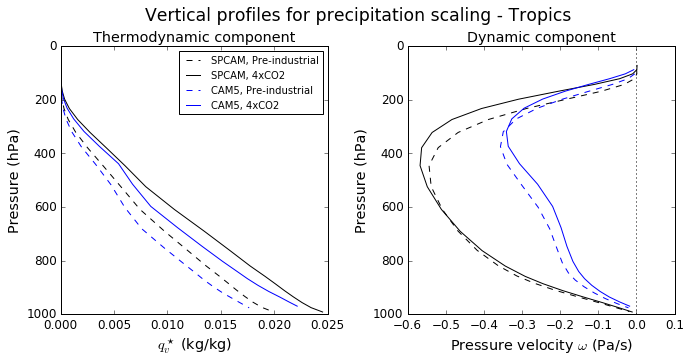

In [39]:
## Free parameters
Q = 99.6838
Q_id = str(Q)
subset = subset_all

## Fixed parameters
pr_id = "PRECT"
varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
    
## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"Pressure velocity $\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11,5))
fig.suptitle('Vertical profiles for precipitation scaling - %s'%subset_labels[subset],fontsize='xx-large')

for compset in compsets:
    for experiment in experiments:
        
        ## Get dataframes
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]
    
        ## Get vertical profiles (compute missing ones)
        profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)

        profiles_to_plot = pres_sc,qvs_sc,omega_sc
        
        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,3)):
            ax.plot(profiles_to_plot[i],profiles_to_plot[0]/100.,c=col[compset],linestyle=lt[experiment],
                    label="%s, %s"%(compset_labels[compset],exp_labels[experiment]))
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")
            if i == 1:
                ax.legend(loc='upper right')

for (ax,i) in zip(axs.ravel(),range(1,3)):
    ax.invert_yaxis()
    if i == 2:
        ax.axvline(x=0,c='k',linestyle=':')

plt.savefig(os.path.join(figdir,"fig_scalingProfiles_SPCAMvsCAM5_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')
plt.show()

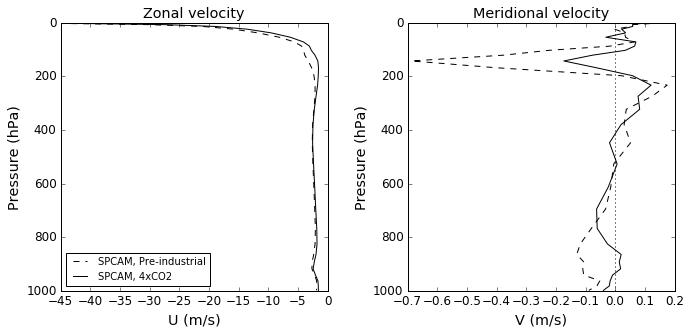

In [58]:
###--- Plot T, Q, RELHUM, rho, omega, w ---###

## Free parameters
Q = 99.6838
Q_id = str(Q)
subset = subset_all
# subset = subset_mf
compset = compset_SPCAM

## Fixed parameters
pr_id = "CRM_PREC_I50"
varids = ['U','V']


## Figure labels and titles
xlabs = (r"U (m/s)",r"V (m/s)")
tlabs = (r"Zonal velocity",r"Meridional velocity")

## Start plotting
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11,5))
# fig.suptitle('Vertical profiles - %s'%subset_labels[subset],fontsize='xx-large')


for experiment in experiments:

    ## Get dataframes
    df_m = df_meanAtQ[compset][experiment][subset]
    df_p = df_meanProfileAtQ[compset][experiment][subset]

    ## Get vertical profiles (compute missing ones)
    # Get pressure coordinate
    pres_s = df_m[ps_id][pr_id][Q_id][0]
    pres = computeP(pres_s)    
    profiles = [pres]
    # Get the other variables
    for varid in varids:
        profiles.append(df_p[varid][pr_id][Q_id])

    ## Plot
    for (ax,i) in zip(axs.ravel(),range(1,len(varids)+1)):
        ax.plot(profiles[i],profiles[0]/100.,c=col[compset],linestyle=lt[experiment],
                label="%s, %s"%(compset_labels[compset],exp_labels[experiment]))
        ax.set_ylim(0,1000)
        ax.set_title(tlabs[i-1])
        ax.set_xlabel(xlabs[i-1])
        ax.set_ylabel("Pressure (hPa)")
        if i == 1:
            ax.legend(loc='lower left')


for (ax,i) in zip(axs.ravel(),range(1,len(varids)+1)):
    ax.invert_yaxis()
    ax.axvline(x=0,c='k',linestyle=':')
    
plt.show()

### Compare reference precipitation variables for SPCAM

Use colorscale for pr variables, line style for experiment.
Can then vary the subset (tropics, ocean) and the percentile (96.84,99.0,...,99.99) --> 2x6 separate figures.

Two plots: measured profiles (6 subpots) and scaling (3 subplots: thermo, dyn, total)


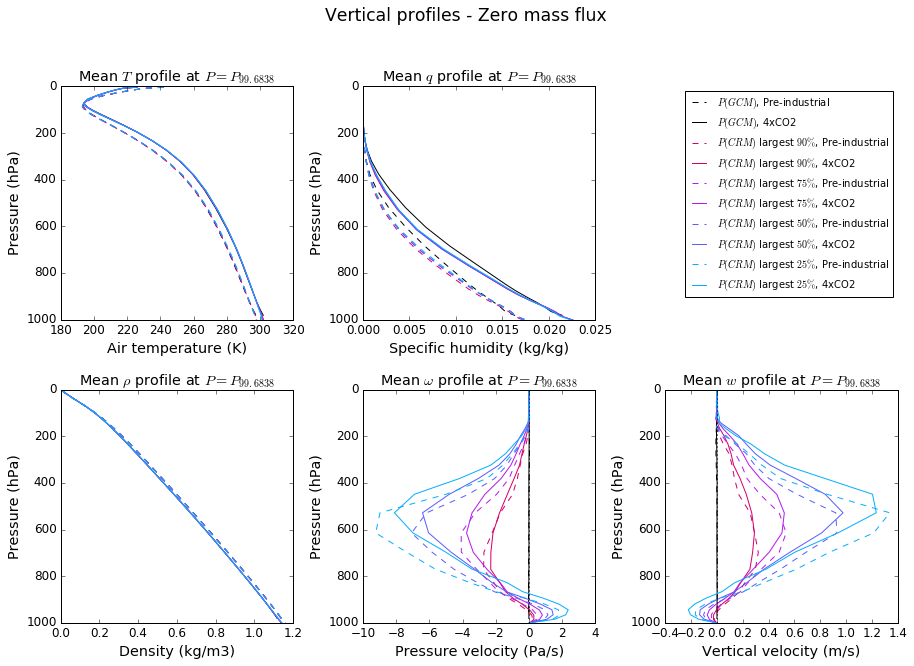

In [61]:
###--- Plot T, Q, RELHUM, rho, omega, w ---###

##-- Use these variables if the reference precip variable is PRECT
##-- Use CRM_T_IXX, CRM_QC_IXX, RELHUM, CRM_rho(to compute),
##--  CRM_OMEGA_IXX (to compute) and CRM_W_IXX if ref precip variable is CRM_PREC_IXX

## Free parameters
Q = 99.6838
Q_id = str(Q)
# subset = subset_all
subset = subset_mf

## Fixed parameters
compset = compset_SPCAM

## Figure labels and titles
xlabs = (r"Air temperature (K)",r"Specific humidity (kg/kg)",r"Relative humidity (%)",
    r"Density (kg/m3)",r"Pressure velocity (Pa/s)",r"Vertical velocity (m/s)")
tlabs = (r"Mean $T$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $q$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $\mathcal{H}$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $\rho$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $\omega$ profile at $P=P_{%s}$"%(Q_id),
    r"Mean $w$ profile at $P=P_{%s}$"%(Q_id))

## Start plotting
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
fig.suptitle('Vertical profiles - %s'%subset_labels[subset],fontsize='xx-large')

for pr_id in pr_ids[:-1]:
    
    varids = ps_id, t_id, q_id, relhum_id, omega_id, w_id = varids_for_profiles[pr_id]
    
    for experiment in experiments:

        ## Get dataframes
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]

        ## Get vertical profiles (compute missing ones)
        profiles = getAllProfiles(varids,pr_id,Q_id,df_m,df_p,computeP)

        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,7)):
            if i == 3:
                ax.axis('off')
                continue
            lab = "%s, %s"%(pr_labels[pr_id],exp_labels[experiment])
            ax.plot(profiles[i],profiles[0]/100.,c=col[pr_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")

for (ax,i) in zip(axs.ravel(),range(1,7)):
    ax.invert_yaxis()
    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
    elif i == 3:
        ax.legend(handles,labels)
    elif i in (5,6):
        ax.axvline(x=0,c='k',linestyle=':')
    
plt.show()

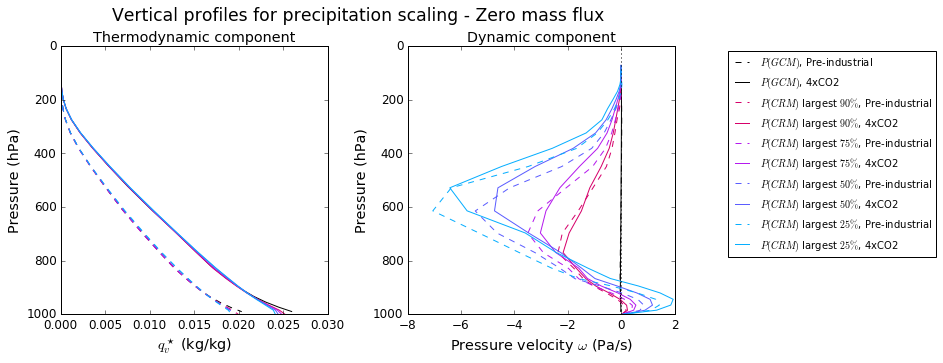

In [62]:
## Free parameters
# Q = 99.6838
# Q = 98.0047
Q = 98.4151
Q_id = str(Q)
# subset = subset_all
subset = subset_mf

## Fixed parameters
compset = compset_SPCAM
    
## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"Pressure velocity $\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11,5))
fig.suptitle('Vertical profiles for precipitation scaling - %s'%subset_labels[subset],fontsize='xx-large')

for pr_id in pr_ids[:-1]:
    
    varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
    
    for experiment in experiments:
        
        ## Get dataframes
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]
    
        ## Get vertical profiles (compute missing ones)
        profiles = pres_sc,qvs_sc,omega_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)

        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,3)):
            lab = "%s, %s"%(pr_labels[pr_id],exp_labels[experiment])
            ax.plot(profiles[i],profiles[0]/100.,c=col[pr_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")
            if i == 2:
                ax.legend(bbox_to_anchor=(2, 1),loc='upper right')

for (ax,i) in zip(axs.ravel(),range(1,3)):
    ax.invert_yaxis()
    if i == 2:
        ax.axvline(x=0,c='k',linestyle=':')
#         ax.set_xlim(-4,1)
        
plt.show()

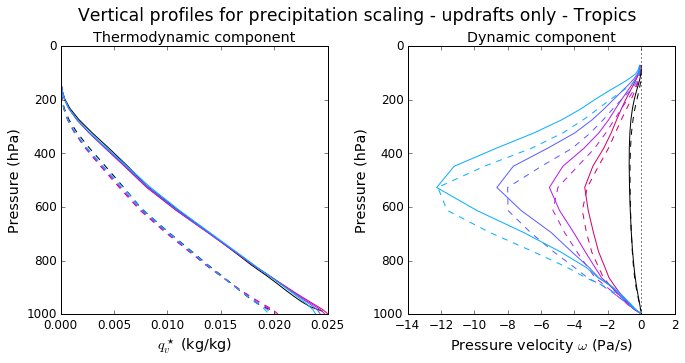

In [127]:
## Free parameters
Q = 99.9
# Q = 99.6838
# Q = 98.0047
# Q = 98.4151
Q_id = str(Q)
subset = subset_all
# subset = subset_mf

## Fixed parameters
compset = compset_SPCAM
    
## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"Pressure velocity $\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(11,5))
fig.suptitle('Vertical profiles for precipitation scaling - updrafts only - %s'%subset_labels[subset],fontsize='xx-large')

for pr_id in pr_ids[:-1]:
    
    varids = ps_id, t_id, omega_id, wup_id = varids_for_scaling_updrafts[pr_id]
    
    for experiment in experiments:
        
        ## Get dataframes
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]
    
        ## Get vertical profiles (compute missing ones)
        profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)

        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(2)):
            lab = "%s, %s"%(pr_labels[pr_id],exp_labels[experiment])
            ax.plot(profiles[i+2],profiles[0]/100.,c=col[pr_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i])
            ax.set_xlabel(xlabs[i])
            ax.set_ylabel("Pressure (hPa)")
            if i == 2:
                ax.legend(bbox_to_anchor=(2, 1),loc='upper right')

for (ax,i) in zip(axs.ravel(),range(1,3)):
    ax.invert_yaxis()
    if i == 2:
        ax.axvline(x=0,c='k',linestyle=':')
#         ax.set_xlim(-4,1)
        
plt.show()


### Compare percentiles for SPCAM

#### All profiles

Use colorscale for percentiles, line style for experiment.
Can then vary the subset (tropics, ocean) and the pr_id (PRECT,CRM_PREC_IXX) --> 2x6 separate figures.

Two plots: measured profiles (6 subpots) and scaling (3 subplots: thermo, dyn, total)

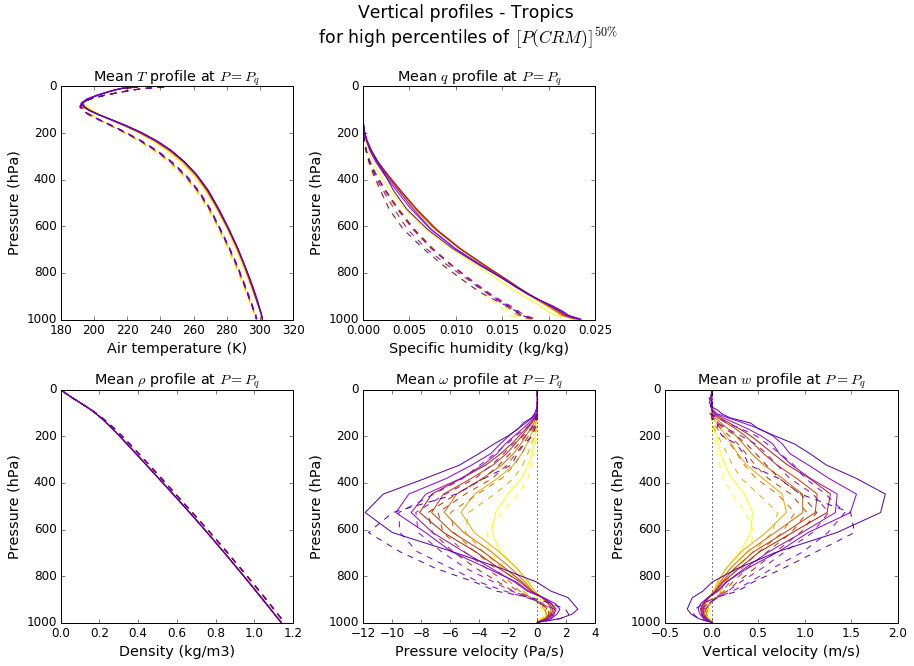

In [109]:
###--- Plot T, Q, , CRM_rho, CRM_omega, CRM_W ---###

## Free parameters

pr_id = pr_ids[3]
subset = subset_all
# subset = subset_mf

## Fixed parameters
compset = compset_SPCAM
varids = ps_id, t_id, q_id, relhum_id, omega_id, w_id = varids_for_profiles[pr_id]

## Figure labels and titles
xlabs = (r"Air temperature (K)",r"Specific humidity (kg/kg)",r"Relative humidity (%)",
    r"Density (kg/m3)",r"Pressure velocity (Pa/s)",r"Vertical velocity (m/s)")
tlabs = (r"Mean $T$ profile at $P=P_{q}$",
    r"Mean $q$ profile at $P=P_{q}$",
    r"Mean $\mathcal{H}$ profile at $P=P_{q}$",
    r"Mean $\rho$ profile at $P=P_{q}$",
    r"Mean $\omega$ profile at $P=P_{q}$",
    r"Mean $w$ profile at $P=P_{q}$")

## Start plotting
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
fig.suptitle('Vertical profiles - %s\n for high percentiles of %s'%(subset_labels[subset],pr_labels_short[pr_id]),
             fontsize='xx-large')

for Q in Qs:
        
    Q_id = str(Q)
    
    for experiment in experiments:

        ## Get dataframes
        df_q = df_quantile[compset][experiment][subset]
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]

        if Q > df_q['Q_IL'].max():
#             print "Pass",Q
            continue
        
        ## Get vertical profiles (compute missing ones)
        profiles = getAllProfiles(varids,pr_id,Q_id,df_m,df_p,computeP)

        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,7)):
            if i == 3:
                ax.axis('off')
                continue
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(profiles[i],profiles[0]/100.,c=col[Q_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")

for (ax,i) in zip(axs.ravel(),range(1,7)):
    ax.invert_yaxis()
    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
#     elif i == 3:
#         ax.legend(handles,labels)
    elif i in (5,6):
        ax.axvline(x=0,c='k',linestyle=':')
    
plt.show()

#### Thermodynamic and dynamic contributions

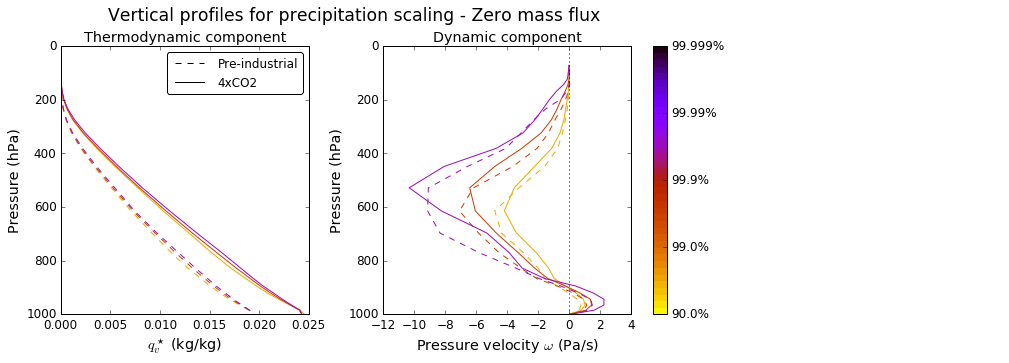

In [41]:
## Free parameters

revLegend = False
if revLegend:
    lt['abrupt4xCO2'] = '--'
    lt['piControl'] = '-'
else:
    lt['abrupt4xCO2'] = '-'
    lt['piControl'] = '--'

# pr_id = pr_ids[2]
# pr_id = "PRECT"
pr_id = "CRM_PREC_I50"
# subset = subset_all
subset = subset_mf

## Fixed parameters
compset = compset_SPCAM
varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]

## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"Pressure velocity $\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,5))
fig.suptitle('Vertical profiles for precipitation scaling - %s'%subset_labels[subset],fontsize='xx-large',x=0.38)
# fig.suptitle('Vertical profiles for precipitation scaling - %s\n for high percentiles of %s'%\
#              (subset_labels[subset],pr_labels_short[pr_id]),fontsize='xx-large')

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = axs[2].contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext)),cmap=cmap)
box = axs[2].get_position()
axs[2].set_position([box.x0*1.05, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 0.37, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext[i] for i in Q_ind])
axs[2].axes.clear()
axs[2].axis('off')


# for Q in (Qs[1],Qs[3],Qs[5],Qs[7]):
for Q in (Qs[1],Qs[3],Qs[5]):
        
    Q_id = str(Q)
    
    for experiment in experiments:

        ## Get dataframes
        df_q = df_quantile[compset][experiment][subset]
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]
    
        if Q > df_q['Q_IL'].max():
            continue
    
        ## Get vertical profiles (compute missing ones)
        profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)
        profiles_to_plot = pres_sc,qvs_sc,omega_sc
        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,3)):
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(profiles_to_plot[i],profiles_to_plot[0]/100.,c=col[Q_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")
#             if i == 2:
#                 ax.legend(bbox_to_anchor=(2, 1),loc='upper right')

for (ax,i) in zip(axs.ravel(),range(1,3)):
    ax.invert_yaxis()
    if i == 2:
        ax.axvline(x=0,c='k',linestyle=':')
#         ax.set_xlim(-4,1)

axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="4xCO2",c='k',linestyle=lt[experiments[1]])
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[-2:],labels[-2:],loc="upper right",fancybox=True, framealpha=1,handlelength=3,fontsize=12)

if revLegend:
    plt.savefig(os.path.join(figdir,"fig_revLegend_scalingContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
        bbox_inches='tight')
else:
    plt.savefig(os.path.join(figdir,"fig_scalingContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
        bbox_inches='tight')
plt.show()

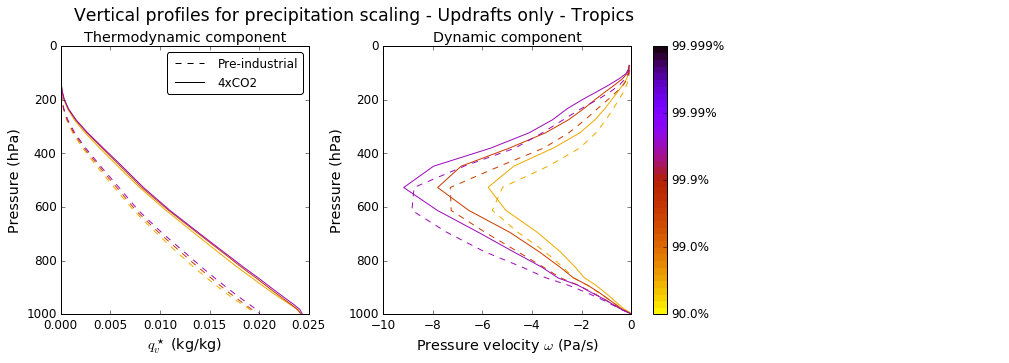

In [94]:
## Free parameters

revLegend = False
if revLegend:
    lt['abrupt4xCO2'] = '--'
    lt['piControl'] = '-'
else:
    lt['abrupt4xCO2'] = '-'
    lt['piControl'] = '--'

# pr_id = pr_ids[2]
# pr_id = "PRECT"
pr_id = "CRM_PREC_I50"
subset = subset_all
# subset = subset_mf

## Fixed parameters
compset = compset_SPCAM
varids = ps_id, t_id, omega_id, w_id = varids_for_scaling_updrafts[pr_id]

## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"Pressure velocity $\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,5))
fig.suptitle('Vertical profiles for precipitation scaling - Updrafts only - %s'%subset_labels[subset],fontsize='xx-large',x=0.38)
# fig.suptitle('Vertical profiles for precipitation scaling - %s\n for high percentiles of %s'%\
#              (subset_labels[subset],pr_labels_short[pr_id]),fontsize='xx-large')

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = axs[2].contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext)),cmap=cmap)
box = axs[2].get_position()
axs[2].set_position([box.x0*1.05, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 0.37, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext[i] for i in Q_ind])
axs[2].axes.clear()
axs[2].axis('off')


# for Q in (Qs[1],Qs[3],Qs[5],Qs[7]):
for Q in (Qs[1],Qs[3],Qs[5]):
        
    Q_id = str(Q)
    
    for experiment in experiments:

        ## Get dataframes
        df_q = df_quantile[compset][experiment][subset]
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]
    
        if Q > df_q['Q_IL'].max():
            continue
    
        ## Get vertical profiles (compute missing ones)
        profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)
        profiles_to_plot = pres_sc,qvs_sc,omega_sc
        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,3)):
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(profiles_to_plot[i],profiles_to_plot[0]/100.,c=col[Q_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")
#             if i == 2:
#                 ax.legend(bbox_to_anchor=(2, 1),loc='upper right')

for (ax,i) in zip(axs.ravel(),range(1,3)):
    ax.invert_yaxis()
    if i == 2:
        ax.axvline(x=0,c='k',linestyle=':')
#         ax.set_xlim(-4,1)

axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="4xCO2",c='k',linestyle=lt[experiments[1]])
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[-2:],labels[-2:],loc="upper right",fancybox=True, framealpha=1,handlelength=3,fontsize=12)

if revLegend:
    plt.savefig(os.path.join(figdir,"fig_revLegend_scalingContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
        bbox_inches='tight')
else:
    plt.savefig(os.path.join(figdir,"fig_scalingContributions_%s_%s_%s.pdf"%(pr_id,compset,subset)),
        bbox_inches='tight')
plt.show()


For paper: plot large-scale and convective-scale contribution profiles 

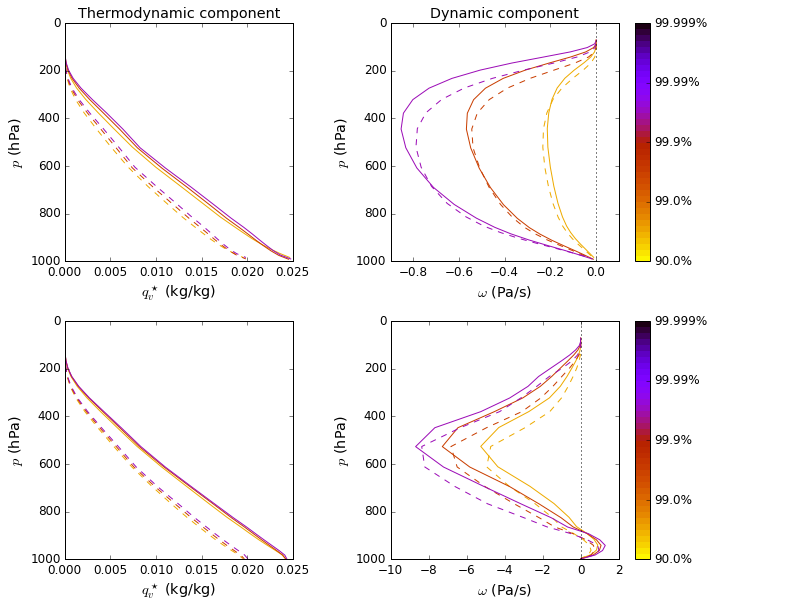

In [43]:
## Free parameters

pr_ids = ("PRECT","CRM_PREC_I50")
subset = subset_all

## Fixed parameters
compset = compset_SPCAM

## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"$\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig = plt.figure(figsize=(21,10))
gs = gridspec.GridSpec(2,3,width_ratios=[5,5,0.7,5,5,0.7])
axtop = (plt.subplot(gs[0]),plt.subplot(gs[1]))
axbottom = (plt.subplot(gs[3]),plt.subplot(gs[4]))
axrows = dict(zip(pr_ids,(axtop,axbottom)))
gs.update(hspace=0.25)
# gs.tight_layout(fig,rect=[0.5,0,1,1],h_pad=0.5)
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,5))
# fig.suptitle('Vertical profiles for precipitation scaling - %s'%subset_labels[subset],fontsize='xx-large',x=0.38)



for pr_id in pr_ids:
    
    varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
    axs = axrows[pr_id]
    
    for Q in (Qs[1],Qs[3],Qs[5]):

        Q_id = str(Q)

        for experiment in experiments:

            ## Get dataframes
            df_q = df_quantile[compset][experiment][subset]
            df_m = df_meanAtQ[compset][experiment][subset]
            df_p = df_meanProfileAtQ[compset][experiment][subset]

            if Q > df_q['Q_IL'].max():
                continue

            ## Get vertical profiles (compute missing ones)
            profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)
            profiles_to_plot = pres_sc,qvs_sc,omega_sc
            
            ## Now plot
            for (ax,i) in zip(axs,range(1,3)):
                lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
                ax.plot(profiles_to_plot[i],profiles_to_plot[0]/100.,c=col[Q_id],linestyle=lt[experiment],
                        label=lab)
                ax.set_ylim(0,1000)
                ax.set_xlabel(xlabs[i-1])
                ax.set_ylabel(r"$p$ (hPa)")
                if pr_id == pr_ids[0]:
                    ax.set_title(tlabs[i-1])
    #                 ax.legend(bbox_to_anchor=(2, 1),loc='upper right')

    for (ax,i) in zip(axs,range(1,3)):
        ax.invert_yaxis()
        if i == 2:
            ax.axvline(x=0,c='k',linestyle=':')


# ###---- Side colorbar

ax2 = plt.subplot(gs[2])
ax5 = plt.subplot(gs[5])
Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
for ax in (ax2,ax5):
    cs = ax.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext)),cmap=cmap)
    box = ax.get_position()
    ax.set_position([box.x0*1.05, box.y0, box.width, box.height])
    axColor = plt.axes([box.x0*1.05 - box.width * 3.87, box.y0, 0.01, box.height])
    cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
    Q_ind = range(0,len(Q_IL_ext),10)
    cb.set_ticks(Q_ind)
    cb.set_ticklabels(["%s%%"%Q_IL_ext[i] for i in Q_ind])
    ax.axes.clear()
    ax.axis('off')


# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="4xCO2",c='k',linestyle=lt[experiments[1]])
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles[-2:],labels[-2:],loc="upper right",fancybox=True, framealpha=1,handlelength=3,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_scalingContributions_%s_%s_%s.pdf"%(string.join(pr_ids,'_'),compset,subset)),
        bbox_inches='tight')
plt.show()

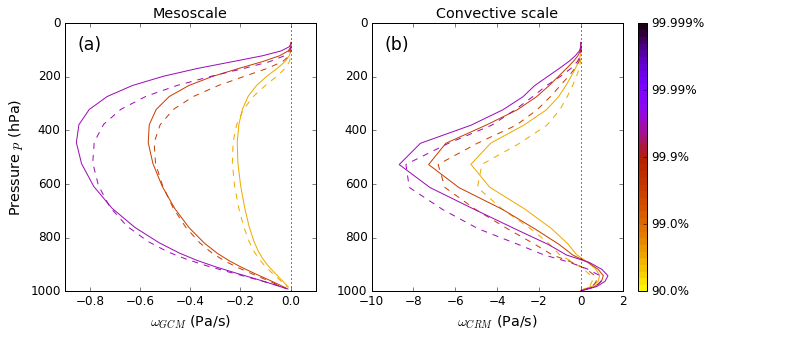

In [35]:
## Free parameters

pr_ids = ("PRECT","CRM_PREC_I50")
subset = subset_all

## Fixed parameters
compset = compset_SPCAM

## Figure labels and titles
xlabs = (r"$\omega_{GCM}$ (Pa/s)",r"$\omega_{CRM}$ (Pa/s)")
tlabs = (r"Mesoscale",r"Convective scale")
subplotlabs = ("(a)","(b)")
## Start plotting
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(1,3,width_ratios=[4.5,4.5,1])
axs = (plt.subplot(gs[0]),plt.subplot(gs[1]))
# gs.tight_layout(fig,rect=[0.5,0,1,1],h_pad=0.5)
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,5))
# fig.suptitle('Vertical profiles for precipitation scaling - %s'%subset_labels[subset],fontsize='xx-large',x=0.38)


for pr_id,ax,i in zip(pr_ids,axs,range(1,3)):
    
    varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
    
    for Q in (Qs[1],Qs[3],Qs[5]):

        Q_id = str(Q)

        for experiment in experiments:

            ## Get dataframes
            df_q = df_quantile[compset][experiment][subset]
            df_m = df_meanAtQ[compset][experiment][subset]
            df_p = df_meanProfileAtQ[compset][experiment][subset]

            if Q > df_q['Q_IL'].max():
                continue

            ## Get vertical profiles (compute missing ones)
            profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)
            
            ## Now plot
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(omega_sc,pres_sc/100.,c=col[Q_id],linestyle=lt[experiment],
                        label=lab)

    ax.set_title(tlabs[i-1])
    ax.set_ylim(0,1000)
    ax.set_xlabel(xlabs[i-1])
    ax.invert_yaxis()
    ax.axvline(x=0,c='k',linestyle=':')
    # subplot label
    trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transAxes)
    ax.text(0.05,0.9,subplotlabs[i-1],fontsize='xx-large',transform=trans)

axs[0].set_ylabel(r"Pressure $p$ (hPa)")

# ###---- Side colorbar

ax2 = plt.subplot(gs[2])
Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax2.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext)),cmap=cmap)
box = ax2.get_position()
ax2.set_position([box.x0*1.05, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 1.37, box.y0, 0.01, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
Q_ind = range(0,len(Q_IL_ext),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext[i] for i in Q_ind])
ax2.axes.clear()
ax2.axis('off')


# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="4xCO2",c='k',linestyle=lt[experiments[1]])
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles[-2:],labels[-2:],loc="upper right",fancybox=True, framealpha=1,handlelength=3,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_dynamicContributions_%s_%s_%s.pdf"%(string.join(pr_ids,'_'),compset,subset)),
        bbox_inches='tight')
plt.show()

#### All profiles with large-scale omega at locations of convective-scale extremes

Show large-scale omega profile for CRM-scale rainfall extremes

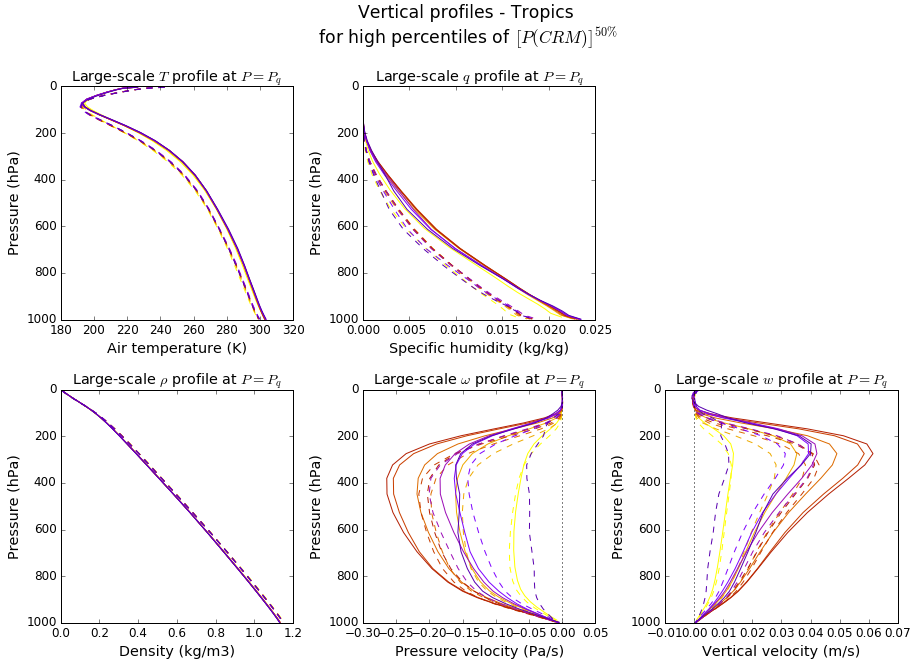

In [46]:
###--- Plot T, Q, , CRM_rho, CRM_omega, CRM_W ---###

## Free parameters

pr_id = "CRM_PREC_I50"
subset = subset_all
# subset = subset_mf

## Fixed parameters
compset = compset_SPCAM
## Set varids to large-scale variables 
varid_profiles = 'PS', 'T', 'Q', 'RELHUM', 'OMEGA', 'W'

## Figure labels and titles
xlabs = (r"Air temperature (K)",r"Specific humidity (kg/kg)",r"Relative humidity (%)",
    r"Density (kg/m3)",r"Pressure velocity (Pa/s)",r"Vertical velocity (m/s)")
tlabs = (r"Large-scale $T$ profile at $P=P_{q}$",
    r"Large-scale $q$ profile at $P=P_{q}$",
    r"Large-scale $\mathcal{H}$ profile at $P=P_{q}$",
    r"Large-scale $\rho$ profile at $P=P_{q}$",
    r"Large-scale $\omega$ profile at $P=P_{q}$",
    r"Large-scale $w$ profile at $P=P_{q}$")

## Start plotting
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
fig.suptitle('Vertical profiles - %s\n for high percentiles of %s'%(subset_labels[subset],pr_labels_short[pr_id]),
             fontsize='xx-large')

for Q in Qs:
        
    Q_id = str(Q)
    
    for experiment in experiments:

        ## Get dataframes
        df_q = df_quantile[compset][experiment][subset]
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]

        if Q > df_q['Q_IL'].max():
#             print "Pass",Q
            continue
        
        ## Get vertical profiles (compute missing ones)
        profiles = getAllProfiles(varid_profiles,pr_id,Q_id,df_m,df_p,computeP)

        ## Now plot
        for (ax,i) in zip(axs.ravel(),range(1,7)):
            if i == 3:
                ax.axis('off')
                continue
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(profiles[i],profiles[0]/100.,c=col[Q_id],linestyle=lt[experiment],
                    label=lab)
            ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
            ax.set_ylabel("Pressure (hPa)")

for (ax,i) in zip(axs.ravel(),range(1,7)):
    ax.invert_yaxis()
    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
#     elif i == 3:
#         ax.legend(handles,labels)
    elif i in (5,6):
        ax.axvline(x=0,c='k',linestyle=':')
    
plt.show()

In [47]:
Q = 99.9
Q_id = str(Q)
crm_t = df_meanProfileAtQ[compset][experiment][subset]['CRM_T_I25']['CRM_PREC_I25'][Q_id][0]
rh = np.array(df_meanProfileAtQ[compset][experiment][subset]['RELHUM']['CRM_PREC_I25'][Q_id])[-1]
h_lcl = (20.+(crm_t-273.15)/5.)*(100-rh)
print h_lcl

344.401287687


#### All profiles in temperature coordinate

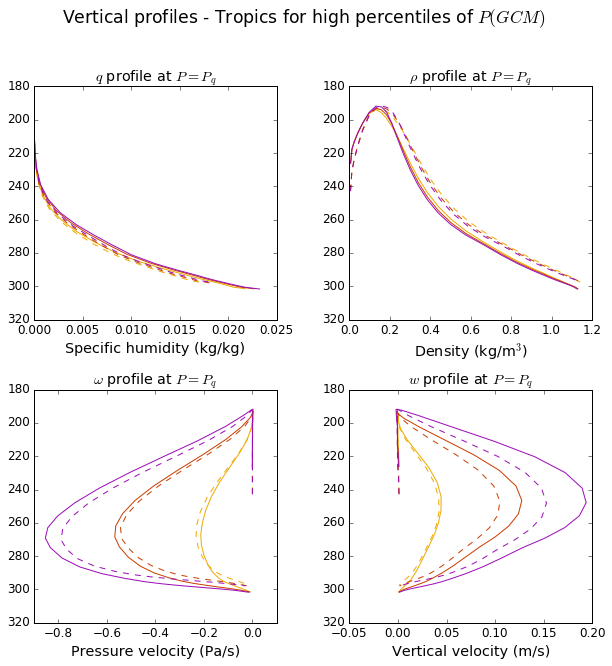

In [49]:
###--- Plot T, Q, , CRM_rho, CRM_omega, CRM_W ---###

## Free parameters

# pr_id = "CRM_PREC_I50"
pr_id = "PRECT"
subset = subset_all

## Fixed parameters
compset = compset_SPCAM
## Set varids to large-scale variables
rho_id = 'RHO'
varid_profiles = ps_id, t_id, q_id, relhum_id, omega_id, w_id = varids_for_profiles[pr_id]
varid_profiles_all = ps_id, t_id, q_id, relhum_id, rho_id, omega_id, w_id
varid_profiles_to_plot = q_id, rho_id, omega_id, w_id

## Figure labels and titles
xlabs = (r"Specific humidity (kg/kg)",r"Density (kg/m$^3$)",r"Pressure velocity (Pa/s)",r"Vertical velocity (m/s)")
tlabs = (r"$q$ profile at $P=P_{q}$",
         r"$\rho$ profile at $P=P_{q}$",
    r"$\omega$ profile at $P=P_{q}$",
    r"$w$ profile at $P=P_{q}$")

## Start plotting
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.suptitle('Vertical profiles - %s for high percentiles of %s'%(subset_labels[subset],pr_labels_short[pr_id]),
             fontsize='xx-large')

for Q in (Qs[1],Qs[3],Qs[5]):
        
    Q_id = str(Q)
    
    for experiment in experiments:

        ## Get dataframes
        df_q = df_quantile[compset][experiment][subset]
        df_m = df_meanAtQ[compset][experiment][subset]
        df_p = df_meanProfileAtQ[compset][experiment][subset]

        if Q > df_q['Q_IL'].max():
            continue
        
        ## Get vertical profiles (compute missing ones)
        profiles = getAllProfiles(varid_profiles,pr_id,Q_id,df_m,df_p,computeP)
        prof_dict = dict(zip(varid_profiles_all,profiles))

        ## Now plot
        for (ax,i,varid) in zip(axs.ravel(),range(1,5),varid_profiles_to_plot):
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(prof_dict[varid],prof_dict[t_id],c=col[Q_id],linestyle=lt[experiment],
                    label=lab)
#             ax.set_ylim(0,1000)
            ax.set_title(tlabs[i-1])
            ax.set_xlabel(xlabs[i-1])
#             ax.set_ylabel("Pressure (hPa)")

for (ax,i) in zip(axs.ravel(),range(1,7)):
    ax.invert_yaxis()
    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
#     elif i == 3:
#         ax.legend(handles,labels)
    elif i in (5,6):
        ax.axvline(x=0,c='k',linestyle=':')
    
plt.show()

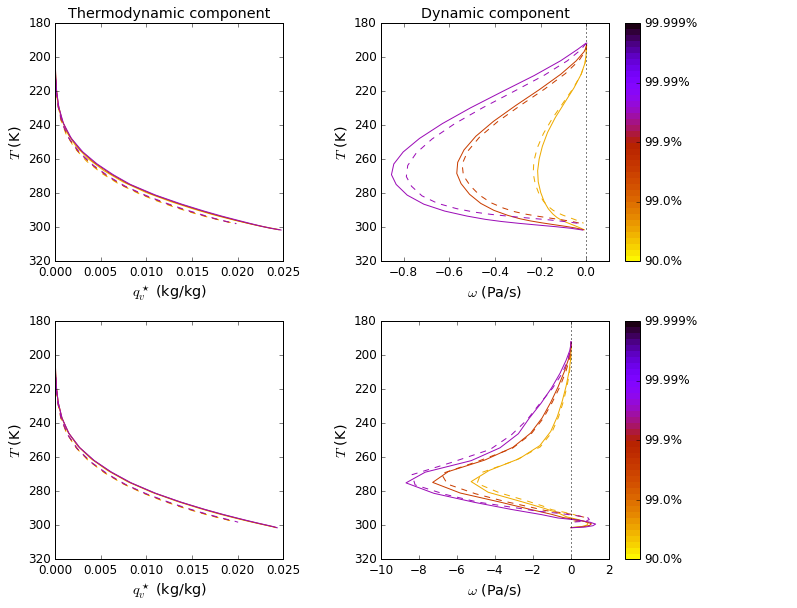

In [51]:
## Free parameters

pr_ids = ("PRECT","CRM_PREC_I50")
subset = subset_all

## Fixed parameters
compset = compset_SPCAM

## Figure labels and titles
xlabs = (r"$q_{v}^\star$ (kg/kg)",r"$\omega$ (Pa/s)")
tlabs = (r"Thermodynamic component",r"Dynamic component")

## Start plotting
fig = plt.figure(figsize=(21,10))
gs = gridspec.GridSpec(2,3,width_ratios=[5,5,0.7,5,5,0.7])
axtop = (plt.subplot(gs[0]),plt.subplot(gs[1]))
axbottom = (plt.subplot(gs[3]),plt.subplot(gs[4]))
axrows = dict(zip(pr_ids,(axtop,axbottom)))
gs.update(hspace=0.25)
# gs.tight_layout(fig,rect=[0.5,0,1,1],h_pad=0.5)
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,5))
# fig.suptitle('Vertical profiles for precipitation scaling - %s'%subset_labels[subset],fontsize='xx-large',x=0.38)



for pr_id in pr_ids:
    
    varids = ps_id, t_id, omega_id, w_id = varids_for_scaling[pr_id]
    axs = axrows[pr_id]
    
    for Q in (Qs[1],Qs[3],Qs[5]):

        Q_id = str(Q)

        for experiment in experiments:

            ## Get dataframes
            df_q = df_quantile[compset][experiment][subset]
            df_m = df_meanAtQ[compset][experiment][subset]
            df_p = df_meanProfileAtQ[compset][experiment][subset]

            if Q > df_q['Q_IL'].max():
                continue

            ## Get vertical profiles (compute missing ones)
            profiles = pres_sc,temp_sc,qvs_sc,omega_sc,rho_sc,wspeed_sc = getProfilesForScaling(varids,pr_id,Q_id,df_m,df_p,computeP)
            profiles_to_plot = temp_sc,qvs_sc,omega_sc
            
            ## Now plot
            for (ax,i) in zip(axs,range(1,3)):
                lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
                ax.plot(profiles_to_plot[i],profiles_to_plot[0],c=col[Q_id],linestyle=lt[experiment],
                        label=lab)
#                 ax.set_ylim(0,1000)
                ax.set_xlabel(xlabs[i-1])
                ax.set_ylabel(r"$T$ (K)")
                if pr_id == pr_ids[0]:
                    ax.set_title(tlabs[i-1])
    #                 ax.legend(bbox_to_anchor=(2, 1),loc='upper right')

    for (ax,i) in zip(axs,range(1,3)):
        ax.invert_yaxis()
        if i == 2:
            ax.axvline(x=0,c='k',linestyle=':')


# ###---- Side colorbar

ax2 = plt.subplot(gs[2])
ax5 = plt.subplot(gs[5])
Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
for ax in (ax2,ax5):
    cs = ax.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext)),cmap=cmap)
    box = ax.get_position()
    ax.set_position([box.x0*1.05, box.y0, box.width, box.height])
    axColor = plt.axes([box.x0*1.05 - box.width * 3.87, box.y0, 0.01, box.height])
    cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
    Q_ind = range(0,len(Q_IL_ext),10)
    cb.set_ticks(Q_ind)
    cb.set_ticklabels(["%s%%"%Q_IL_ext[i] for i in Q_ind])
    ax.axes.clear()
    ax.axis('off')


# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="4xCO2",c='k',linestyle=lt[experiments[1]])
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles[-2:],labels[-2:],loc="upper right",fancybox=True, framealpha=1,handlelength=3,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_scalingContributions_Tcoord_%s_%s_%s.pdf"%(string.join(pr_ids,'_'),compset,subset)),
        bbox_inches='tight')
plt.show()

Contributions to fractional changes in $P_q$ in temperature coordinate

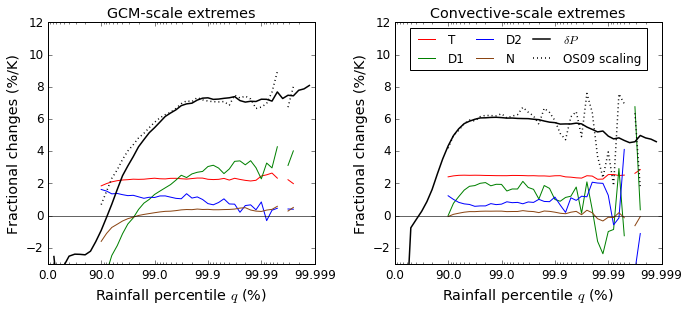

In [66]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"
compset = compset_SPCAM
pr_ids_to_plot = ("PRECT","CRM_PREC_I50")
subset = subset_all
fraction = pr_id[-2:]

contributions_to_plot = ['thermo','dyn_mean','dyn_profile','non_linear']
colors_to_plot = ['r','g','b','saddlebrown']
colors = dict(zip(contributions_to_plot,colors_to_plot))
contrib_labs_to_plot = ['T','D1','D2','N']
contrib_labels_to_plot = dict(zip(contributions_to_plot,contrib_labs_to_plot))

## Plot
fig, ((axs)) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))


## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

pr_type_labs = [r"$\delta P$",r"OS09 scaling"]
pr_type_labels = dict(zip(pr_types,pr_type_labs))


for ax,pr_id in zip(axs,pr_ids_to_plot):
    ax.set_xscale('log')
    ax.set_ylim(-3,12)
    
    ## Plot fractional change per unit temperature
    ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
    ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
    dts = ts2-ts1


    for contribution in contributions_to_plot:

        ## y-axis
        pr_frac_change = fracChange_contributions_Tcoord[compset][subset][pr_id][contribution]
        if filtered:
            pr_frac_change = filter121(pr_frac_change)
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s"%(contrib_labels_to_plot[contribution])
        ax.plot(x,pr_unit_frac_change,c=colors[contribution],
                label=lab,lw=1)
    
    for pr_type in pr_types:

        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        if filtered:
            pr_frac_change = filter121(pr_frac_change)
        pr_unit_frac_change = pr_frac_change/dts
        if pr_type == 'scaling':
            if pr_id == 'CRM_PREC_I50':
                offset = 1.6
            else:
                offset = 0
            pr_unit_frac_change = pr_unit_frac_change + offset*np.ones(pr_unit_frac_change.size)
        ## plot
        lab = r"%s"%(pr_type_labels[pr_type])
        ax.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
                label=lab,lw=1.5)    

    ## Format x axis on inverse-logarithmic scale
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

    ## Labels and titles
    ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
    ax.set_xlabel(r"Rainfall percentile $q$ (%)")
    ax.set_ylabel(r"Fractional changes (%/K)")
    if pr_id == "PRECT":
        ax.set_title('GCM-scale extremes')
    else:
        ax.set_title('Convective-scale extremes')
        ax.legend(bbox_to_anchor=(1.2, 1),loc='upper left',handlelength=3.5)    
        ax.legend(loc='upper center',handlelength=2,ncol=3,columnspacing=0.6,fontsize=12)

plt.savefig(os.path.join(figdir,"fig_paper_fracChangeWithScalingAndContributions_Tcoord_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

# Maps

In [48]:
## Get longitude, latitude and landmask

fh = Dataset(os.path.join(inputdir_fx,'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'))
lon1D = fh.variables['lon'][:]
lat1D = fh.variables['lat'][:]
lon2D, lat2D = np.meshgrid(lon1D,lat1D)

print "Loading lontigude, latitude and landmask"

landmask = fh.variables['landmask']


Loading lontigude, latitude and landmask


## Annual mean precipitation

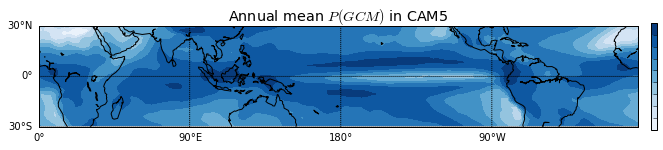

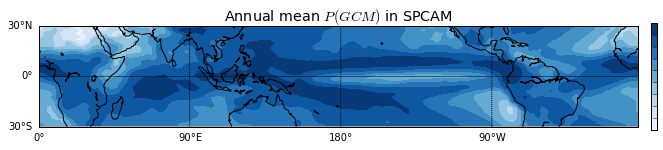

In [137]:
pr_id = "PRECT"
Q = 99.6838
Q_id = str(Q)

# compset = compset_SPCAM
experiment = experiment_PI
# casename = "bf_%s_%s"%(compset,experiment)
subset = subset_all

for compset in compsets[::-1]:
    
    casename = "bf_%s_%s"%(compset,experiment)
    pr = getVar(pr_id,os.path.join(inputdir_maps,casename))*86400*1000
    pr_mean = pr.mean(axis=0)

    ## Plot
    fig = plt.figure(figsize=(12,2))
    map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
    levs = np.logspace(log10(pr_mean[pr_mean > 0].min()),log10(pr_mean.max()),10)
    map.contourf(lon2D,lat2D,pr_mean,levels=levs,cmap=plt.cm.Blues,norm = LogNorm())
#     map.contourf(lon2D,lat2D,pr_mean,cmap=plt.cm.Blues)
    map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
    map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
    map.drawcoastlines()
    plt.title('Annual mean %s in %s'%(pr_labels[pr_id],compset_labels[compset]))
    plt.colorbar(ticks=levs,pad=0.02,fraction=0.085)

    plt.savefig(os.path.join(figdir,"maps_annualMean_%s_%s_%s_%s.pdf"%(pr_id,compset,experiment,subset)),
            bbox_inches='tight')
    plt.show()


Plotting maps of daily rainfall for PRECT above 99.6838
 (For now all rainfall intensities; replace with corresponding percentiles)

18500501  

/Users/bfildier/anaconda/lib/python2.7/site-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


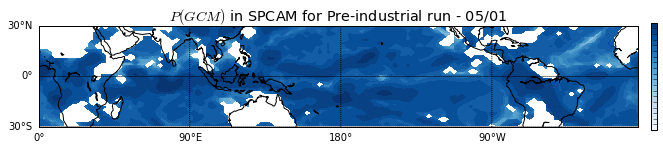

 18500502  

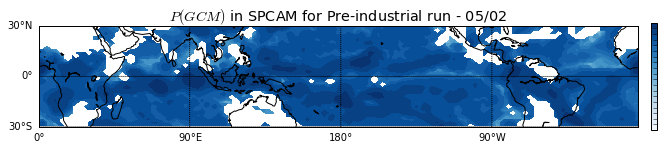

 18500503  

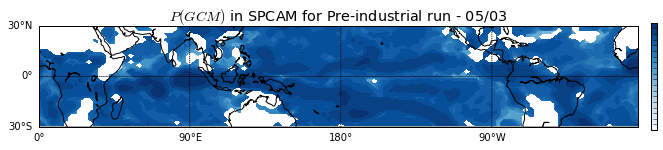

In [66]:
pr_id = "PRECT"
# pr_id = "CRM_PREC_I50"
Q = 99.6838
Q_id = str(Q)

compset = compset_SPCAM
experiment = experiment_PI
casename = "bf_%s_%s"%(compset,experiment)
subset = subset_all

print "Plotting maps of daily rainfall for %s above %s"%(pr_id,Q_id)
print " (For now all rainfall intensities; replace with corresponding percentiles)"
print

# Compute maximum pr value to define the color scale
inputfiles = getInputfiles(pr_id,os.path.join(inputdir_maps,casename))
pr = getVar(pr_id,os.path.dirname(inputfiles[0]),inputfiles)*86400*1000
pr_max = pr.max()

for inputfile in inputfiles[:3]:

    # Get date
    date = string.split(string.split(inputfile,'_')[-1],'-')[0]
    yr = date[:4]
    mth = date[4:6]
    day = date[6:8]
    
    print date, ' ',
    
    casename = "bf_%s_%s"%(compset,experiment)
    pr = getVar(pr_id,os.path.dirname(inputfile),[inputfile])[0]*86400*1000

    ## Plot
    fig = plt.figure(figsize=(12,2))
    map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
    levs = np.logspace(log10(pr[pr > 0].min()),log10(pr_max),20)
    map.contourf(lon2D,lat2D,pr,levels=levs,cmap=plt.cm.Blues,norm = LogNorm())
#     map.contourf(lon2D,lat2D,pr_mean,cmap=plt.cm.Blues)
    map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
    map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
    map.drawcoastlines()
    plt.title('%s in %s for %s run - %s/%s'%(pr_labels[pr_id],compset_labels[compset],exp_labels[experiment],mth,day))
    plt.colorbar(ticks=levs,pad=0.02,fraction=0.085)

#     plt.savefig(os.path.join(figdir,"maps_%s_%s_%s_%s_%s.pdf"%(pr_id,compset,experiment,subset,date)),
#             bbox_inches='tight')
#     plt.close()
    plt.show()

print

In [88]:
pr_q = np.array(df_quantile[compset_SPCAM][experiment_PI][subset_all]['CRM_PREC_I50'])
i_min = np.argmax(Q_IL == 90)
print i_min, Q_IL.size, pr_q.size

9 49 49


Plotting maps of daily rainfall for PRECT above 99.6838
 (For now all rainfall intensities; replace with corresponding percentiles)

18500501   (32, 144)
0
-9.0
0.0
4222
39.0
41


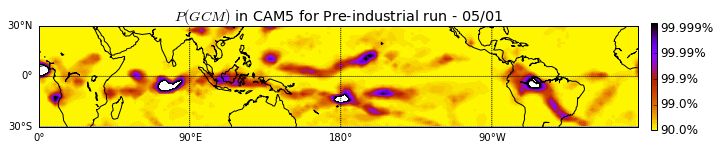

In [145]:
pr_id = "PRECT"
# pr_id = "CRM_PREC_I50"
# Q = 99.6838
# Q_id = str(Q)

# compset = compset_SPCAM
compset = compset_CAM5
experiment = experiment_PI
casename = "bf_%s_%s"%(compset,experiment)
subset = subset_all

print "Plotting maps of daily rainfall for %s above %s"%(pr_id,Q_id)
print " (For now all rainfall intensities; replace with corresponding percentiles)"
print

# Get values of precipitation percentiles
pr_q = np.array(df_quantile[compset][experiment][subset][pr_id])
i_min = np.argmax(Q_IL == 90)

# # Compute maximum pr value to define the color scale
# inputfiles = getInputfiles(pr_id,os.path.join(inputdir_maps,casename))
# pr = getVar(pr_id,os.path.dirname(inputfile),inputfiles)*86400*1000
# pr_max = pr.max()

for inputfile in inputfiles[:1]:

    # Get date
    date = string.split(string.split(inputfile,'_')[-1],'-')[0]
    yr = date[:4]
    mth = date[4:6]
    day = date[6:8]
    
    print date, ' ',
    
    casename = "bf_%s_%s"%(compset,experiment)
    pr = getVar(pr_id,os.path.dirname(inputfile),[inputfile])[0]*86400*1000
    
    # Convert pr values into indices of percentile
    pr_i = np.zeros(pr.shape,dtype=float)
    print pr_i.shape
    for i in range(pr.shape[0]):
        for j in range(pr.shape[1]):
            pr_i[i,j] = np.argmin(np.absolute(pr_q-pr[i,j])) - i_min
    print np.isnan(pr_i).sum()
    print np.nanmin(pr_i)
    pr_i[pr_i < 0] = np.nan
    print np.nanmin(pr_i)
    print np.isnan(pr_i).sum()
    print np.nanmax(pr_i)
    print Q_IL_ext.size
    

    ## Plot
    fig = plt.figure(figsize=(12,2))
    map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
#     levs = np.logspace(log10(pr[pr > 0].min()),log10(pr_max),20)
    levs = range(Q_IL_ext.size)
    map.contourf(lon2D,lat2D,pr,levels=levs,cmap=cmaps["Q_IL"],vmin=0,vmax=Q_IL_ext.size)
#     map.contourf(lon2D,lat2D,pr_mean,cmap=plt.cm.Blues)
    map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
    map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
    map.drawcoastlines()
    plt.title('%s in %s for %s run - %s/%s'%(pr_labels[pr_id],compset_labels[compset],exp_labels[experiment],mth,day))
    cb = plt.colorbar(ticks=levs[::10],pad=0.02,fraction=0.085)
    cb.ax.set_yticklabels(["%s%%"%str(Q) for Q in Q_IL_ext[::10]])
    
#     plt.savefig(os.path.join(figdir,"maps_%s_quantiles_%s_%s_%s_%s.pdf"%(pr_id,compset,experiment,subset,date)),
#             bbox_inches='tight')
#     plt.close()
    plt.show()

print

## Precipitation frequency above quantiles for various precipitation IDs

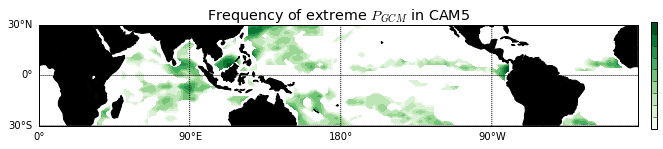

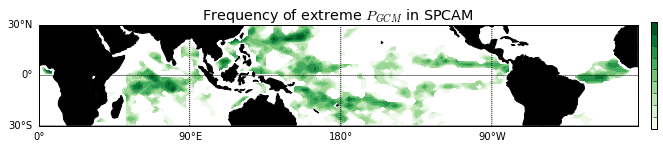

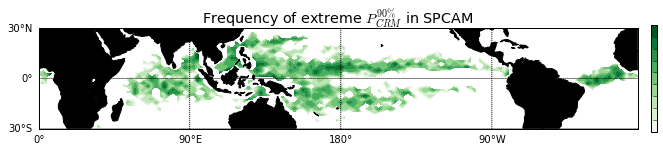

In [15]:

Q = 99.6838
# Q = 99.7488
# Q = 99.8005
# Q = 99.8415
# Q = 99.8741
# Q = 99.9
Q_id = str(Q)

# compset = compset_SPCAM
experiment = experiment_4xCO2
# casename = "bf_%s_%s"%(compset,experiment)
subset = subset_ocean
# subset = subset_all

for compset in compsets[::-1]:
    
    casename = "bf_%s_%s"%(compset,experiment)

    for pr_id in pr_ids_for_compset[compset]:
        
        if np.argmax(np.array(pr_ids) == pr_id) > 1:
            continue

        pr_q = df_meanAtQ[compset][experiment][subset][pr_id][pr_id][Q_id][0]
        pr = getVar(pr_id,os.path.join(inputdir_maps,casename))

        ## Find points raining more than threshold
        isAbove = np.array(pr > pr_q,dtype=bool)
        subset_pts = getSubset(subset,landmask,ndays=365)
        isAbove = np.logical_and(isAbove,subset_pts)
        isAbove = np.array(isAbove,dtype=float)

        ## Compute frequency map
        freqMap = isAbove.sum(axis=0)/isAbove.sum()

        fmin = freqMap[freqMap > 0].min()

        ## Plot
        fig = plt.figure(figsize=(12,2))
        map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
        levs = np.logspace(log10(freqMap[freqMap > 0].min()),log10(freqMap.max()),10)
        map.contourf(lon2D,lat2D,freqMap,levels=levs,cmap=plt.cm.Greens,norm = LogNorm())
#         map.contourf(lon2D,lat2D,freqMap,cmap=plt.cm.Greens)
        map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
        map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
        map.drawcoastlines()
        if subset == 'ocean':
            map.fillcontinents(color='k')
        
        plt.title('Frequency of extreme %s in %s'%(pr_labels_veryshort[pr_id],compset_labels[compset]))
        plt.colorbar(ticks=levs,pad=0.02,fraction=0.085)

        plt.savefig(os.path.join(figdir,"fig_frequencyMap_%s_%s_%s_%s_%s.pdf"%(pr_id,Q_id,compset,experiment,subset)),
            bbox_inches='tight')
        plt.show()